# Dissertation - Predicting the player's price in the IPL auction

# INTRODUCTION

This notebook serves as a Data Preprocessing and Exploratory Data Analysis report on the dataset. It is part of a dissertation for the reserach module of the MSc in Business Analytics course at Aston University, Birmingham. We will compile a dataset using the IPL auction, Cricket and Purse data files available from the ESPN and Cricbuzz websites. The page includes a description of the data and links to download the actual data files.

The final dataset created can be used as input, which involves modeling, evaluation, and deployment of machine learning predictive methods to address a business problem for team owners.

I followed the Machine Learning Workflow and ANN methodologies for a comprehensive end-to-end project. The structure of the report is outlined below.

# Table of Contents

1. Business Objective
2. Data Understanding, Importing Libraries and Preparing Environment
3. Data Preparation.
4. Feature Dataset Construction
5. Data Splitting(Train-Test split)
6. Descriptive Statistics and Exploratory Data Analysis
7. Data Transformation and Preprocessing
8. Conclusion and Data Exporting

# 1. Business Objective

The business objective of the cricket prices project is to develop a predictive model that can accurately estimate the past prices of cricket players based on various performance metrics and attributes. This model aims to assist team owners and management in making informed decisions during player auctions by providing insights into the potential value of players.

Key Objectives:

(i) Predict Player Prices: Use historical data and player performance metrics to predict the prices of players in future auctions.

(ii) Optimize Team Composition: Help team owners and management build balanced and competitive teams by identifying undervalued players.

(iii)Data-Driven Decisions: Enable data-driven decision-making in player selection and bidding strategies.

(iv) Market Analysis: Analyze market trends and player performance to understand the factors influencing player prices.

## Expected Results

Improved Auction Strategies: Team owners can develop more effective bidding strategies based on predicted player values.

Cost Efficiency: Identify cost-effective players who can deliver high performance, optimizing the team's budget.

Competitive Advantage: Gain a competitive edge by leveraging predictive analytics to make better-informed decisions.

# Business-Specific Problem: 
Team owners and management need to make data-driven decisions during player auctions to build competitive teams while optimizing their budgets. However, predicting player prices based on performance metrics and attributes can be challenging due to the complexity and variability of the data.

Aim: Develop a predictive model that can accurately estimate the past prices of cricket players using various performance metrics and attributes. This model will help team owners and management:

Identify undervalued players who can deliver high performance.

Develop effective bidding strategies during auctions.

Optimize team composition by balancing cost and performance.

Gain insights into market trends and factors influencing player prices.

By achieving these objectives, the project aims to enhance the overall efficiency and effectiveness of the player auction process, ultimately leading to better team performance and success in the league.


Our target variable is the present price of the player in lakhs, which means we are addressing a regression problem in machine learning. In this scenario, the goal is to predict new instances' numerical and categorical class labels based on historical data.

# 2. Data Understanding, Importing Libraries and Preparing Environment

Original Data Sources

CricketArchive: A comprehensive database providing access to scorecards, player statistics, and match details from various cricket formats.

Cricsheet: Offers freely available structured data, including ball-by-ball data for international and T20 league matches.

ESPNcricinfo: Provides extensive cricket statistics, player profiles, and match data through its Statsguru tool.

Cricbuzz: A popular platform for live scores, match commentary, player statistics, and cricket news.

Overview
The data for the cricket prices project is sourced from various reputable platforms such as ESPNcricinfo, Cricbuzz, CricketArchive, and Cricsheet. These sources provide comprehensive cricket statistics, player profiles, match data, and auction prices. The data collection process involves several stages to ensure the data is accurate, consistent, and ready for analysis.

# Player's price Data

It is Published annually by ESPN cricinfo, Cricbuzz, and other above-mentioned channels. The old data consists of 3 linked CSV files:

• auction

• cricket

• purse

We are utilizing data from three datasets for the year 2024: auction, cricket, and purse. These datasets are linked using the name, and team name.

By merging the player performance, auction, and match statistics datasets, we can gain a more comprehensive understanding of each player's value. This integration enhances the accuracy and utility of our predictive models by leveraging a broader range of features. It allows us to identify patterns and correlations that might not be apparent when analyzing a single dataset.

The Player country, which combines the player's name and his previous team, serves as a unique identifier. This enables us to join the player performance, auction, and match statistics files, creating a comprehensive dataset with all relevant variables that can influence player prices.

# Importing Libraries and Preparing Environment

In [1]:
#Base Libraries
import re
import time
import datetime
import warnings
import numpy as np
import pandas as pd
#Library for Plotting
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
#Library for Data Preprocessing and Cleaning
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# Disable auto-scrolling for outputs

In [2]:
Start_time = time.time()

# 3. Data Preparation
# 3.1 Loading Datasets - 3 datasets of the year 2024, that are auction, cricket, and purse
We are using data from the 3 data files of the year 2024, which are mentioned as auction, cricket, and purse, by combining them using name, which is the variable that links them together to form an output.

Combining data from the auction, cricket and purse datasets would provide a more comprehensive view of each player, potentially improving the accuracy and usefulness of your predictive models.

In [3]:
# Step 3.1: Loading the Data Files

# Load the Data Files
auction_data = pd.read_csv('auction.csv', header=0)  # Skip bad lines
cricket_data = pd.read_csv('cricket.csv', encoding='utf-8-sig')  # Skip bad lines
purse_data = pd.read_excel('purse.xlsx')

# 3.2 Datasets View - 3 datasets of the year 2024, that are auction, cricket, and purse
We are providing the basic view of the three data files namely auction, cricket, and purse below, along with their Shape and information about the names and types of variables they hold for reference.

In [4]:
auction_data.head()

Set No.  Player ID 2025 Set            Name       Country         DOB  \
0      1.0        1.0       M1     Jos Buttler       England  08/09/1990   
1      1.0        2.0       M1    Shreyas Iyer         India  06/12/1994   
2      1.0        3.0       M1    Rishabh Pant         India  04/10/1997   
3      1.0        4.0       M1   Kagiso Rabada  South Africa  25/05/1995   
4      1.0        5.0       M1  Arshdeep Singh         India  05/02/1999   

    Age    Specialism Batting Style         Bowling Style  Test caps  \
0  34.0  WICKETKEEPER           RHB    RIGHT ARM Off Spin       57.0   
1  30.0        BATTER           RHB    RIGHT ARM Off Spin       14.0   
2  27.0        BATTER           LHB    RIGHT ARM Off Spin       37.0   
3  29.0        BOWLER           RHB        RIGHT ARM Fast       66.0   
4  26.0        BOWLER           LHB  LEFT ARM Fast Medium        0.0   

   ODI caps  T20 caps    IPL Previous IPLTeam(s) Team 2024  \
0     181.0     124.0  107.0               MI,RR        RR   
1      62.0      51.0  116.0              DC,KKR       KKR   
2      31.0      76.0  111.0                  DC        DC   
3     101.0      65.0   80.0             DC,PBKS      PBKS   
4       8.0      56.0   65.0                PBKS      PBKS   

   Past Price (Crores)   C/U/A  Price Rs (Lakhs)  
0                 11.0  Capped             200.0  
1                 15.0  Capped             200.0  
2                 13.0  Capped             200.0  
3                 11.0  Capped             200.0  
4                 14.0  Capped             200.0

In [5]:
auction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Set No.              574 non-null    float64
 1   Player ID            574 non-null    float64
 2   2025 Set             574 non-null    object 
 3   Name                 575 non-null    object 
 4   Country              574 non-null    object 
 5   DOB                  574 non-null    object 
 6   Age                  574 non-null    float64
 7   Specialism           574 non-null    object 
 8   Batting Style        574 non-null    object 
 9   Bowling Style        573 non-null    object 
 10  Test caps            574 non-null    float64
 11  ODI caps             573 non-null    float64
 12  T20 caps             574 non-null    float64
 13  IPL                  573 non-null    float64
 14  Previous IPLTeam(s)  573 non-null    object 
 15  Team 2024            574 non-null    obj

In [6]:
auction_data.shape

(575, 19)

In [7]:
cricket_data.head()

Player ID                  Name      Country Team 2024 Specialism  \
0          1          Devon Conway  New Zealand       CSK     BATTER   
1          2        Ajinkya Rahane        India       CSK     BATTER   
2          3         Shaik Rasheed        India       CSK     BATTER   
3          4          Sameer Rizvi        India       CSK     BATTER   
4          5  Avanish Rao Aravelly        India       CSK     BATTER   

   Matches_Batted  Not_Outs  Runs_Scored  Highest_Score  Batting_Average  ...  \
0              23         3          924             92        46.845000  ...   
1             174        17         4439            105        26.356875  ...   
2               0         0            0              0         0.000000  ...   
3               2         0            0              0         0.000000  ...   
4               0         0            0              0         0.000000  ...   

   Matches_Bowled  Balls_Bowled  Runs_Conceded  Wickets_Taken  \
0              23             0              0              0   
1             170             6              5              1   
2               0             0              0              0   
3               2             0              0              0   
4               0             0              0              0   

   Bowling_Average  Economy_Rate  Bowling_Strike_Rate  Four_Wicket_Hauls  \
0           0.0000        0.0000                0.000                  0   
1           0.3125        0.3125                0.375                  0   
2           0.0000        0.0000                0.000                  0   
3           0.0000        0.0000                0.000                  0   
4           0.0000        0.0000                0.000                  0   

   Five_Wicket_Hauls  Captaincy %  
0                  0          0.0  
1                  0         36.0  
2                  0          0.0  
3                  0          0.0  
4                  0          0.0  

[5 rows x 28 columns]

In [8]:
cricket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player ID            202 non-null    int64  
 1   Name                 202 non-null    object 
 2   Country              202 non-null    object 
 3   Team 2024            202 non-null    object 
 4   Specialism           202 non-null    object 
 5   Matches_Batted       202 non-null    int64  
 6   Not_Outs             202 non-null    int64  
 7   Runs_Scored          202 non-null    int64  
 8   Highest_Score        202 non-null    int64  
 9   Batting_Average      202 non-null    float64
 10  Balls_Faced          202 non-null    int64  
 11  Batting_Strike_Rate  202 non-null    float64
 12  Centuries            202 non-null    int64  
 13  Half_Centuries       202 non-null    int64  
 14  Fours                202 non-null    int64  
 15  Sixes                202 non-null    int

In [9]:
cricket_data.shape

(202, 28)

In [10]:
purse_data.head()

S.No. Team  Remaining  Retained  RTM  Foreign (/8)  Indian (/17)
0      1   MI       45.0      75.0    1             0             5
1      2  CSK       55.0      65.0    1             1             4
2      3  RCB       83.0      37.0    3             0             3
3      4  SRH       45.0      75.0    1             3             2
4      5   GT       69.0      51.0    1             1             4

In [11]:
purse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   S.No.         10 non-null     int64  
 1   Team          10 non-null     object 
 2   Remaining     10 non-null     float64
 3   Retained      10 non-null     float64
 4   RTM           10 non-null     int64  
 5   Foreign (/8)  10 non-null     int64  
 6   Indian (/17)  10 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 692.0+ bytes


In [12]:
purse_data.shape

(10, 7)

# 3.3 Datasets Variable Selection - From auction, cricket, and purse
This selection is based on specific logic. Since many of the variables are not related to predicting player's price, they will be excluded from our analysis.

The names of the selected variables from all three data files can be seen in the next block of code. The included variables will be analyzed for their importance using statistical methods. Additional variables may be dropped later based on their predictive power, which will be assessed using statistical methods. More variables can also be added through feature engineering as needed.

In [13]:
# Print column names to verify 
print("Column names:", cricket_data.columns)

Column names: Index(['Player ID', 'Name', 'Country', 'Team 2024', 'Specialism',
       'Matches_Batted', 'Not_Outs', 'Runs_Scored', 'Highest_Score',
       'Batting_Average', 'Balls_Faced', 'Batting_Strike_Rate', 'Centuries',
       'Half_Centuries', 'Fours', 'Sixes', 'Catches_Taken', 'Stumpings',
       'Matches_Bowled', 'Balls_Bowled', 'Runs_Conceded', 'Wickets_Taken',
       'Bowling_Average', 'Economy_Rate', 'Bowling_Strike_Rate',
       'Four_Wicket_Hauls', 'Five_Wicket_Hauls', 'Captaincy %'],
      dtype='object')


In [14]:
# Print column names to verify 
print("Column names:", auction_data.columns)

Column names: Index(['Set No.', 'Player ID', '2025 Set', 'Name', 'Country', 'DOB', 'Age',
       'Specialism', 'Batting Style', 'Bowling Style', 'Test caps', 'ODI caps',
       'T20 caps', 'IPL', 'Previous IPLTeam(s)', 'Team 2024',
       'Past Price (Crores)', 'C/U/A', 'Price Rs (Lakhs)'],
      dtype='object')


In [15]:
# Step 6: Filter Relevant Variables
# List of relevant variables for each dataset
auction = [
    'Player ID', 'Name', 'Country', 'Specialism', 'Age', 'Batting Style', 'Bowling Style', 'Test caps', 'ODI caps',
    'T20 caps', 'IPL', 'Previous IPLTeam(s)', 'Past Price (Crores)',
    'Price Rs (Lakhs)', 'Team 2024', 'C/U/A'
]

cricket = [
    'Player ID', 'Name', 'Matches_Batted', 'Runs_Scored', 'Batting_Average',
    'Batting_Strike_Rate', 'Centuries', 'Half_Centuries','Balls_Bowled','Wickets_Taken','Bowling_Average','Economy_Rate',
    'Bowling_Strike_Rate','Four_Wicket_Hauls','Five_Wicket_Hauls','Captaincy %','Catches_Taken','Stumpings'
]

purse = [
    'Remaining', 'Retained', 'RTM',
    'Foreign (/8)', 'Indian (/17)'
]

# Filter the datasets to keep only the relevant variables
auction_data = auction_data[auction]
cricket_data = cricket_data[cricket]
purse_data = purse_data[purse]

In [16]:
# Merge datasets using the 'name' column 
merged_df = pd.merge(auction_data, cricket_data, on='Name')

In [17]:
# Check for missing values in the dataset
missing_values = merged_df.isnull().sum()

# Print the number of missing values for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Player ID_x            0
Name                   0
Country                0
Specialism             0
Age                    0
Batting Style          0
Bowling Style          0
Test caps              0
ODI caps               0
T20 caps               0
IPL                    1
Previous IPLTeam(s)    1
Past Price (Crores)    0
Price Rs (Lakhs)       0
Team 2024              0
C/U/A                  0
Player ID_y            0
Matches_Batted         0
Runs_Scored            0
Batting_Average        0
Batting_Strike_Rate    0
Centuries              0
Half_Centuries         0
Balls_Bowled           0
Wickets_Taken          0
Bowling_Average        0
Economy_Rate           0
Bowling_Strike_Rate    0
Four_Wicket_Hauls      0
Five_Wicket_Hauls      0
Captaincy %            0
Catches_Taken          0
Stumpings              0
dtype: int64


In [18]:
# Remove rows with missing values in 'IPL' and 'Previous IPLTeam(s)'
new = merged_df.dropna(subset=['IPL', 'Previous IPLTeam(s)'])
print(new)

     Player ID_x                     Name       Country    Specialism   Age  \
0            1.0              Jos Buttler       England  WICKETKEEPER  34.0   
1            2.0             Shreyas Iyer         India        BATTER  30.0   
2            3.0             Rishabh Pant         India        BATTER  27.0   
3            4.0            Kagiso Rabada  South Africa        BOWLER  29.0   
4            5.0           Arshdeep Singh         India        BOWLER  26.0   
..           ...                      ...           ...           ...   ...   
172        341.0              Akash Singh         India  WICKETKEEPER  29.0   
173        367.0       Dilshan Madushanka     Sri Lanka        BOWLER  24.0   
174        371.0          Chetan Sakariya         India        BOWLER  27.0   
176        456.0  Vishwanath Pratap Singh         India        BATTER  26.0   
177        460.0             Abid Mushtaq         India   ALL-ROUNDER  28.0   

    Batting Style           Bowling Style  Test cap

In [19]:
# Verify the changes
print("\nRemaining data columns:")
print(new.shape)


Remaining data columns:
(177, 33)


Now we remove duplicate Values based on name, as it can skew our analysis significantly.

In [20]:
# Check for duplicate rows based on 'name'
duplicate_count = new.duplicated(subset='Name').sum()
print(f'Number of duplicate rows based on Name: {duplicate_count}')

# Get the number of Name
unique_name = new['Name'].nunique()
print(f'Number of unique names: {unique_name}')

# Check the shape of the dataset
print(f'Shape of the dataset: {new.shape}')

# Remove duplicate rows based on 'Name', keeping the first occurrence
new = new.drop_duplicates(subset='Name', keep='first')

# Verify the changes
duplicate_count_after = new.duplicated(subset='Name').sum()
print(f'Number of duplicate rows after removal: {duplicate_count_after}')
print(f'Shape of data after removing duplicate rows: {new.shape}')

Number of duplicate rows based on Name: 1
Number of unique names: 176
Shape of the dataset: (177, 33)
Number of duplicate rows after removal: 0
Shape of data after removing duplicate rows: (176, 33)


The Final data file has thus 176 records and a total of 35 variables to hold. This is the data prepared for Analysis and would be further cleaned and pre-processed as needed.

Checking Proportionality of Target variables across its categories.

In [21]:
# Check distribution in original data
print("Original data distribution:")
print(new['Price Rs (Lakhs)'].value_counts(normalize=True))

Original data distribution:
Price Rs (Lakhs)
30.0     0.380682
200.0    0.329545
75.0     0.113636
150.0    0.062500
100.0    0.045455
125.0    0.034091
50.0     0.028409
40.0     0.005682
Name: proportion, dtype: float64


# 6. Descriptive Statistics and Exploratory Data Analysis
In this section, we are exploring the data to understand and highlight key areas which requires attention and preprocessing before we start building predictive models. This would help us to decide what transformations have to be done to make data more suitable for predictive analytics.

We do not want to do any 'data snooping' as this would cause bias in model development. Therefore, all analysis in this section is done on the train_data.

Also we would be creating and using functions to achieve our tasks by calling a block of code to reuse it again.

# 6.1 Univariate Analysis
In this section, we investigate the variables of the dataframes one at a time in univariate analysis first. The analysis is separated into numeric variables and categorical variable (Includes Target Variable Price Rs (Lakhs)).

A selection of these variables will be used in the predictive model so the descriptive statistics are an important way to improve our understanding of them.

# (a) Numerical variables

In [22]:
new.describe()

Player ID_x         Age   Test caps    ODI caps    T20 caps  \
count   176.000000  176.000000  176.000000  176.000000  176.000000   
mean    124.937500   28.585227   10.426136   25.403409   22.863636   
std      94.665194    4.591123   24.412063   42.832188   32.325552   
min       1.000000   20.000000    0.000000    0.000000    0.000000   
25%      51.750000   25.000000    0.000000    0.000000    0.000000   
50%     104.500000   28.000000    0.000000    1.000000    5.000000   
75%     178.250000   32.000000    4.000000   31.000000   39.750000   
max     460.000000   40.000000  112.000000  181.000000  129.000000   

              IPL  Past Price (Crores)  Price Rs (Lakhs)  Player ID_y  \
count  176.000000           176.000000        176.000000   176.000000   
mean    37.517045             5.318182        105.681818   101.284091   
std     46.947262             5.155957         74.160759    58.677219   
min      0.000000             0.000000         30.000000     1.000000   
25%      5.000000             0.000000         30.000000    51.750000   
50%     18.000000             3.500000         75.000000   102.500000   
75%     51.250000            10.000000        200.000000   150.250000   
max    212.000000            16.000000        200.000000   202.000000   

       Matches_Batted  ...  Balls_Bowled  Wickets_Taken  Bowling_Average  \
count      176.000000  ...    176.000000     176.000000       176.000000   
mean        32.085227  ...    391.846591      18.812500        16.147303   
std         43.652113  ...    738.464356      36.200774        17.001977   
min          0.000000  ...      0.000000       0.000000         0.000000   
25%          1.000000  ...      0.000000       0.000000         0.000000   
50%         12.000000  ...     45.000000       2.000000        14.617500   
75%         42.750000  ...    423.000000      20.250000        30.043750   
max        198.000000  ...   4218.000000     188.000000        67.498000   

       Economy_Rate  Bowling_Strike_Rate  Four_Wicket_Hauls  \
count    176.000000           176.000000         176.000000   
mean       5.257866            10.933155           0.340909   
std        4.405389            11.369863           0.853716   
min        0.000000             0.000000           0.000000   
25%        0.000000             0.000000           0.000000   
50%        7.175556             9.520000           0.000000   
75%        8.853750            21.115833           0.000000   
max       13.410000            47.242000           6.000000   

       Five_Wicket_Hauls  Captaincy %  Catches_Taken   Stumpings  
count         176.000000   176.000000     176.000000  176.000000  
mean            0.079545     2.617841      10.784091    0.232955  
std             0.310634    10.679130      16.476441    1.584657  
min             0.000000     0.000000       0.000000    0.000000  
25%             0.000000     0.000000       0.000000    0.000000  
50%             0.000000     0.000000       3.000000    0.000000  
75%             0.000000     0.000000      16.000000    0.000000  
max             2.000000    60.000000      82.000000   19.000000  

[8 rows x 25 columns]

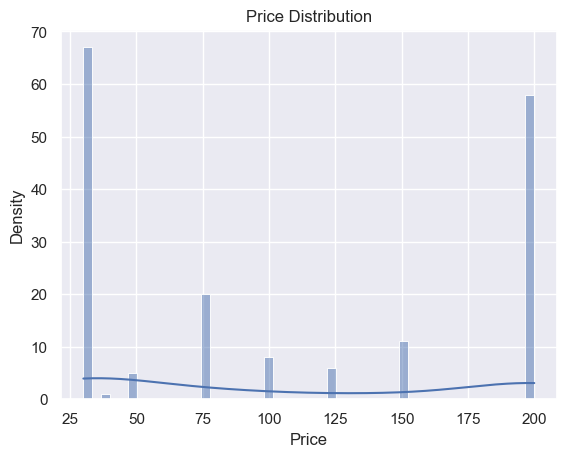

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'new' is your DataFrame
sns.histplot(new['Price Rs (Lakhs)'], bins=50, kde=True)

# Add titles and labels
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')

# Show the plot
plt.show()

In [24]:
new['Price Rs (Lakhs)'].describe()

count    176.000000
mean     105.681818
std       74.160759
min       30.000000
25%       30.000000
50%       75.000000
75%      200.000000
max      200.000000
Name: Price Rs (Lakhs), dtype: float64

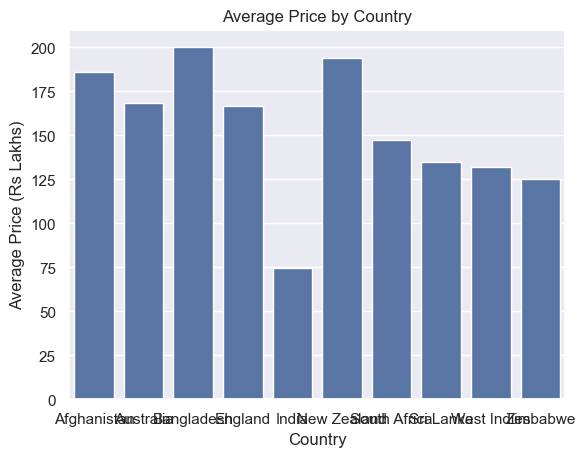

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'new' is your DataFrame
# Group by country and calculate the mean price
country_avg_price = new.groupby('Country')['Price Rs (Lakhs)'].mean().reset_index()

# Plot the average price by country
sns.barplot(x='Country', y='Price Rs (Lakhs)', data=country_avg_price)

# Add titles and labels
plt.title('Average Price by Country')
plt.xlabel('Country')
plt.ylabel('Average Price (Rs Lakhs)')

# Show the plot
plt.show()  

 'India': 0,  'Australia': 1,  'England': 2,  'New Zealand': 3, 'South Africa': 4,  'Sri Lanka': 5, 'West Indies': 6, 'Afghanistan': 7, 'Bangladesh': 8, 'Zimbabwe': 9 

In [26]:
print("Column names:", new.columns)

Column names: Index(['Player ID_x', 'Name', 'Country', 'Specialism', 'Age', 'Batting Style',
       'Bowling Style', 'Test caps', 'ODI caps', 'T20 caps', 'IPL',
       'Previous IPLTeam(s)', 'Past Price (Crores)', 'Price Rs (Lakhs)',
       'Team 2024', 'C/U/A', 'Player ID_y', 'Matches_Batted', 'Runs_Scored',
       'Batting_Average', 'Batting_Strike_Rate', 'Centuries', 'Half_Centuries',
       'Balls_Bowled', 'Wickets_Taken', 'Bowling_Average', 'Economy_Rate',
       'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls',
       'Captaincy %', 'Catches_Taken', 'Stumpings'],
      dtype='object')


In [27]:
#For the variable - Age
new['Age'].describe()

count    176.000000
mean      28.585227
std        4.591123
min       20.000000
25%       25.000000
50%       28.000000
75%       32.000000
max       40.000000
Name: Age, dtype: float64

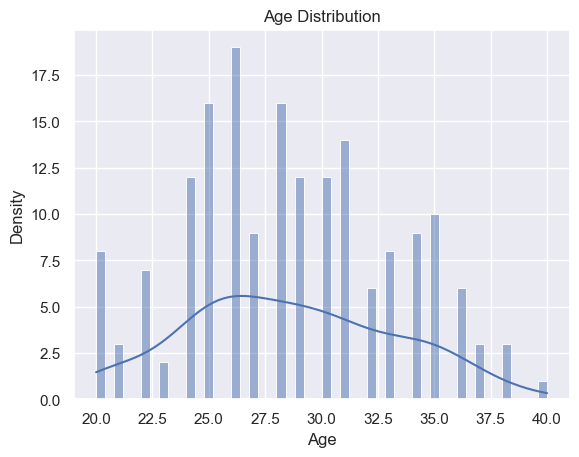

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'new' is your DataFrame and it contains the 'Age' column
sns.histplot(new['Age'], bins=50, kde=True)

# Add titles and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')

# Show the plot
plt.show()

In [29]:
#For the variable - Test caps
new['Test caps'].describe()

count    176.000000
mean      10.426136
std       24.412063
min        0.000000
25%        0.000000
50%        0.000000
75%        4.000000
max      112.000000
Name: Test caps, dtype: float64

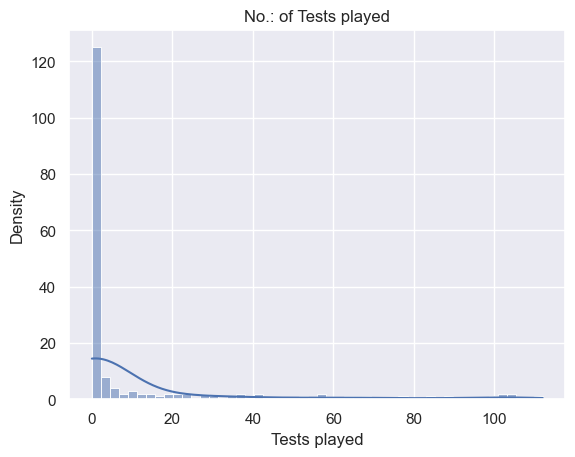

In [30]:
sns.histplot(new['Test caps'], bins=50, kde=True)
# Add titles and labels
plt.title('No.: of Tests played')
plt.xlabel('Tests played')
plt.ylabel('Density')
plt.show()

In [31]:
#For the variable - ODI caps
new['ODI caps'].describe()

count    176.000000
mean      25.403409
std       42.832188
min        0.000000
25%        0.000000
50%        1.000000
75%       31.000000
max      181.000000
Name: ODI caps, dtype: float64

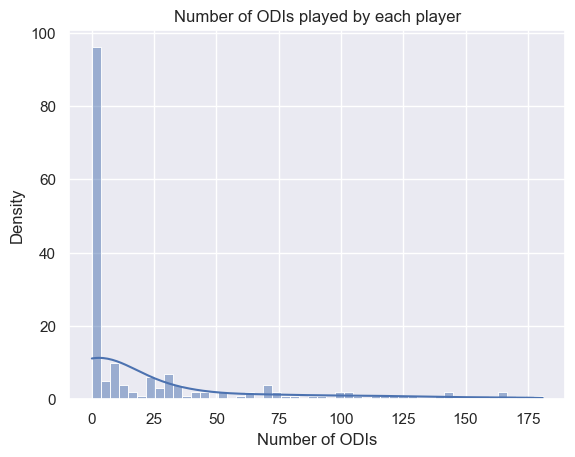

In [32]:
sns.histplot(new['ODI caps'], bins=50, kde=True)
# Add titles and labels
plt.title('Number of ODIs played by each player')
plt.xlabel('Number of ODIs')
plt.ylabel('Density')
plt.show()

In [33]:
#For the variable - T20 caps
new['T20 caps'].describe()

count    176.000000
mean      22.863636
std       32.325552
min        0.000000
25%        0.000000
50%        5.000000
75%       39.750000
max      129.000000
Name: T20 caps, dtype: float64

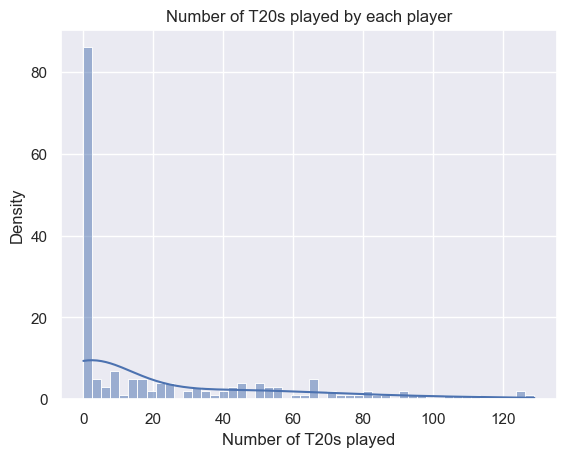

In [34]:
sns.histplot(new['T20 caps'], bins=50, kde=True)
# Add titles and labels
plt.title('Number of T20s played by each player')
plt.xlabel('Number of T20s played')
plt.ylabel('Density')
plt.show()

In [35]:
#For the variable - IPL
new['IPL'].describe()

count    176.000000
mean      37.517045
std       46.947262
min        0.000000
25%        5.000000
50%       18.000000
75%       51.250000
max      212.000000
Name: IPL, dtype: float64

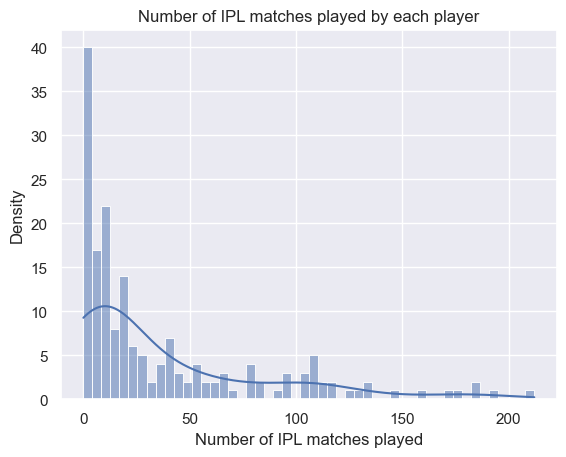

In [36]:
sns.histplot(new['IPL'], bins=50, kde=True)
# Add titles and labels
plt.title('Number of IPL matches played by each player')
plt.xlabel('Number of IPL matches played')
plt.ylabel('Density')
plt.show()

In [37]:
#For the variable - Past Price (Crores)
new['Past Price (Crores)'].describe()

count    176.000000
mean       5.318182
std        5.155957
min        0.000000
25%        0.000000
50%        3.500000
75%       10.000000
max       16.000000
Name: Past Price (Crores), dtype: float64

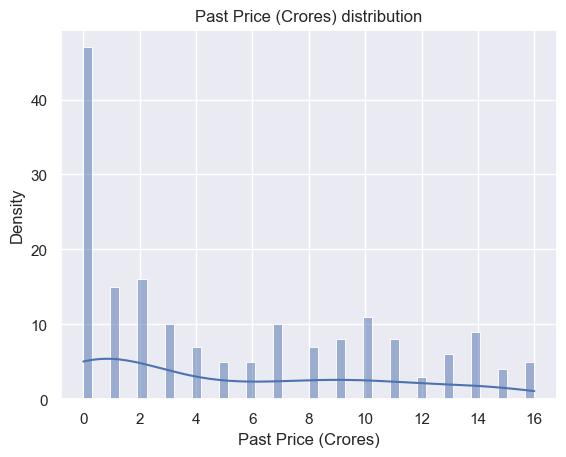

In [38]:
sns.histplot(new['Past Price (Crores)'], bins=50, kde=True)
# Add titles and labels
plt.title('Past Price (Crores) distribution')
plt.xlabel('Past Price (Crores)')
plt.ylabel('Density')
plt.show()

In [39]:
#For the variable - Price Rs (Lakhs)
new['Price Rs (Lakhs)'].describe()

count    176.000000
mean     105.681818
std       74.160759
min       30.000000
25%       30.000000
50%       75.000000
75%      200.000000
max      200.000000
Name: Price Rs (Lakhs), dtype: float64

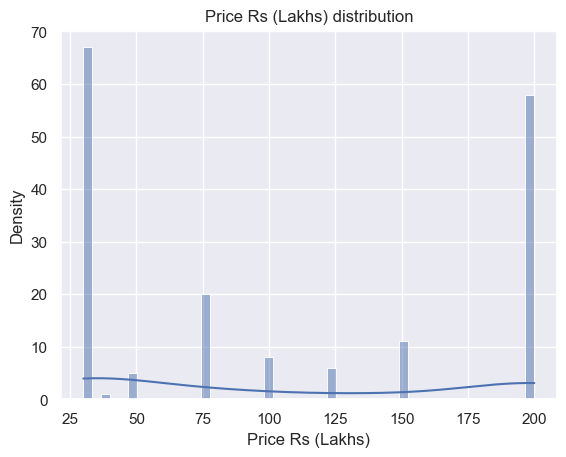

In [40]:
sns.histplot(new['Price Rs (Lakhs)'], bins=50, kde=True)
# Add titles and labels
plt.title('Price Rs (Lakhs) distribution')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Density')
plt.show()

In [41]:
#For the variable - Matches_Batted
new['Matches_Batted'].describe()

count    176.000000
mean      32.085227
std       43.652113
min        0.000000
25%        1.000000
50%       12.000000
75%       42.750000
max      198.000000
Name: Matches_Batted, dtype: float64

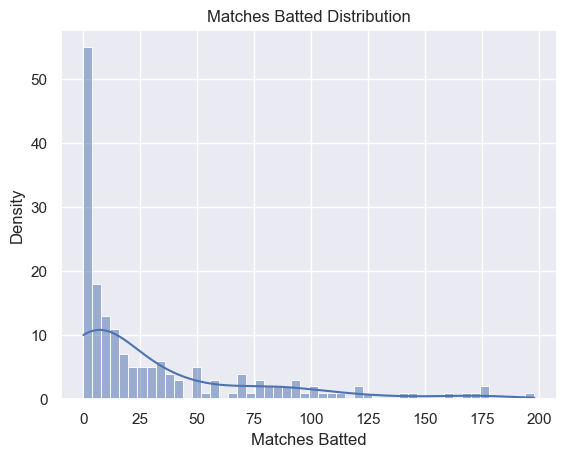

In [42]:
sns.histplot(new['Matches_Batted'], bins=50, kde=True)
# Add titles and labels
plt.title('Matches Batted Distribution')
plt.xlabel('Matches Batted')
plt.ylabel('Density')
plt.show()

In [43]:
#For the variable - Runs_Scored
new['Runs_Scored'].describe()

count     176.000000
mean      400.045455
std       926.748280
min         0.000000
25%         0.000000
50%        33.000000
75%       249.500000
max      6426.000000
Name: Runs_Scored, dtype: float64

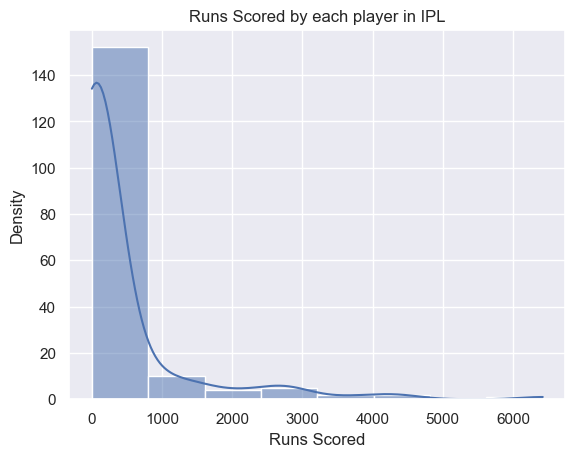

In [44]:
sns.histplot(new['Runs_Scored'], bins=8, kde=True)
# Add titles and labels
plt.title('Runs Scored by each player in IPL')
plt.xlabel('Runs Scored')
plt.ylabel('Density')
plt.show()

In [45]:
#For the variable - Batting_Average
new['Batting_Average'].describe()

count    176.000000
mean      10.227148
std       11.754727
min        0.000000
25%        0.000000
50%        5.420000
75%       18.554375
max       46.845000
Name: Batting_Average, dtype: float64

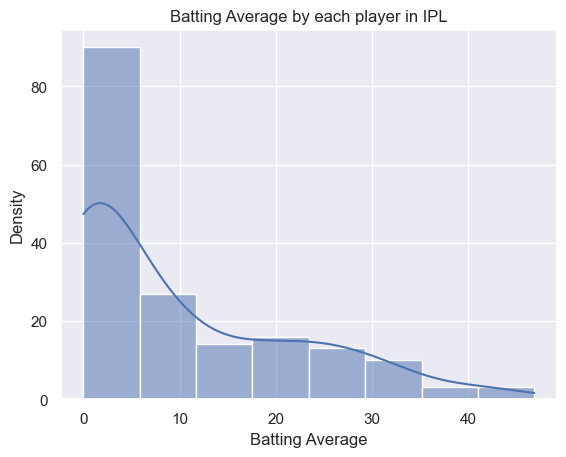

In [46]:
sns.histplot(new['Batting_Average'], bins=8, kde=True)
# Add titles and labels
plt.title('Batting Average by each player in IPL')
plt.xlabel('Batting Average')
plt.ylabel('Density')
plt.show()

In [47]:
#For the variable - Batting_Strike_Rate
new['Batting_Strike_Rate'].describe()

count    176.000000
mean      72.343685
std       58.473772
min        0.000000
25%        0.000000
50%       75.767857
75%      122.796500
max      264.585000
Name: Batting_Strike_Rate, dtype: float64

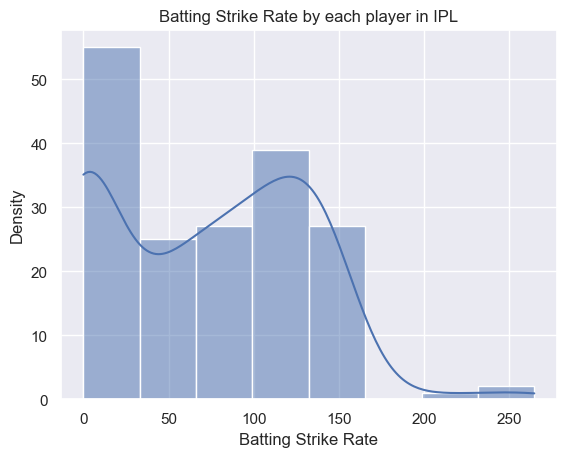

In [48]:
sns.histplot(new['Batting_Strike_Rate'], bins=8, kde=True)
# Add titles and labels
plt.title('Batting Strike Rate by each player in IPL')
plt.xlabel('Batting Strike Rate')
plt.ylabel('Density')
plt.show()

In [49]:
#For the variable - Centuries
new['Centuries'].describe()

count    176.000000
mean       0.119318
std        0.607074
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: Centuries, dtype: float64

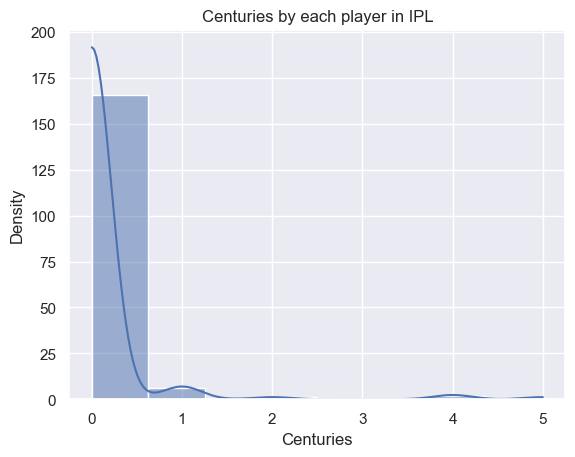

In [50]:
sns.histplot(new['Centuries'], bins=8, kde=True)
# Add titles and labels
plt.title('Centuries by each player in IPL')
plt.xlabel('Centuries')
plt.ylabel('Density')
plt.show()

In [51]:
#For the variable - Half_Centuries
new['Half_Centuries'].describe()

count    176.000000
mean       2.301136
std        6.962364
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       61.000000
Name: Half_Centuries, dtype: float64

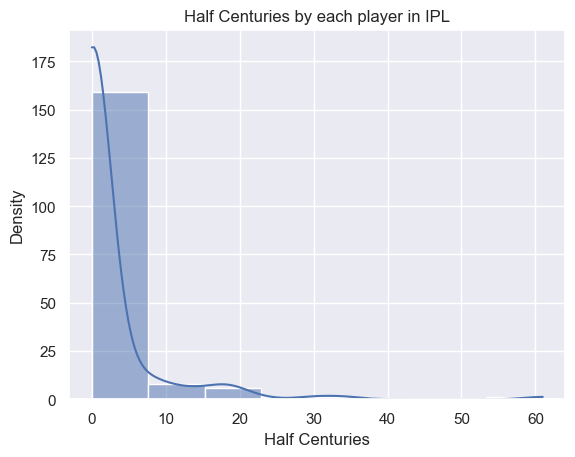

In [52]:
sns.histplot(new['Half_Centuries'], bins=8, kde=True)
# Add titles and labels
plt.title('Half Centuries by each player in IPL')
plt.xlabel('Half Centuries')
plt.ylabel('Density')
plt.show()

In [53]:
#For the variable - Balls_Bowled
new['Balls_Bowled'].describe()

count     176.000000
mean      391.846591
std       738.464356
min         0.000000
25%         0.000000
50%        45.000000
75%       423.000000
max      4218.000000
Name: Balls_Bowled, dtype: float64

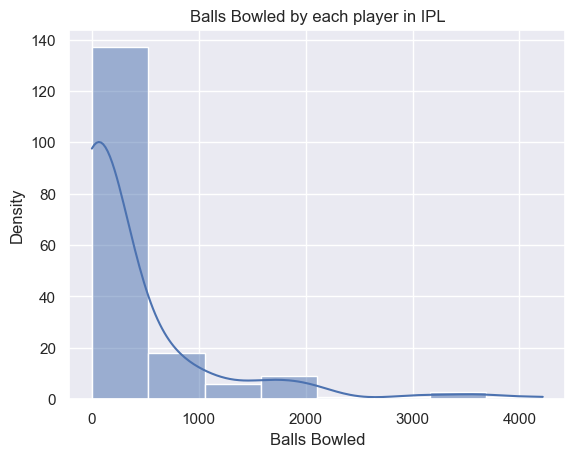

In [54]:
sns.histplot(new['Balls_Bowled'], bins=8, kde=True)
# Add titles and labels
plt.title('Balls Bowled by each player in IPL')
plt.xlabel('Balls Bowled')
plt.ylabel('Density')
plt.show()

In [55]:
#For the variable - Wickets_Taken
new['Wickets_Taken'].describe()

count    176.000000
mean      18.812500
std       36.200774
min        0.000000
25%        0.000000
50%        2.000000
75%       20.250000
max      188.000000
Name: Wickets_Taken, dtype: float64

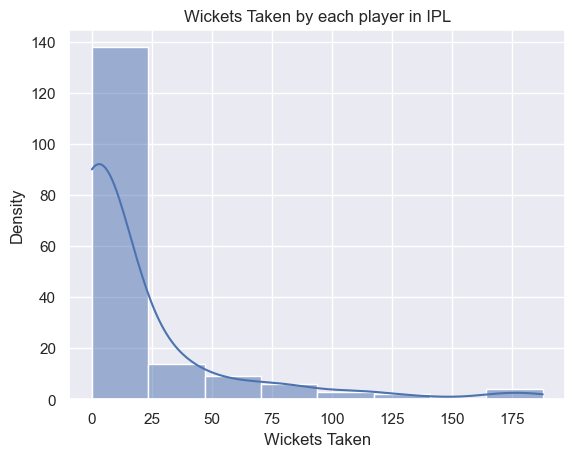

In [56]:
sns.histplot(new['Wickets_Taken'], bins=8, kde=True)
# Add titles and labels
plt.title('Wickets Taken by each player in IPL')
plt.xlabel('Wickets Taken')
plt.ylabel('Density')
plt.show()

In [57]:
#For the variable - Bowling_Average
new['Bowling_Average'].describe()

count    176.000000
mean      16.147303
std       17.001977
min        0.000000
25%        0.000000
50%       14.617500
75%       30.043750
max       67.498000
Name: Bowling_Average, dtype: float64

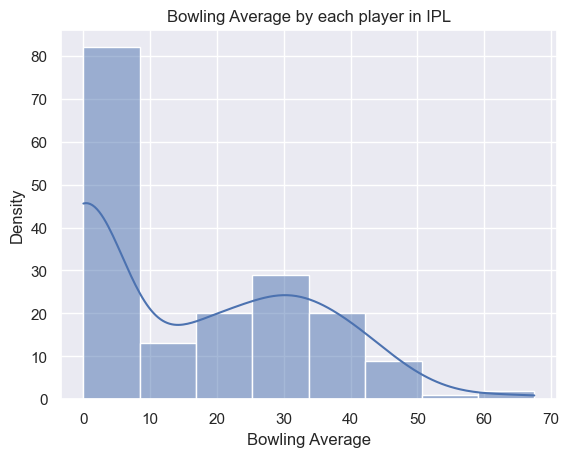

In [58]:
sns.histplot(new['Bowling_Average'], bins=8, kde=True)
# Add titles and labels
plt.title('Bowling Average by each player in IPL')
plt.xlabel('Bowling Average')
plt.ylabel('Density')
plt.show()

In [59]:
#For the variable - Economy_Rate
new['Economy_Rate'].describe()

count    176.000000
mean       5.257866
std        4.405389
min        0.000000
25%        0.000000
50%        7.175556
75%        8.853750
max       13.410000
Name: Economy_Rate, dtype: float64

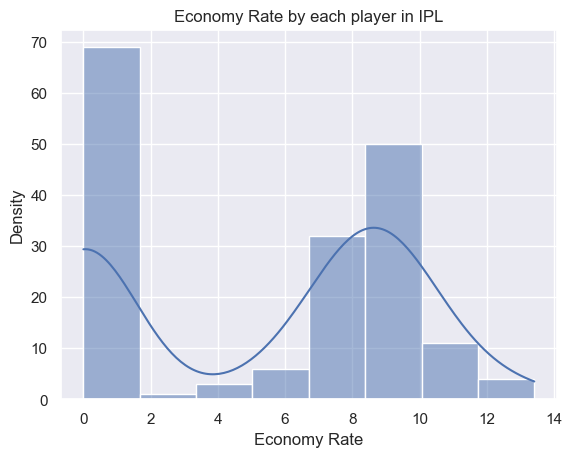

In [60]:
sns.histplot(new['Economy_Rate'], bins=8, kde=True)
# Add titles and labels
plt.title('Economy Rate by each player in IPL')
plt.xlabel('Economy Rate')
plt.ylabel('Density')
plt.show()

In [61]:
#For the variable - Bowling_Strike_Rate
new['Bowling_Strike_Rate'].describe()

count    176.000000
mean      10.933155
std       11.369863
min        0.000000
25%        0.000000
50%        9.520000
75%       21.115833
max       47.242000
Name: Bowling_Strike_Rate, dtype: float64

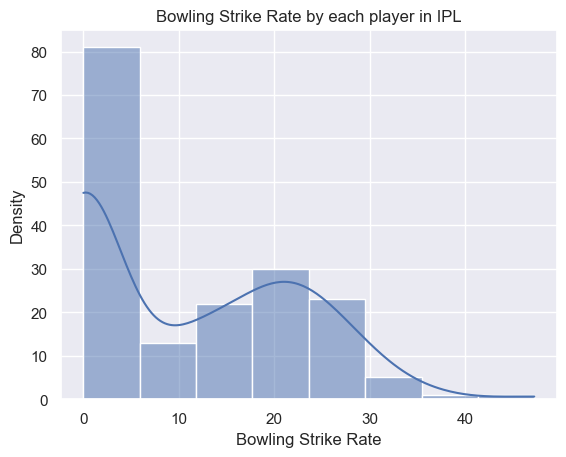

In [62]:
sns.histplot(new['Bowling_Strike_Rate'], bins=8, kde=True)
# Add titles and labels
plt.title('Bowling Strike Rate by each player in IPL')
plt.xlabel('Bowling Strike Rate')
plt.ylabel('Density')
plt.show()

In [63]:
#For the variable - Four_Wicket_Hauls
new['Four_Wicket_Hauls'].describe()

count    176.000000
mean       0.340909
std        0.853716
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Four_Wicket_Hauls, dtype: float64

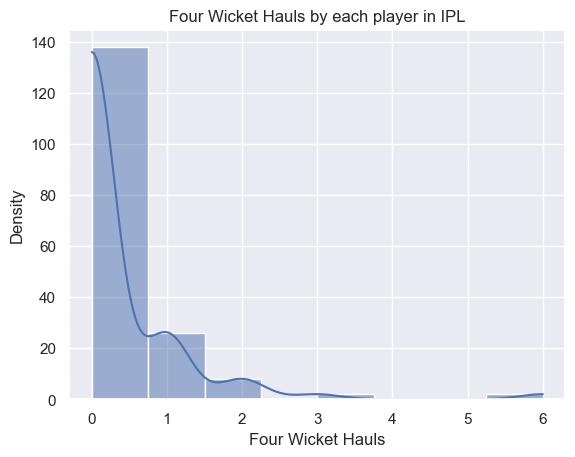

In [64]:
sns.histplot(new['Four_Wicket_Hauls'], bins=8, kde=True)
# Add titles and labels
plt.title('Four Wicket Hauls by each player in IPL')
plt.xlabel('Four Wicket Hauls')
plt.ylabel('Density')
plt.show()

In [65]:
#For the variable - Five_Wicket_Hauls
new['Five_Wicket_Hauls'].describe()

count    176.000000
mean       0.079545
std        0.310634
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: Five_Wicket_Hauls, dtype: float64

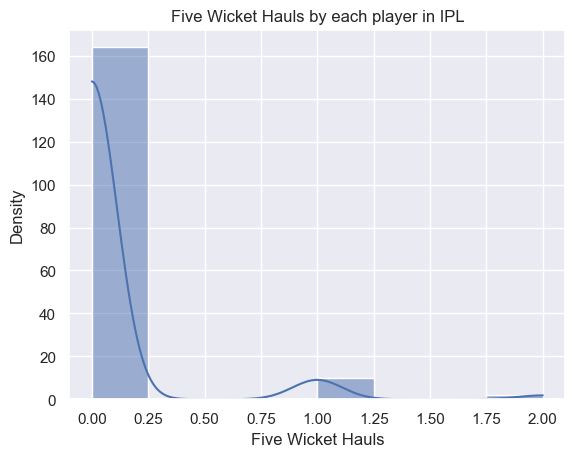

In [66]:
sns.histplot(new['Five_Wicket_Hauls'], bins=8, kde=True)
# Add titles and labels
plt.title('Five Wicket Hauls by each player in IPL')
plt.xlabel('Five Wicket Hauls')
plt.ylabel('Density')
plt.show()

In [67]:
#For the variable - Captaincy %
new['Captaincy %'].describe()

count    176.000000
mean       2.617841
std       10.679130
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       60.000000
Name: Captaincy %, dtype: float64

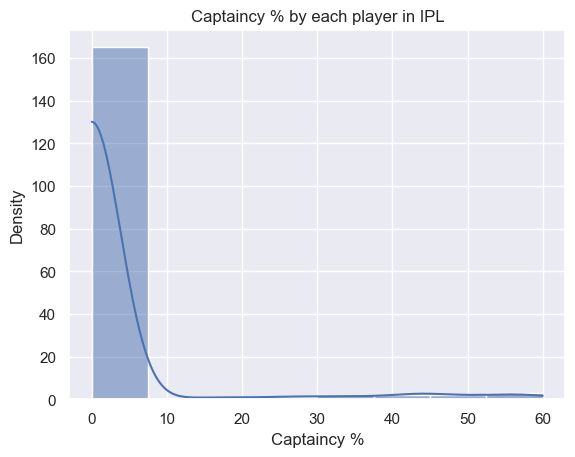

In [68]:
sns.histplot(new['Captaincy %'], bins=8, kde=True)
# Add titles and labels
plt.title('Captaincy % by each player in IPL')
plt.xlabel('Captaincy %')
plt.ylabel('Density')
plt.show()

In [69]:
#For the variable - Catches_Taken
new['Catches_Taken'].describe()

count    176.000000
mean      10.784091
std       16.476441
min        0.000000
25%        0.000000
50%        3.000000
75%       16.000000
max       82.000000
Name: Catches_Taken, dtype: float64

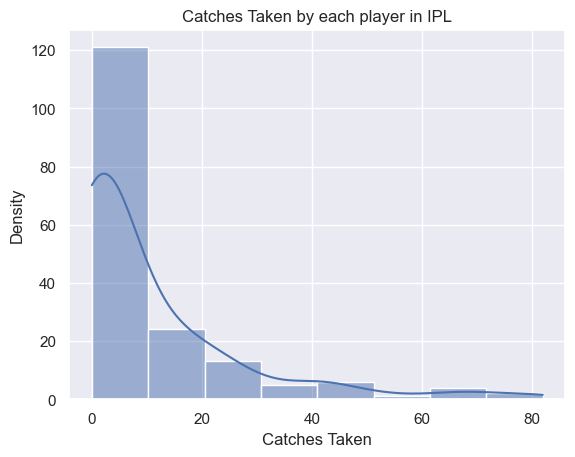

In [70]:
sns.histplot(new['Catches_Taken'], bins=8, kde=True)
# Add titles and labels
plt.title('Catches Taken by each player in IPL')
plt.xlabel('Catches Taken')
plt.ylabel('Density')
plt.show()

In [71]:
#For the variable - Stumpings
new['Stumpings'].describe()

count    176.000000
mean       0.232955
std        1.584657
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       19.000000
Name: Stumpings, dtype: float64

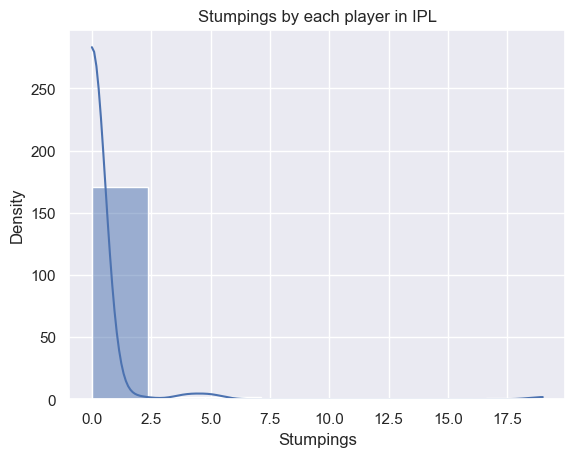

In [72]:
sns.histplot(new['Stumpings'], bins=8, kde=True)
# Add titles and labels
plt.title('Stumpings by each player in IPL')
plt.xlabel('Stumpings')
plt.ylabel('Density')
plt.show()

# (b) Categorical variables

Now for Categorical Variables, we are starting with target variable (Dependent variable) that is accident_severity, followed by other independent categorical variables.

Bar charts are given for each of the categorical variables to illustrate their value counts, along with value count table and descriptive statistics.

In [73]:
#For the variable - Country
new['Country'].describe()

count       176
unique       10
top       India
freq        114
Name: Country, dtype: object

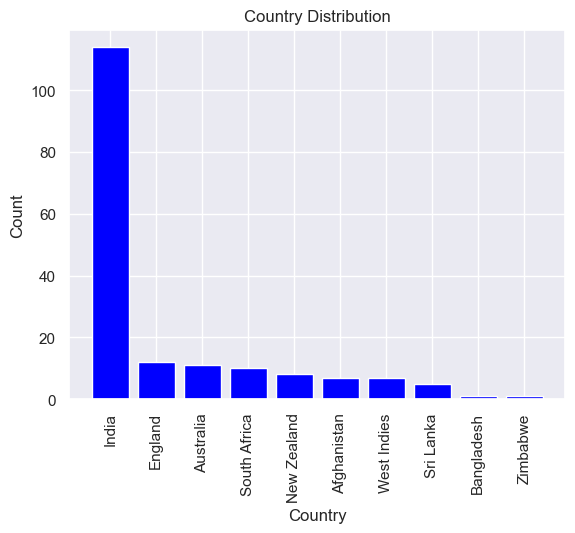

In [74]:
count = new['Country'].value_counts()
# Create bar graph
plt.bar(count.index, count.values, color='blue')

# Add titles and labels
plt.title('Country Distribution')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Count')

# Show plot
plt.show()

In [75]:
#For the variable - Specialism
new['Specialism'].describe()

count        176
unique         4
top       BOWLER
freq          71
Name: Specialism, dtype: object

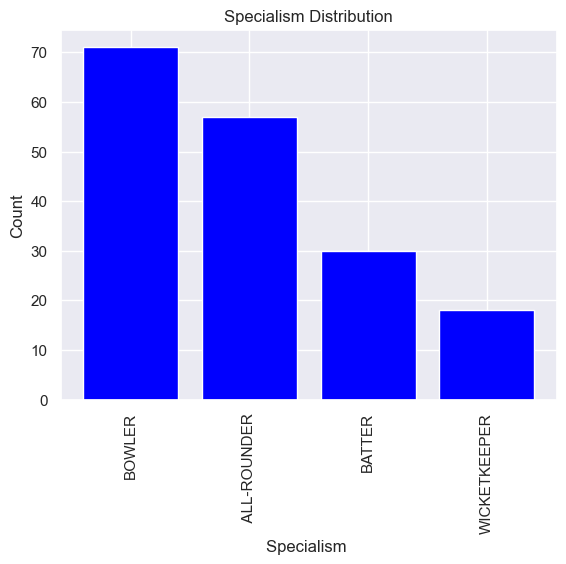

In [76]:
count = new['Specialism'].value_counts()
# Create bar graph
plt.bar(count.index, count.values, color='blue')

# Add titles and labels
plt.title('Specialism Distribution')
plt.xlabel('Specialism ')
plt.ylabel('Count')
plt.tick_params(axis='x', rotation=90)

# Show plot
plt.show()

In [77]:
#For the variable - Batting Style
new['Batting Style'].describe()

count     176
unique      2
top       RHB
freq      125
Name: Batting Style, dtype: object

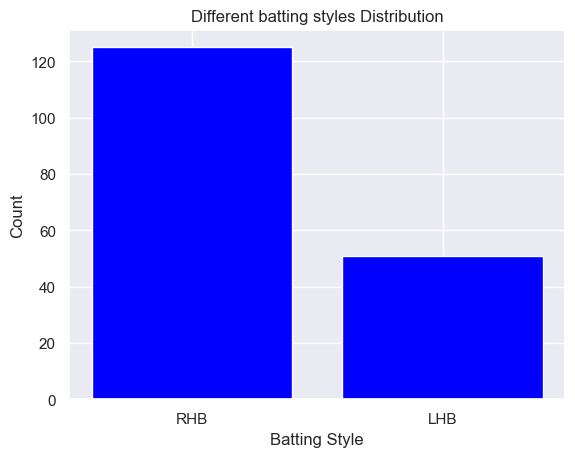

In [78]:
count = new['Batting Style'].value_counts()
# Create bar graph
plt.bar(count.index, count.values, color='blue')

# Add titles and labels
plt.title('Different batting styles Distribution')
plt.xlabel('Batting Style')
plt.ylabel('Count')

# Show plot
plt.show()

In [79]:
#For the variable - Bowling Style
new['Bowling Style'].describe()

count                    176
unique                    11
top       RIGHT ARM Off Spin
freq                      31
Name: Bowling Style, dtype: object

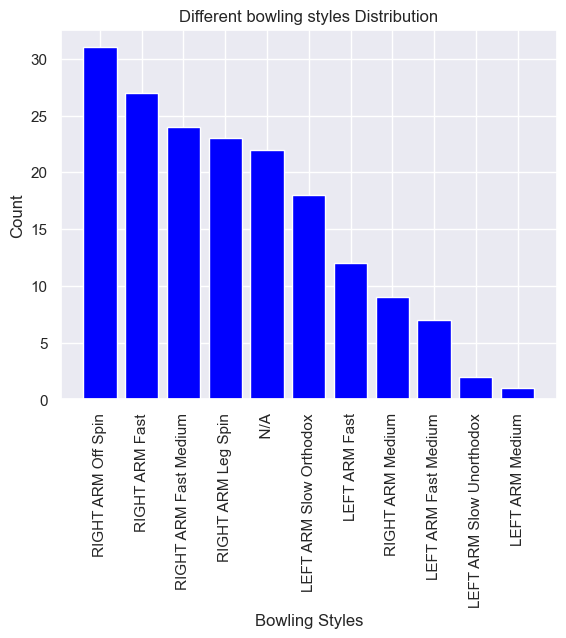

In [80]:
count = new['Bowling Style'].value_counts()
# Create bar graph
plt.bar(count.index, count.values, color='blue')

# Add titles and labels
plt.title('Different bowling styles Distribution')
plt.xlabel('Bowling Styles')
plt.ylabel('Count')
plt.tick_params(axis='x', rotation=90)

# Show plot
plt.show()

In [81]:
#For the variable - Previous IPLTeam(s)
new['Previous IPLTeam(s)'].describe()

count     176
unique     96
top        MI
freq       13
Name: Previous IPLTeam(s), dtype: object

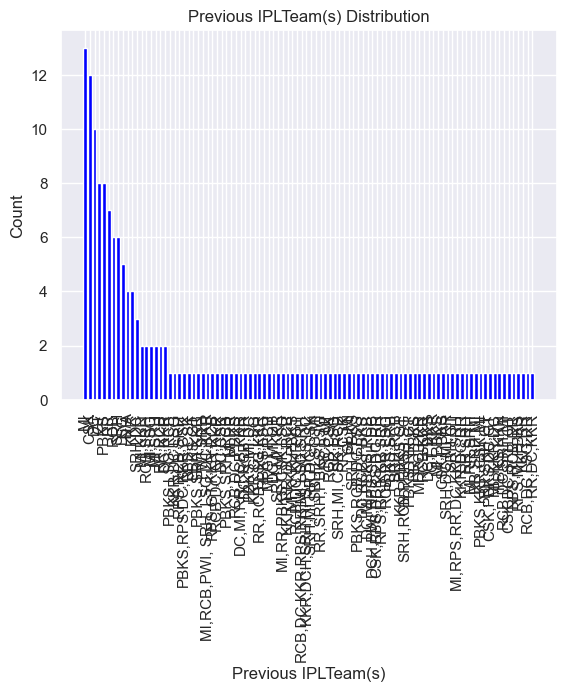

In [82]:
count = new['Previous IPLTeam(s)'].value_counts()
# Create bar graph
plt.bar(count.index, count.values, color='blue')

# Add titles and labels
plt.title('Previous IPLTeam(s) Distribution')
plt.xlabel('Previous IPLTeam(s)')
plt.ylabel('Count')
plt.tick_params(axis='x', rotation=90)

# Show plot
plt.show()

In [83]:
#For the variable - Team 2024
new['Team 2024'].describe()

count     176
unique     12
top       CSK
freq       19
Name: Team 2024, dtype: object

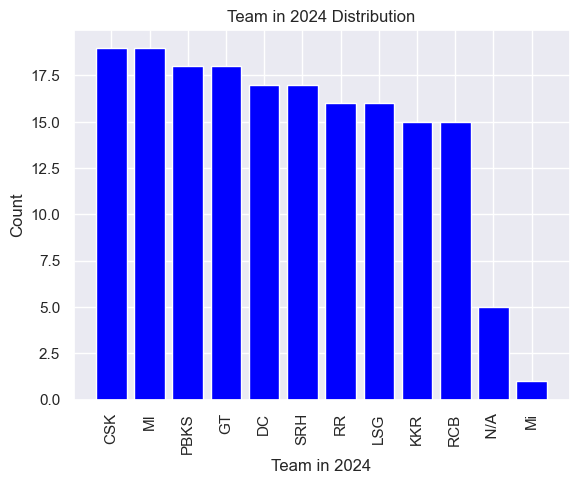

In [84]:
count = new['Team 2024'].value_counts()
# Create bar graph
plt.bar(count.index, count.values, color='blue')

# Add titles and labels
plt.title('Team in 2024 Distribution')
plt.xlabel('Team in 2024')
plt.ylabel('Count')
plt.tick_params(axis='x', rotation=90)

# Show plot
plt.show()

In [85]:
# Replace 'Mi' with 'MI' in the 'Team 2024' column 
new['Team 2024'] = new['Team 2024'].replace('Mi', 'MI')

In [86]:
#For the variable - Team 2024
new['Team 2024'].describe()

count     176
unique     11
top        MI
freq       20
Name: Team 2024, dtype: object

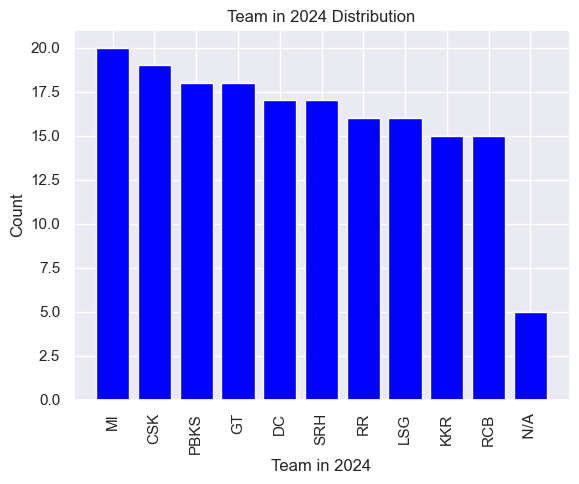

In [87]:
count = new['Team 2024'].value_counts()
# Create bar graph
plt.bar(count.index, count.values, color='blue')

# Add titles and labels
plt.title('Team in 2024 Distribution')
plt.xlabel('Team in 2024')
plt.ylabel('Count')
plt.tick_params(axis='x', rotation=90)

# Show plot
plt.show()

In [88]:
#For the variable - C/U/A
new['C/U/A'].describe()

count        176
unique         2
top       Capped
freq         103
Name: C/U/A, dtype: object

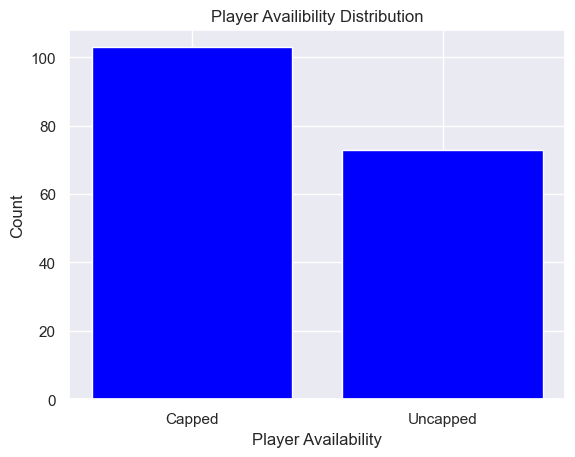

In [89]:
count = new['C/U/A'].value_counts()
# Create bar graph
plt.bar(count.index, count.values, color='blue')

# Add titles and labels
plt.title('Player Availibility Distribution')
plt.xlabel('Player Availability')
plt.ylabel('Count')

# Show plot
plt.show()

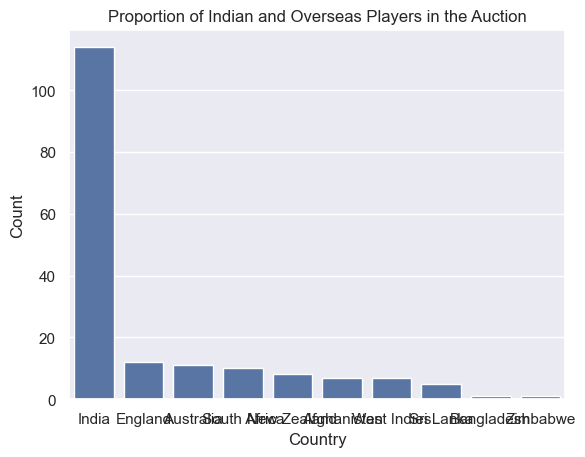

In [90]:
# Count the number of players by nationality 
Country_counts = new['Country'].value_counts().reset_index() 
Country_counts.columns = ['Country', 'Count'] 
# Plot the bar chart 
sns.barplot(x='Country', y='Count', data=Country_counts)
# Add titles and labels 
plt.title('Proportion of Indian and Overseas Players in the Auction')
plt.xlabel('Country') 
plt.ylabel('Count') 
# Show the plot 
plt.show()

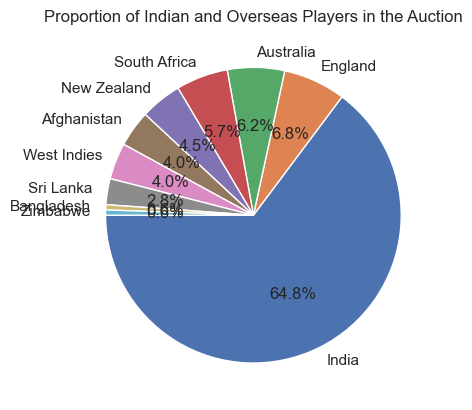

In [91]:
# Count the number of players by nationality 
Country_counts = new['Country'].value_counts()
# Plot the pie chart 
plt.pie(Country_counts, labels=Country_counts.index, autopct='%1.1f%%', startangle=180)
# Add a title
plt.title('Proportion of Indian and Overseas Players in the Auction') 
# Show the plot 
plt.show()

'India': 0, 'Australia': 1, 'England': 2, 'New Zealand': 3, 'South Africa': 4, 'Sri Lanka': 5, 'West Indies': 6, 'Afghanistan': 7, 'Bangladesh': 8, 'Zimbabwe': 9



From this visualizations, we can get the general idea of the overall distribution of the data.

# 6.2 Bivariate Analysis
We now visualize their relationships with each other using appropriate graphs for categorical and numerical variables. We will mostly see how they are associated with our target variable to understand their usability in our Models.

After understanding the Numerical corelations, we'll visualize the impact of all variables on Price Rs (Lakhs) along with underlying associations and relationships.

First we will start with correlation matrix for numerical variables

In [92]:
# Matrix plots for numerical variables against each other
#Computes correlation coefficients (e.g., Pearson or Spearman) to identify relationships between numeric variables.
corr_matrix = new.corr(method="pearson", numeric_only=True)
corr_matrix

Player ID_x       Age  Test caps  ODI caps  T20 caps  \
Player ID_x             1.000000 -0.045131  -0.232061 -0.195480 -0.221315   
Age                    -0.045131  1.000000   0.460141  0.555146  0.477288   
Test caps              -0.232061  0.460141   1.000000  0.677026  0.521384   
ODI caps               -0.195480  0.555146   0.677026  1.000000  0.851016   
T20 caps               -0.221315  0.477288   0.521384  0.851016  1.000000   
IPL                    -0.383391  0.588599   0.465499  0.500758  0.416487   
Past Price (Crores)    -0.502525  0.321597   0.258918  0.302335  0.312429   
Price Rs (Lakhs)       -0.292922  0.402704   0.447881  0.598233  0.722212   
Player ID_y             0.064716  0.050478  -0.120966 -0.086115 -0.036957   
Matches_Batted         -0.351796  0.578215   0.445536  0.494645  0.412353   
Runs_Scored            -0.306893  0.367160   0.409926  0.456277  0.423932   
Batting_Average        -0.314405  0.336642   0.290717  0.391580  0.418823   
Batting_Strike_Rate    -0.290146  0.374958   0.213100  0.332560  0.350282   
Centuries              -0.208082  0.220830   0.398711  0.405575  0.360743   
Half_Centuries         -0.264525  0.306582   0.436875  0.436267  0.396112   
Balls_Bowled           -0.174169  0.443400   0.291368  0.278537  0.189515   
Wickets_Taken          -0.201545  0.430124   0.274388  0.272058  0.199874   
Bowling_Average         0.100018  0.283418   0.056394  0.118308  0.104332   
Economy_Rate            0.074340  0.232094   0.013870  0.073970  0.106205   
Bowling_Strike_Rate     0.096819  0.312302   0.083439  0.142023  0.130893   
Four_Wicket_Hauls      -0.197783  0.278294   0.144888  0.222654  0.199853   
Five_Wicket_Hauls      -0.054046  0.179530   0.113811  0.086906  0.145062   
Captaincy %            -0.200932  0.169700   0.242270  0.193492  0.207399   
Catches_Taken          -0.336987  0.507877   0.439161  0.513212  0.457679   
Stumpings              -0.167470  0.017284   0.149860  0.056951  0.168065   

                          IPL  Past Price (Crores)  Price Rs (Lakhs)  \
Player ID_x         -0.383391            -0.502525         -0.292922   
Age                  0.588599             0.321597          0.402704   
Test caps            0.465499             0.258918          0.447881   
ODI caps             0.500758             0.302335          0.598233   
T20 caps             0.416487             0.312429          0.722212   
IPL                  1.000000             0.603563          0.466984   
Past Price (Crores)  0.603563             1.000000          0.450227   
Price Rs (Lakhs)     0.466984             0.450227          1.000000   
Player ID_y         -0.011749             0.048430         -0.021935   
Matches_Batted       0.993747             0.542012          0.448966   
Runs_Scored          0.666459             0.320804          0.320091   
Batting_Average      0.393295             0.312674          0.382846   
Batting_Strike_Rate  0.356825             0.351731          0.351423   
Centuries            0.392604             0.206876          0.216493   
Half_Centuries       0.561048             0.231792          0.283691   
Balls_Bowled         0.682908             0.415798          0.335655   
Wickets_Taken        0.667345             0.425136          0.340371   
Bowling_Average      0.203788             0.100066          0.261513   
Economy_Rate         0.124228             0.158660          0.221702   
Bowling_Strike_Rate  0.232751             0.106035          0.271100   
Four_Wicket_Hauls    0.419162             0.334816          0.256695   
Five_Wicket_Hauls    0.271840             0.187473          0.136540   
Captaincy %          0.461455             0.344921          0.279091   
Catches_Taken        0.883413             0.494606          0.406395   
Stumpings            0.172115             0.195797          0.145972   

                     Player ID_y  Matches_Batted  ...  Balls_Bowled  \
Player ID_x             0.064716       -0.351796  ...     -0.174169   
Age

Here we will only see correlation between 2 pair of variables further. Those variable pairs are Matches_Batted-Runs_Scored and Balls_Bowled-Wickets_Taken.

# (i) Correlation between Matches_Batted and Runs_Scored using scatterplot

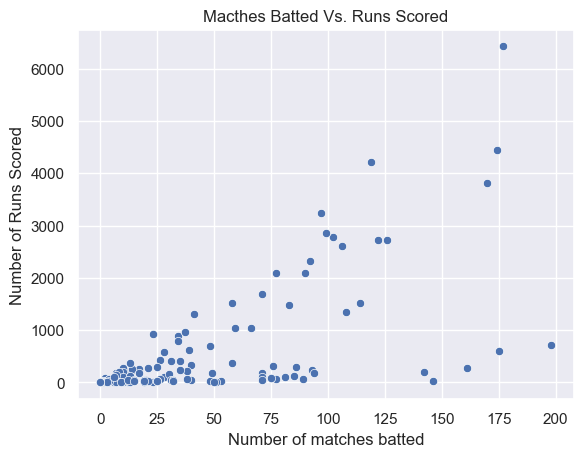

In [93]:
# Bi-variate visualization of matches Batted Vs. Runs Scored
sns.scatterplot(x=new['Matches_Batted'], y=new['Runs_Scored'])

# Add titles and labels
plt.title('Macthes Batted Vs. Runs Scored')
plt.xlabel('Number of matches batted')
plt.ylabel('Number of Runs Scored')

# Show plot
plt.show()

# (ii) Correlation between balls bowled and wickets taken using scatterplot

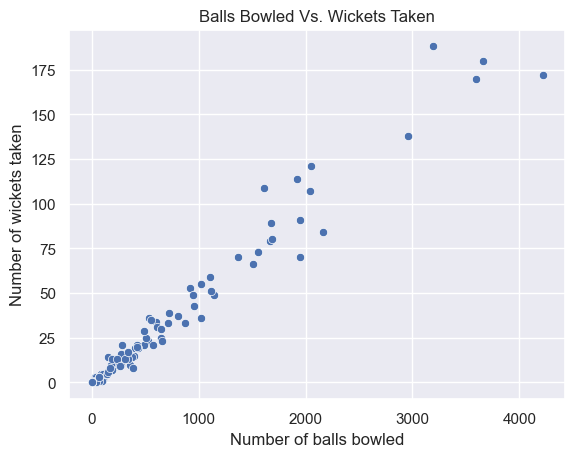

In [94]:
# Bi-variate visualization of balls bowled vs wickets taken
sns.scatterplot(x=new['Balls_Bowled'], y=new['Wickets_Taken'])

# Add titles and labels
plt.title('Balls Bowled Vs. Wickets Taken')
plt.xlabel('Number of balls bowled')
plt.ylabel('Number of wickets taken')

# Show plot
plt.show()

# (iii) Bivariate analysis for numerical variables

In [95]:
# Group by the Price Rs (Lakhs) and describe the Age
grouped_stats = new.groupby('Price Rs (Lakhs)')['Age'].describe()
print(grouped_stats)

                  count       mean       std   min    25%   50%    75%   max
Price Rs (Lakhs)                                                            
30.0               67.0  25.880597  3.632857  20.0  23.50  26.0  28.00  35.0
40.0                1.0  24.000000       NaN  24.0  24.00  24.0  24.00  24.0
50.0                5.0  32.800000  5.167204  25.0  30.00  36.0  36.00  37.0
75.0               20.0  29.050000  4.084309  21.0  25.75  29.0  31.25  36.0
100.0               8.0  30.500000  3.338092  25.0  28.75  30.5  32.25  36.0
125.0               6.0  29.833333  5.419102  24.0  25.25  30.0  32.50  38.0
150.0              11.0  30.636364  4.945154  25.0  26.00  31.0  33.50  40.0
200.0              58.0  30.482759  4.243639  20.0  27.25  31.0  34.00  38.0


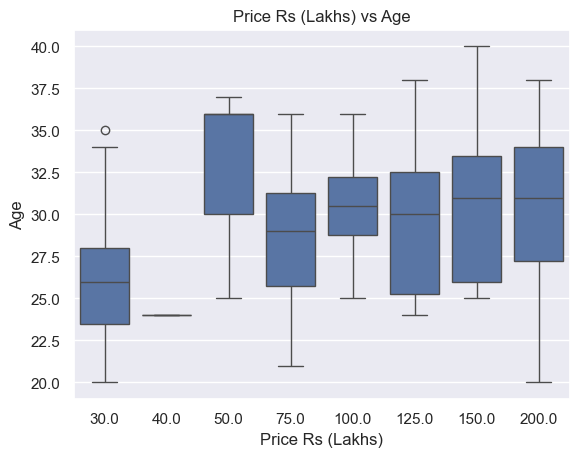

In [96]:
# Bi-variate visualization of Price Rs (Lakhs) vs Age
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['Age'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs Age')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Age')

# Show plot
plt.show()

In [97]:
# Group by the Price Rs (Lakhs) and describe the Test caps
grouped_stats = new.groupby('Price Rs (Lakhs)')['Test caps'].describe()
print(grouped_stats)

                  count       mean        std  min   25%   50%    75%    max
Price Rs (Lakhs)                                                            
30.0               67.0   0.000000   0.000000  0.0  0.00   0.0   0.00    0.0
40.0                1.0   0.000000        NaN  0.0  0.00   0.0   0.00    0.0
50.0                5.0   0.000000   0.000000  0.0  0.00   0.0   0.00    0.0
75.0               20.0   7.550000  23.356448  0.0  0.00   0.0   5.25  105.0
100.0               8.0   1.000000   1.851640  0.0  0.00   0.0   1.00    4.0
125.0               6.0  14.333333  12.894443  3.0  5.25  12.5  16.00   38.0
150.0              11.0   9.181818  25.360671  0.0  0.00   0.0   2.50   85.0
200.0              58.0  25.672414  33.570239  0.0  0.25   9.0  40.00  112.0


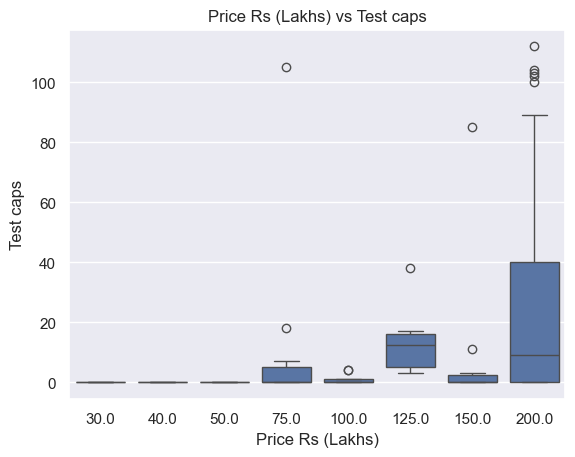

In [98]:
# Bi-variate visualization of Price Rs (Lakhs) vs Test caps
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['Test caps'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs Test caps')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Test caps')

# Show plot
plt.show()

In [99]:
# Group by the Price Rs (Lakhs) and describe the ODI caps
grouped_stats = new.groupby('Price Rs (Lakhs)')['ODI caps'].describe()
print(grouped_stats)

                  count       mean        std  min    25%   50%     75%    max
Price Rs (Lakhs)                                                              
30.0               67.0   0.000000   0.000000  0.0   0.00   0.0    0.00    0.0
40.0                1.0   0.000000        NaN  0.0   0.00   0.0    0.00    0.0
50.0                5.0   0.000000   0.000000  0.0   0.00   0.0    0.00    0.0
75.0               20.0  12.200000  19.130026  0.0   0.00   4.0   17.00   80.0
100.0               8.0   2.750000   3.693624  0.0   0.00   1.0    4.25    9.0
125.0               6.0  60.666667  59.865405  5.0  16.25  37.5  109.00  142.0
150.0              11.0  53.000000  62.745518  0.0   8.00  30.0   70.50  173.0
200.0              58.0  56.172414  47.988719  0.0  17.75  41.0   89.00  181.0


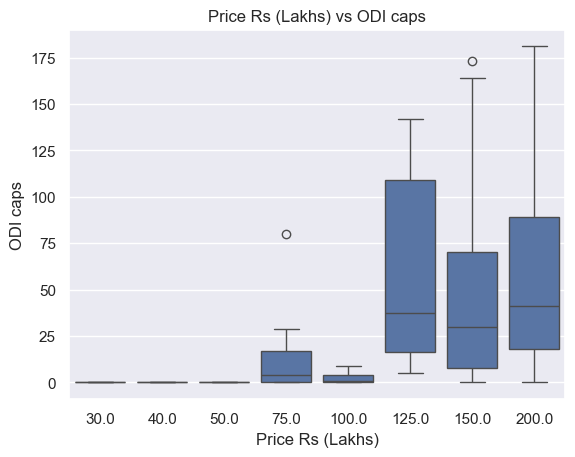

In [100]:
# Bi-variate visualization of Price Rs (Lakhs) vs ODI caps
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['ODI caps'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs ODI caps')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('ODI caps')

# Show plot
plt.show()

In [101]:
# Group by the Price Rs (Lakhs) and describe the T20 caps
grouped_stats = new.groupby('Price Rs (Lakhs)')['T20 caps'].describe()
print(grouped_stats)

                  count       mean        std  min    25%   50%    75%    max
Price Rs (Lakhs)                                                             
30.0               67.0   0.000000   0.000000  0.0   0.00   0.0   0.00    0.0
40.0                1.0   0.000000        NaN  0.0   0.00   0.0   0.00    0.0
50.0                5.0   0.000000   0.000000  0.0   0.00   0.0   0.00    0.0
75.0               20.0  12.200000  12.547174  0.0   2.00   8.0  17.25   39.0
100.0               8.0   6.000000   6.524678  0.0   1.50   4.0   9.25   19.0
125.0               6.0  34.666667  36.153377  2.0   7.75  24.5  50.25   96.0
150.0              11.0  46.636364  45.769581  2.0  15.50  24.0  64.50  129.0
200.0              58.0  51.913793  30.602881  2.0  26.00  51.0  71.75  124.0


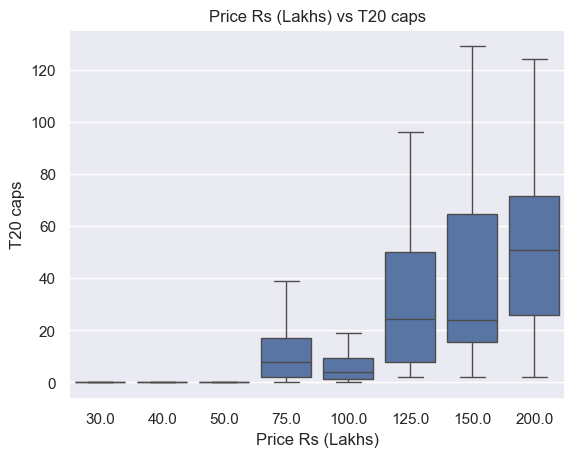

In [102]:
# Bi-variate visualization of Price Rs (Lakhs) vs T20 caps
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['T20 caps'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs T20 caps')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('T20 caps')

# Show plot
plt.show()

In [103]:
# Group by the Price Rs (Lakhs) and describe the IPL
grouped_stats = new.groupby('Price Rs (Lakhs)')['IPL'].describe()
print(grouped_stats)

                  count       mean        std   min    25%   50%     75%  \
Price Rs (Lakhs)                                                           
30.0               67.0   9.686567  14.343417   0.0   0.00   4.0   11.50   
40.0                1.0  20.000000        NaN  20.0  20.00  20.0   20.00   
50.0                5.0  86.200000  71.945813   4.0  40.00  84.0  111.00   
75.0               20.0  35.950000  49.611623   0.0   4.75  12.0   39.25   
100.0               8.0  45.500000  33.517586   6.0  29.00  38.0   60.75   
125.0               6.0  11.333333   5.240865   6.0   9.00   9.5   12.25   
150.0              11.0  52.181818  60.269094   7.0  10.00  27.0   69.50   
200.0              58.0  65.137931  50.436150   5.0  22.00  51.0  102.00   

                    max  
Price Rs (Lakhs)         
30.0               72.0  
40.0               20.0  
50.0              192.0  
75.0              171.0  
100.0             105.0  
125.0              21.0  
150.0             185.0  
200.0

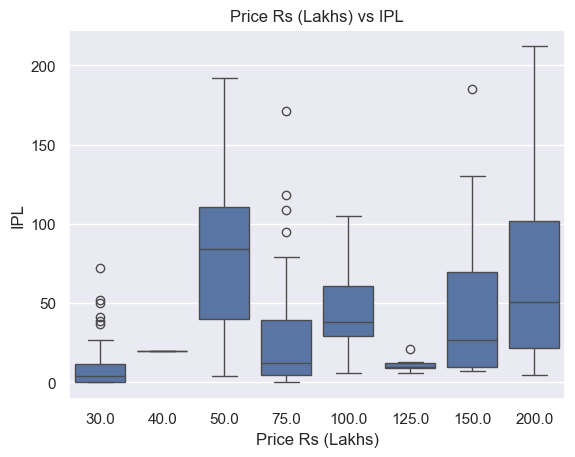

In [104]:
# Bi-variate visualization of Price Rs (Lakhs) vs IPL
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['IPL'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs IPL')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('IPL')

# Show plot
plt.show()

In [105]:
# Group by the Price Rs (Lakhs) and describe the Past Price (Crores)
grouped_stats = new.groupby('Price Rs (Lakhs)')['Past Price (Crores)'].describe()
print(grouped_stats)

                  count      mean       std  min   25%   50%    75%   max
Price Rs (Lakhs)                                                         
30.0               67.0  2.776119  3.732823  0.0  0.00   1.0   4.00  16.0
40.0                1.0  1.000000       NaN  1.0  1.00   1.0   1.00   1.0
50.0                5.0  9.200000  3.114482  4.0  9.00  10.0  11.00  12.0
75.0               20.0  3.000000  3.387283  0.0  0.75   1.5   4.50  11.0
100.0               8.0  8.375000  6.186102  1.0  1.75  10.0  13.25  16.0
125.0               6.0  5.166667  3.763863  1.0  2.25   4.5   8.25  10.0
150.0              11.0  5.363636  4.759679  0.0  1.00   6.0   9.50  13.0
200.0              58.0  8.379310  5.392742  0.0  3.25   9.0  13.75  16.0


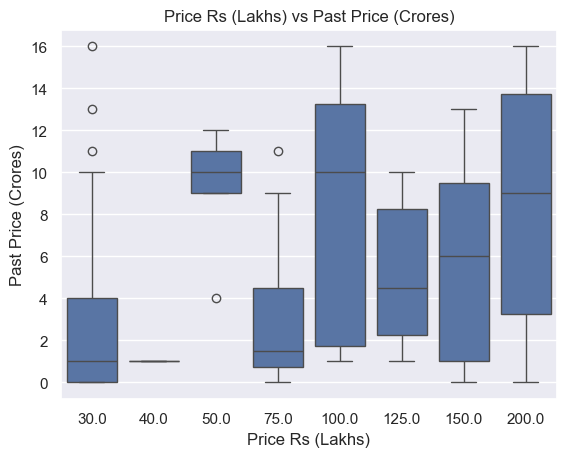

In [106]:
# Bi-variate visualization of Price Rs (Lakhs) vs Past Price (Crores)
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['Past Price (Crores)'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs Past Price (Crores)')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Past Price (Crores)')

# Show plot
plt.show()

In [107]:
# Group by the Price Rs (Lakhs) and describe the Matches Batted
grouped_stats = new.groupby('Price Rs (Lakhs)')['Matches_Batted'].describe()
print(grouped_stats)

                  count       mean        std   min   25%   50%    75%    max
Price Rs (Lakhs)                                                             
30.0               67.0   7.164179  12.647430   0.0   0.0   2.0   7.00   66.0
40.0                1.0  19.000000        NaN  19.0  19.0  19.0  19.00   19.0
50.0                5.0  73.400000  66.425146   0.0  31.0  76.0  85.00  175.0
75.0               20.0  31.700000  46.273899   0.0   1.0  11.5  36.50  170.0
100.0               8.0  38.000000  30.761757   4.0  20.5  31.5  47.75   94.0
125.0               6.0   6.833333   7.440878   1.0   1.0   4.0  10.75   19.0
150.0              11.0  47.000000  59.028807   1.0   7.0  17.0  69.00  174.0
200.0              58.0  56.637931  47.938447   0.0  16.0  44.5  85.25  198.0


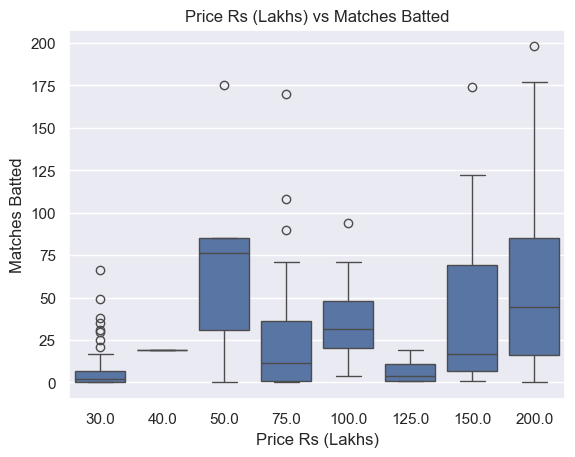

In [108]:
# Bi-variate visualization of Price Rs (Lakhs) vs Matches Batted
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['Matches_Batted'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs Matches Batted')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Matches Batted')

# Show plot
plt.show()

In [109]:
# Group by the Price Rs (Lakhs) and describe the Runs Scored
grouped_stats = new.groupby('Price Rs (Lakhs)')['Runs_Scored'].describe()
print(grouped_stats)

                  count        mean          std   min    25%    50%      75%  \
Price Rs (Lakhs)                                                                
30.0               67.0   55.776119   149.863152   0.0    0.0    0.0    19.00   
40.0                1.0   13.000000          NaN  13.0   13.0   13.0    13.00   
50.0                5.0  293.800000   240.569533   0.0  122.0  319.0   419.00   
75.0               20.0  494.850000   997.082812   0.0    0.0   21.5   250.00   
100.0               8.0  185.625000   198.745305   3.0   20.0  140.5   269.50   
125.0               6.0   44.166667    50.905468   0.0    9.0   38.0    47.50   
150.0              11.0  959.363636  1546.323334  17.0   54.5  106.0  1430.00   
200.0              58.0  741.189655  1227.258798   0.0   32.5  191.0   913.75   

                     max  
Price Rs (Lakhs)          
30.0              1038.0  
40.0                13.0  
50.0               609.0  
75.0              3808.0  
100.0              579.0  


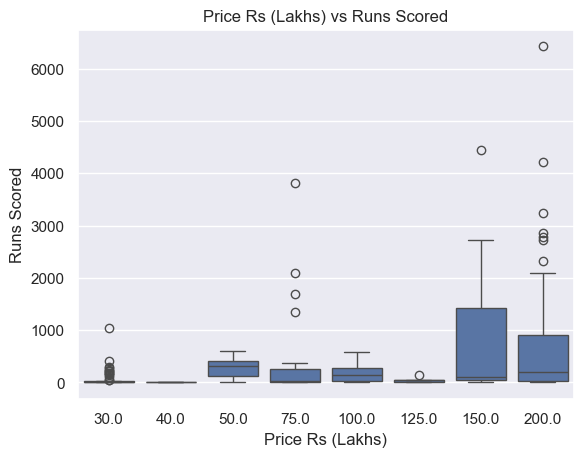

In [110]:
# Bi-variate visualization of Price Rs (Lakhs) vs Runs Scored
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['Runs_Scored'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs Runs Scored')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Runs Scored')

# Show plot
plt.show()

In [111]:
# Group by the Price Rs (Lakhs) and describe the Batting Average
grouped_stats = new.groupby('Price Rs (Lakhs)')['Batting_Average'].describe()
print(grouped_stats)

                  count       mean        std     min        25%        50%  \
Price Rs (Lakhs)                                                              
30.0               67.0   4.793253   7.698721  0.0000   0.000000   0.000000   
40.0                1.0   2.375000        NaN  2.3750   2.375000   2.375000   
50.0                5.0   6.878796   6.174677  0.0000   3.583000   5.340000   
75.0               20.0  11.016916  12.803642  0.0000   0.000000   4.511905   
100.0               8.0   9.262024   7.601402  0.5000   4.652143   6.875000   
125.0               6.0  13.008333  14.095049  0.0000   2.125000   8.125000   
150.0              11.0  18.956207  11.411399  5.8325  10.981500  15.550000   
200.0              58.0  14.845834  13.287295  0.0000   3.062500   9.977083   

                        75%        max  
Price Rs (Lakhs)                        
30.0               7.353750  26.780000  
40.0               2.375000   2.375000  
50.0               9.318125  16.152857  
75.0

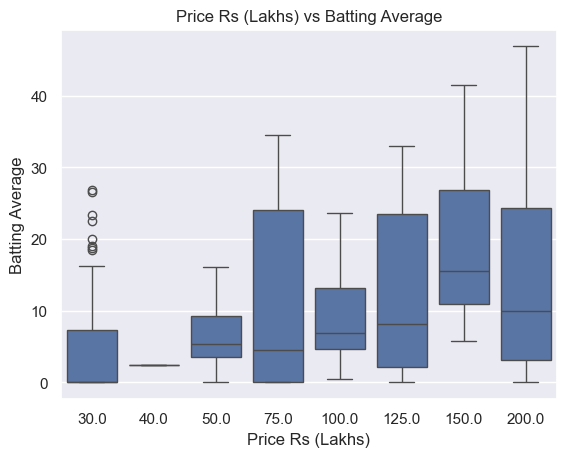

In [112]:
# Bi-variate visualization of Price Rs (Lakhs) vs Batting Average
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['Batting_Average'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs Batting Average')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Batting Average')

# Show plot
plt.show()

In [113]:
# Group by the Price Rs (Lakhs) and describe the Batting Strike Rate
grouped_stats = new.groupby('Price Rs (Lakhs)')['Batting_Strike_Rate'].describe()
print(grouped_stats)

                  count        mean        std      min        25%  \
Price Rs (Lakhs)                                                     
30.0               67.0   47.162792  62.282129   0.0000   0.000000   
40.0                1.0   58.332500        NaN  58.3325  58.332500   
50.0                5.0   70.713314  57.775485   0.0000  49.087000   
75.0               20.0   62.492408  58.163678   0.0000   0.000000   
100.0               8.0   89.926440  50.064725  15.0000  54.735357   
125.0               6.0   90.092917  63.099368   0.0000  44.951875   
150.0              11.0  119.911071  48.151025  60.0000  91.037500   
200.0              58.0   91.928337  43.516155   0.0000  62.271250   

                         50%         75%         max  
Price Rs (Lakhs)                                      
30.0                0.000000   99.319167  264.585000  
40.0               58.332500   58.332500   58.332500  
50.0               60.500909   86.484375  157.494286  
75.0               51.71

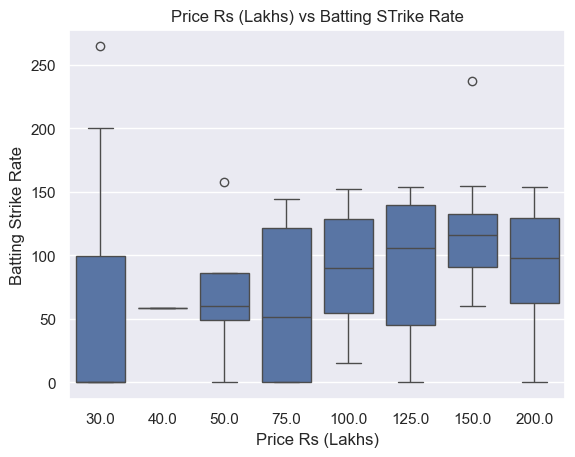

In [114]:
# Bi-variate visualization of Price Rs (Lakhs) vs Batting Strike Rate
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['Batting_Strike_Rate'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs Batting STrike Rate')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Batting Strike Rate')

# Show plot
plt.show()

In [115]:
# Group by the Price Rs (Lakhs) and describe the Centuries
grouped_stats = new.groupby('Price Rs (Lakhs)')['Centuries'].describe()
print(grouped_stats)

                  count      mean       std  min  25%  50%  75%  max
Price Rs (Lakhs)                                                    
30.0               67.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
40.0                1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
50.0                5.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
75.0               20.0  0.050000  0.223607  0.0  0.0  0.0  0.0  1.0
100.0               8.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
125.0               6.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
150.0              11.0  0.272727  0.646670  0.0  0.0  0.0  0.0  2.0
200.0              58.0  0.293103  0.991342  0.0  0.0  0.0  0.0  5.0


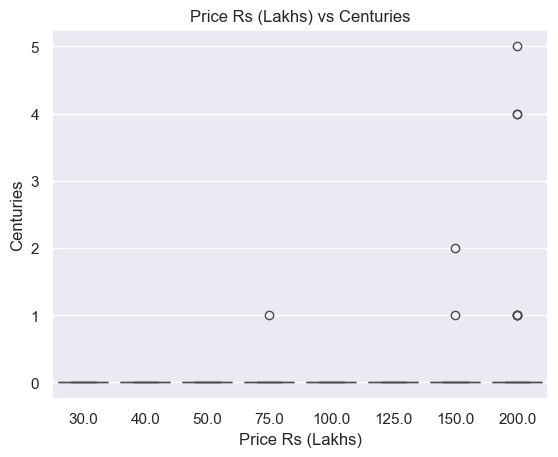

In [116]:
# Bi-variate visualization of Price Rs (Lakhs) vs Centuries
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['Centuries'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs Centuries')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Centuries')

# Show plot
plt.show()

In [117]:
# Group by the Price Rs (Lakhs) and describe the Half Centuries
grouped_stats = new.groupby('Price Rs (Lakhs)')['Half_Centuries'].describe()
print(grouped_stats)

                  count      mean        std  min  25%  50%   75%   max
Price Rs (Lakhs)                                                       
30.0               67.0  0.179104   0.815111  0.0  0.0  0.0  0.00   6.0
40.0                1.0  0.000000        NaN  0.0  0.0  0.0  0.00   0.0
50.0                5.0  0.200000   0.447214  0.0  0.0  0.0  0.00   1.0
75.0               20.0  2.900000   5.946250  0.0  0.0  0.0  1.75  22.0
100.0               8.0  0.000000   0.000000  0.0  0.0  0.0  0.00   0.0
125.0               6.0  0.166667   0.408248  0.0  0.0  0.0  0.00   1.0
150.0              11.0  5.545455  10.152474  0.0  0.0  0.0  6.50  30.0
200.0              58.0  4.689655  10.158752  0.0  0.0  0.0  4.75  61.0


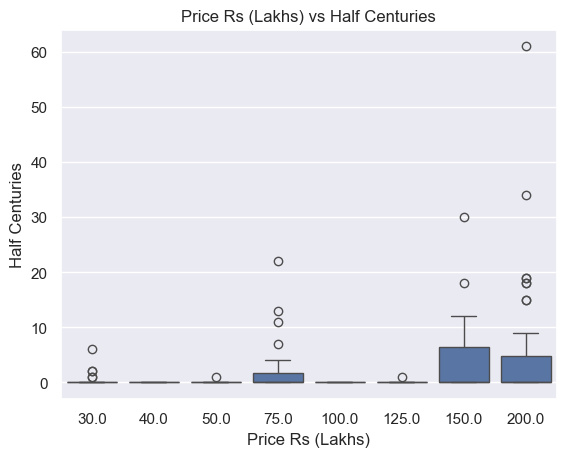

In [118]:
# Bi-variate visualization of Price Rs (Lakhs) vs Half Centuries
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['Half_Centuries'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs Half Centuries')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Half Centuries')

# Show plot
plt.show()

In [119]:
# Group by the Price Rs (Lakhs) and describe the Balls Bowled
grouped_stats = new.groupby('Price Rs (Lakhs)')['Balls_Bowled'].describe()
print(grouped_stats)

                  count         mean          std    min     25%     50%  \
Price Rs (Lakhs)                                                           
30.0               67.0    81.507463   173.751684    0.0    0.00     0.0   
40.0                1.0   398.000000          NaN  398.0  398.00   398.0   
50.0                5.0  1430.800000  1517.254659    0.0   84.00  1363.0   
75.0               20.0   223.450000   488.461977    0.0    0.00    12.0   
100.0               8.0   632.250000   718.079731    0.0  107.25   443.5   
125.0               6.0   131.000000   166.899970    0.0   19.50    48.0   
150.0              11.0   180.454545   255.394739    0.0   12.00    41.0   
200.0              58.0   752.655172   973.037774    0.0    7.50   367.0   

                      75%     max  
Price Rs (Lakhs)                   
30.0                75.50   949.0  
40.0               398.00   398.0  
50.0              2049.00  3658.0  
75.0               340.75  2165.0  
100.0              809.

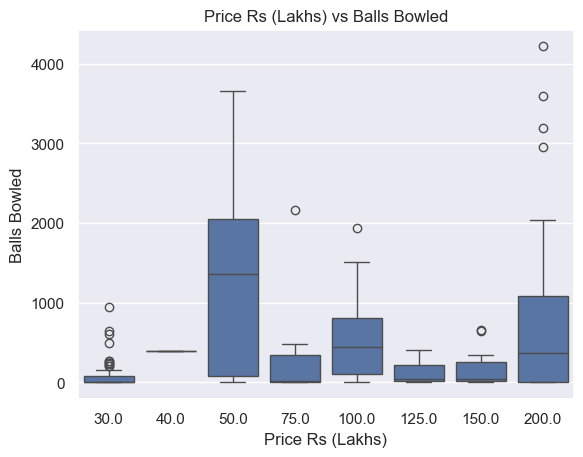

In [120]:
# Bi-variate visualization of Price Rs (Lakhs) vs Balls Bowled
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['Balls_Bowled'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs Balls Bowled')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Balls Bowled')

# Show plot
plt.show()

In [121]:
# Group by the Price Rs (Lakhs) and describe the wickets taken
grouped_stats = new.groupby('Price Rs (Lakhs)')['Wickets_Taken'].describe()
print(grouped_stats)

                  count       mean        std   min    25%   50%     75%  \
Price Rs (Lakhs)                                                           
30.0               67.0   3.731343   8.428994   0.0   0.00   0.0    3.00   
40.0                1.0  15.000000        NaN  15.0  15.00  15.0   15.00   
50.0                5.0  74.400000  77.886456   0.0   1.00  70.0  121.00   
75.0               20.0   9.050000  19.448921   0.0   0.00   0.5    8.50   
100.0               8.0  27.875000  33.206873   0.0   4.50  17.5   35.25   
125.0               6.0   5.666667   7.257180   0.0   1.25   2.5    7.50   
150.0              11.0   7.636364  10.356377   0.0   1.00   2.0   11.50   
200.0              58.0  37.103448  47.583607   0.0   0.00  20.0   52.50   

                    max  
Price Rs (Lakhs)         
30.0               49.0  
40.0               15.0  
50.0              180.0  
75.0               84.0  
100.0              91.0  
125.0              19.0  
150.0              30.0  
200.0

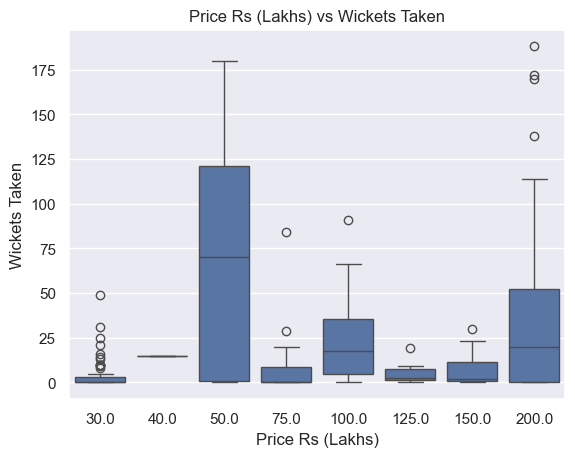

In [122]:
# Bi-variate visualization of Price Rs (Lakhs) vs wickets taken
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['Wickets_Taken'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs Wickets Taken')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Wickets Taken')

# Show plot
plt.show()

In [123]:
# Group by the Price Rs (Lakhs) and describe the bowling average
grouped_stats = new.groupby('Price Rs (Lakhs)')['Bowling_Average'].describe()
print(grouped_stats)

                  count       mean        std      min        25%        50%  \
Price Rs (Lakhs)                                                               
30.0               67.0   9.279447  14.467799   0.0000   0.000000   0.000000   
40.0                1.0  60.692500        NaN  60.6925  60.692500  60.692500   
50.0                5.0  16.928766  12.988539   0.0000   6.714286  20.924545   
75.0               20.0  14.556983  17.699190   0.0000   0.000000   2.000000   
100.0               8.0  31.906643  23.480402   0.0000  17.826964  35.578929   
125.0               6.0  24.654167  16.232482   0.0000  15.646250  26.042500   
150.0              11.0  16.780061  14.042707   0.0000   3.489583  16.335000   
200.0              58.0  20.620131  15.790490   0.0000   0.000000  23.327857   

                        75%        max  
Price Rs (Lakhs)                        
30.0              18.900000  51.095000  
40.0              60.692500  60.692500  
50.0              28.400000  28.605

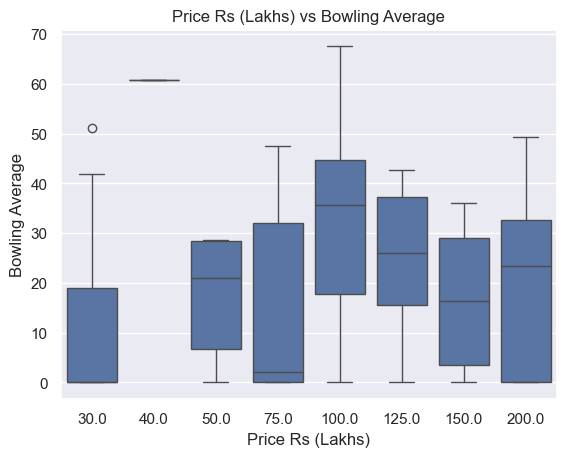

In [124]:
# Bi-variate visualization of Price Rs (Lakhs) vs bowling average
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['Bowling_Average'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs Bowling Average')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Bowling Average')

# Show plot
plt.show()

In [125]:
# Group by the Price Rs (Lakhs) and describe the economy rate
grouped_stats = new.groupby('Price Rs (Lakhs)')['Economy_Rate'].describe()
print(grouped_stats)

                  count       mean       std     min        25%        50%  \
Price Rs (Lakhs)                                                             
30.0               67.0   3.721850  4.562453   0.000   0.000000   0.000000   
40.0                1.0  10.815000       NaN  10.815  10.815000  10.815000   
50.0                5.0   6.018094  3.732421   0.000   4.744286   8.230000   
75.0               20.0   5.385193  4.526890   0.000   0.000000   7.500000   
100.0               8.0   7.265714  4.613522   0.000   5.961429   9.066571   
125.0               6.0   7.536667  3.893742   0.000   7.245000   9.275000   
150.0              11.0   6.003919  4.496179   0.000   2.313750   6.291111   
200.0              58.0   6.172799  3.839212   0.000   1.127778   7.986667   

                        75%        max  
Price Rs (Lakhs)                        
30.0               8.248333  13.410000  
40.0              10.815000  10.815000  
50.0               8.348182   8.768000  
75.0          

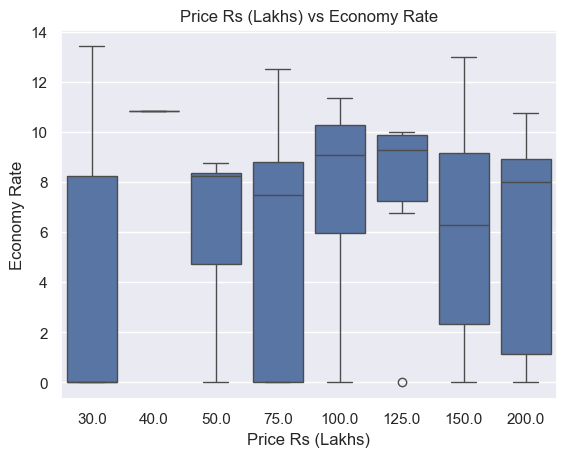

In [126]:
# Bi-variate visualization of Price Rs (Lakhs) vs economy rate
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['Economy_Rate'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs Economy Rate')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Economy Rate')

# Show plot
plt.show()

In [127]:
# Group by the Price Rs (Lakhs) and describe the bowling strike rate
grouped_stats = new.groupby('Price Rs (Lakhs)')['Bowling_Strike_Rate'].describe()
print(grouped_stats)

                  count       mean        std    min        25%        50%  \
Price Rs (Lakhs)                                                             
30.0               67.0   6.344399   9.995047   0.00   0.000000   0.000000   
40.0                1.0  32.860000        NaN  32.86  32.860000  32.860000   
50.0                5.0  12.012016   8.839135   0.00   6.000000  14.205455   
75.0               20.0  10.072964  12.371979   0.00   0.000000   0.750000   
100.0               8.0  20.255964  15.349767   0.00  12.090000  23.742857   
125.0               6.0  16.456250  10.166523   0.00  12.851875  16.703750   
150.0              11.0  11.209399   9.518483   0.00   2.571944   9.000000   
200.0              58.0  14.149874  10.550655   0.00   0.000000  16.775893   

                        75%        max  
Price Rs (Lakhs)                        
30.0              11.850000  36.806667  
40.0              32.860000  32.860000  
50.0              18.934000  20.920625  
75.0          

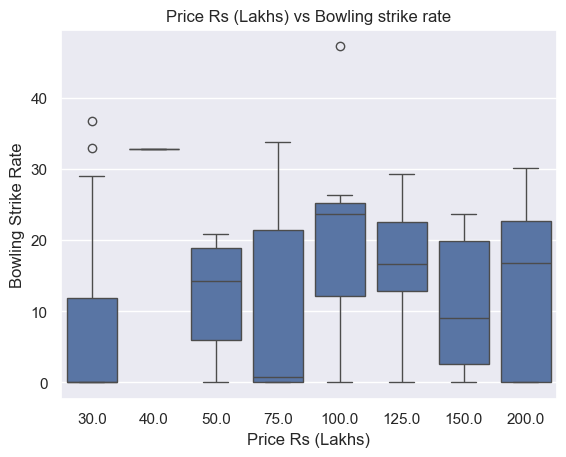

In [128]:
# Bi-variate visualization of Price Rs (Lakhs) vs bowling strike rate
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['Bowling_Strike_Rate'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs Bowling strike rate')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Bowling Strike Rate')

# Show plot
plt.show()

In [129]:
# Group by the Price Rs (Lakhs) and describe the Four_Wicket_Hauls
grouped_stats = new.groupby('Price Rs (Lakhs)')['Four_Wicket_Hauls'].describe()
print(grouped_stats)

                  count      mean       std  min  25%  50%  75%  max
Price Rs (Lakhs)                                                    
30.0               67.0  0.104478  0.353953  0.0  0.0  0.0  0.0  2.0
40.0                1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
50.0                5.0  1.400000  1.341641  0.0  0.0  2.0  2.0  3.0
75.0               20.0  0.150000  0.366348  0.0  0.0  0.0  0.0  1.0
100.0               8.0  0.125000  0.353553  0.0  0.0  0.0  0.0  1.0
125.0               6.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
150.0              11.0  0.181818  0.404520  0.0  0.0  0.0  0.0  1.0
200.0              58.0  0.689655  1.245439  0.0  0.0  0.0  1.0  6.0


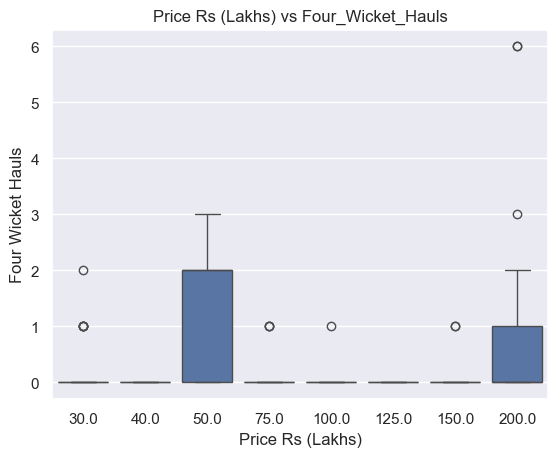

In [130]:
# Bi-variate visualization of Price Rs (Lakhs) vs Four Wicket Hauls
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['Four_Wicket_Hauls'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs Four_Wicket_Hauls')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Four Wicket Hauls')

# Show plot
plt.show()

In [131]:
# Group by the Price Rs (Lakhs) and describe the Five_Wicket_Hauls
grouped_stats = new.groupby('Price Rs (Lakhs)')['Five_Wicket_Hauls'].describe()
print(grouped_stats)

                  count      mean       std  min  25%  50%  75%  max
Price Rs (Lakhs)                                                    
30.0               67.0  0.014925  0.122169  0.0  0.0  0.0  0.0  1.0
40.0                1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
50.0                5.0  0.200000  0.447214  0.0  0.0  0.0  0.0  1.0
75.0               20.0  0.100000  0.307794  0.0  0.0  0.0  0.0  1.0
100.0               8.0  0.250000  0.707107  0.0  0.0  0.0  0.0  2.0
125.0               6.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
150.0              11.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
200.0              58.0  0.137931  0.395069  0.0  0.0  0.0  0.0  2.0


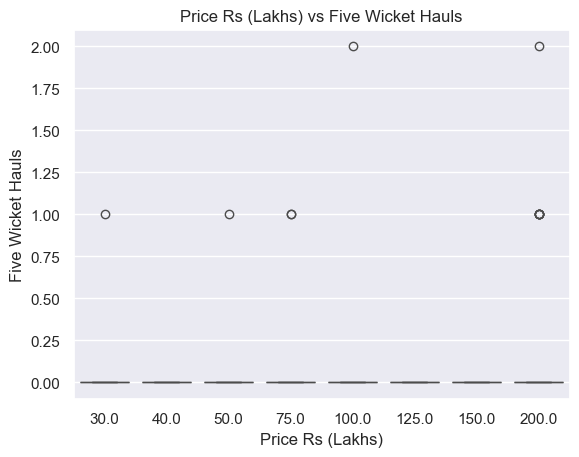

In [132]:
# Bi-variate visualization of Price Rs (Lakhs) vs Five Wicket Hauls
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['Five_Wicket_Hauls'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs Five Wicket Hauls')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Five Wicket Hauls')

# Show plot
plt.show()

In [133]:
# Group by the Price Rs (Lakhs) and describe the Captaincy %
grouped_stats = new.groupby('Price Rs (Lakhs)')['Captaincy %'].describe()
print(grouped_stats)

                  count      mean        std  min  25%  50%   75%    max
Price Rs (Lakhs)                                                        
30.0               67.0  0.000000   0.000000  0.0  0.0  0.0  0.00   0.00
40.0                1.0  0.000000        NaN  0.0  0.0  0.0  0.00   0.00
50.0                5.0  0.000000   0.000000  0.0  0.0  0.0  0.00   0.00
75.0               20.0  0.000000   0.000000  0.0  0.0  0.0  0.00   0.00
100.0               8.0  0.000000   0.000000  0.0  0.0  0.0  0.00   0.00
125.0               6.0  0.000000   0.000000  0.0  0.0  0.0  0.00   0.00
150.0              11.0  8.682727  16.063595  0.0  0.0  0.0  8.33  42.85
200.0              58.0  6.297069  16.465944  0.0  0.0  0.0  0.00  60.00


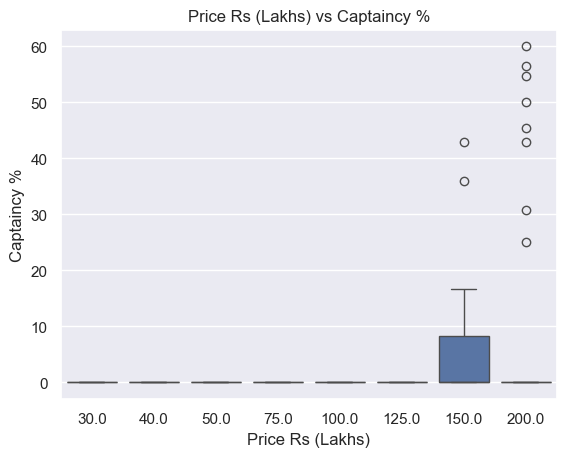

In [134]:
# Bi-variate visualization of Price Rs (Lakhs) vs Captaincy %
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['Captaincy %'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs Captaincy %')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Captaincy %')

# Show plot
plt.show()

In [135]:
# Group by the Price Rs (Lakhs) and describe the catches taken
grouped_stats = new.groupby('Price Rs (Lakhs)')['Catches_Taken'].describe()
print(grouped_stats)

                  count       mean        std  min   25%   50%    75%   max
Price Rs (Lakhs)                                                           
30.0               67.0   2.432836   5.069887  0.0  0.00   0.0   1.50  26.0
40.0                1.0   3.000000        NaN  3.0  3.00   3.0   3.00   3.0
50.0                5.0  17.000000  15.890249  0.0  7.00  14.0  23.00  41.0
75.0               20.0  11.300000  20.921155  0.0  0.00   3.0   8.25  82.0
100.0               8.0  13.500000   9.739463  0.0  3.75  17.0  20.25  26.0
125.0               6.0   2.833333   3.544949  0.0  0.25   1.5   4.25   9.0
150.0              11.0  19.727273  26.088660  0.0  3.50  10.0  20.00  71.0
200.0              58.0  18.603448  18.332159  0.0  4.25  12.5  25.75  79.0


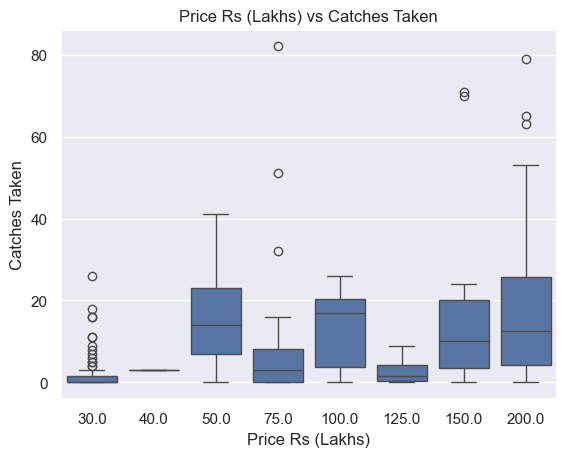

In [136]:
# Bi-variate visualization of Price Rs (Lakhs) vs catches taken
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['Catches_Taken'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs Catches Taken')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Catches Taken')

# Show plot
plt.show()

In [137]:
# Group by the Price Rs (Lakhs) and describe the stumpings
grouped_stats = new.groupby('Price Rs (Lakhs)')['Stumpings'].describe()
print(grouped_stats)

                  count      mean       std  min  25%  50%  75%   max
Price Rs (Lakhs)                                                     
30.0               67.0  0.029851  0.244339  0.0  0.0  0.0  0.0   2.0
40.0                1.0  0.000000       NaN  0.0  0.0  0.0  0.0   0.0
50.0                5.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
75.0               20.0  0.050000  0.223607  0.0  0.0  0.0  0.0   1.0
100.0               8.0  0.500000  1.414214  0.0  0.0  0.0  0.0   4.0
125.0               6.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
150.0              11.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
200.0              58.0  0.586207  2.675650  0.0  0.0  0.0  0.0  19.0


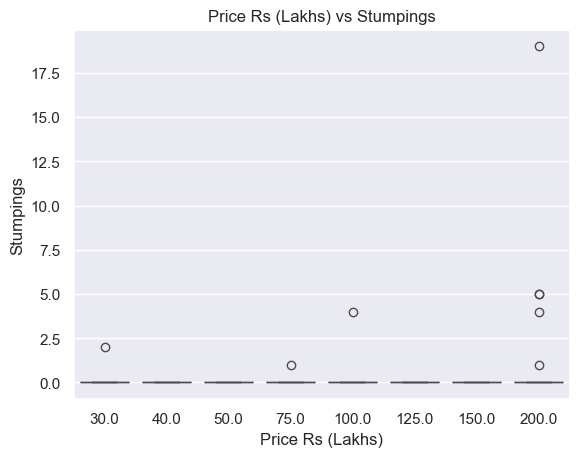

In [138]:
# Bi-variate visualization of Price Rs (Lakhs) vs Stumpings
sns.boxplot(x=new['Price Rs (Lakhs)'], y=new['Stumpings'])

# Add titles and labels
plt.title('Price Rs (Lakhs) vs Stumpings')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Stumpings')

# Show plot
plt.show()

# (iv) Bivariate analysis for categorical variables

In [139]:
# Create a contingency table - Name
contingency_table = pd.crosstab(new['Name'], new['Price Rs (Lakhs)'])

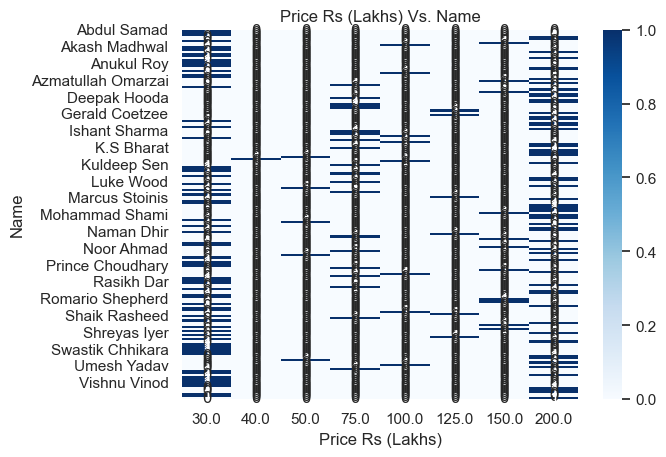

In [140]:
# Heatmap
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Price Rs (Lakhs) Vs. Name')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Name')
plt.tick_params(axis='x', rotation=0)
plt.tick_params(axis='y', rotation=0)
plt.show()

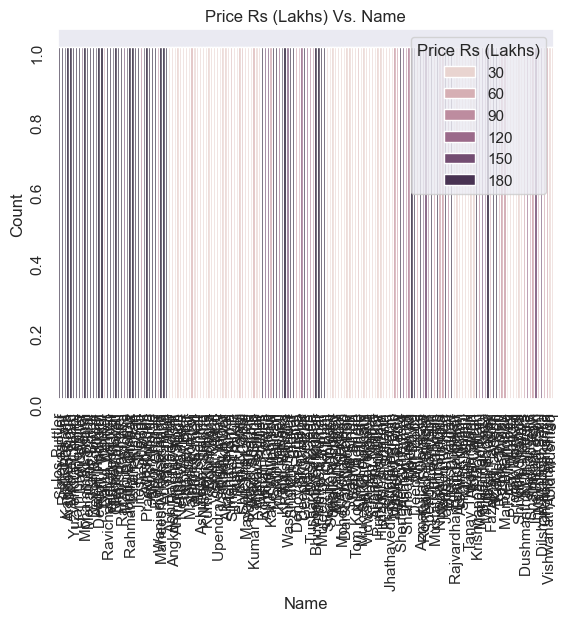

In [141]:
# Count plot
sns.countplot(data=new, x='Name', hue='Price Rs (Lakhs)')
plt.title('Price Rs (Lakhs) Vs. Name')
plt.xlabel('Name')
plt.ylabel("Count")
plt.legend(title='Price Rs (Lakhs)', loc='upper right')
plt.tick_params(axis='x', rotation=90)
plt.tick_params(axis='y', rotation=90)
# Adjust layout
plt.show()

In [142]:
# Create a contingency table - Country
contingency_table = pd.crosstab(new['Country'], new['Price Rs (Lakhs)'])

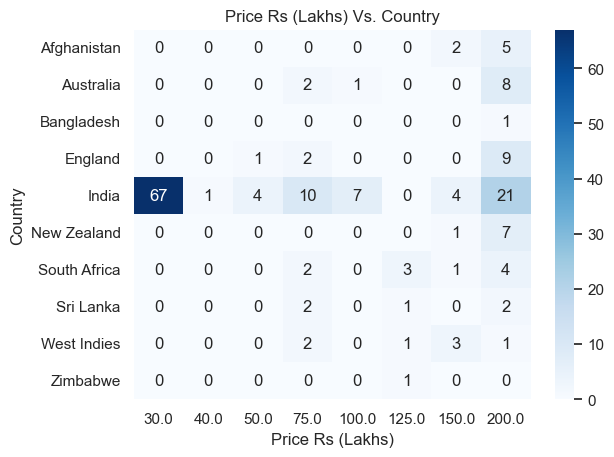

In [143]:
# Heatmap
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Price Rs (Lakhs) Vs. Country')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Country')
plt.tick_params(axis='x', rotation=0)
plt.tick_params(axis='y', rotation=0)
plt.show()

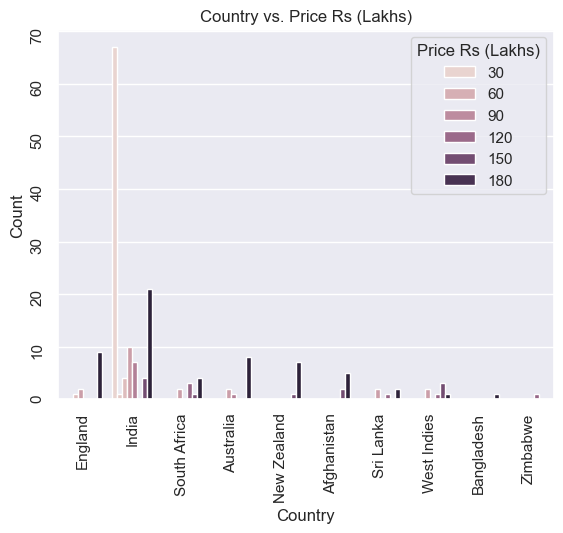

In [144]:
# Count plot
sns.countplot(data=new, x='Country', hue='Price Rs (Lakhs)')
plt.title('Country vs. Price Rs (Lakhs)')
plt.xlabel("Country")
plt.ylabel("Count")
plt.legend(title='Price Rs (Lakhs)', loc='upper right')
plt.tick_params(axis='x', rotation=90)
plt.tick_params(axis='y', rotation=90)
# Adjust layout
plt.show()

In [145]:
# Create a contingency table - Specialism
contingency_table = pd.crosstab(new['Specialism'], new['Price Rs (Lakhs)'])

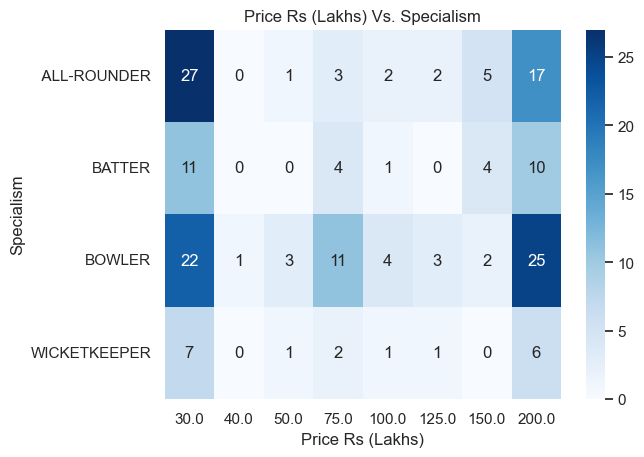

In [146]:
# Heatmap
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Price Rs (Lakhs) Vs. Specialism')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Specialism')
plt.tick_params(axis='x', rotation=0)
plt.tick_params(axis='y', rotation=0)
plt.show()

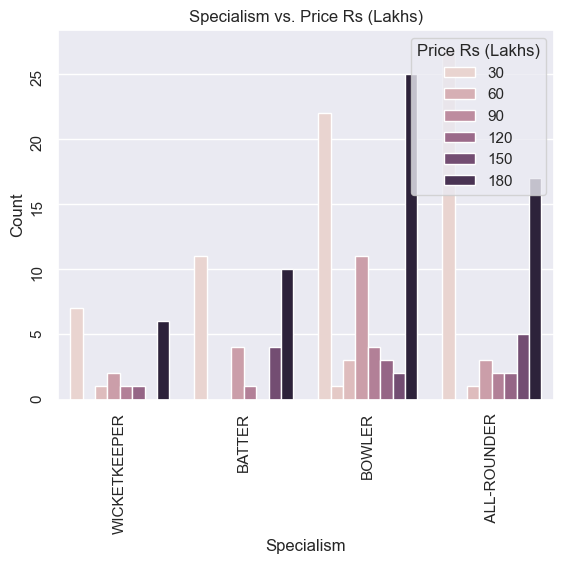

In [147]:
# Count plot
sns.countplot(data=new, x='Specialism', hue='Price Rs (Lakhs)')
plt.title('Specialism vs. Price Rs (Lakhs)')
plt.xlabel('Specialism')
plt.ylabel("Count")
plt.legend(title='Price Rs (Lakhs)', loc='upper right')
plt.tick_params(axis='x', rotation=90)
plt.tick_params(axis='y', rotation=90)
# Adjust layout
plt.show()

In [148]:
# Create a contingency table - Batting Style
contingency_table = pd.crosstab(new['Batting Style'], new['Price Rs (Lakhs)'])

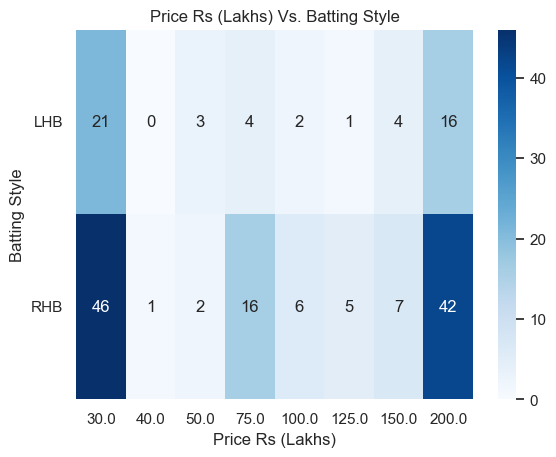

In [149]:
# Heatmap
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Price Rs (Lakhs) Vs. Batting Style')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Batting Style')
plt.tick_params(axis='x', rotation=0)
plt.tick_params(axis='y', rotation=0)
plt.show()

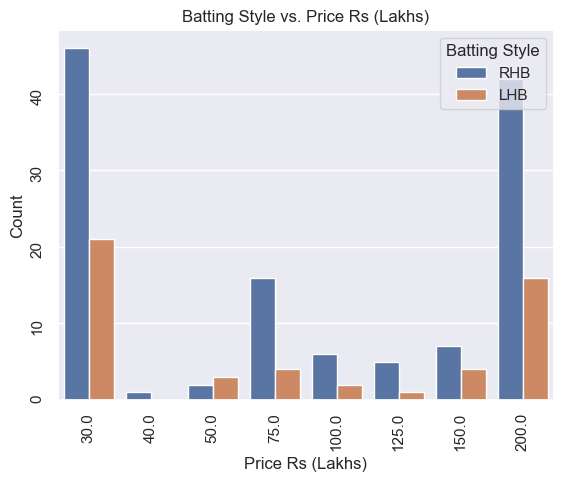

In [150]:
# Count plot
sns.countplot(data=new, x='Price Rs (Lakhs)', hue='Batting Style')
plt.title('Batting Style vs. Price Rs (Lakhs)')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel("Count")
plt.legend(title='Batting Style', loc='upper right')
plt.tick_params(axis='x', rotation=90)
plt.tick_params(axis='y', rotation=90)
# Adjust layout
plt.show()

In [151]:
# Create a contingency table - Bowling Style
contingency_table = pd.crosstab(new['Bowling Style'], new['Price Rs (Lakhs)'])

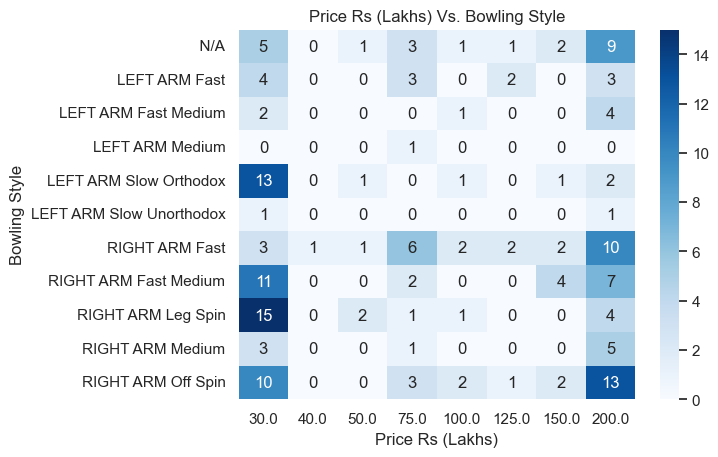

In [152]:
# Heatmap
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Price Rs (Lakhs) Vs. Bowling Style')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Bowling Style')
plt.tick_params(axis='x', rotation=0)
plt.tick_params(axis='y', rotation=0)
plt.show()

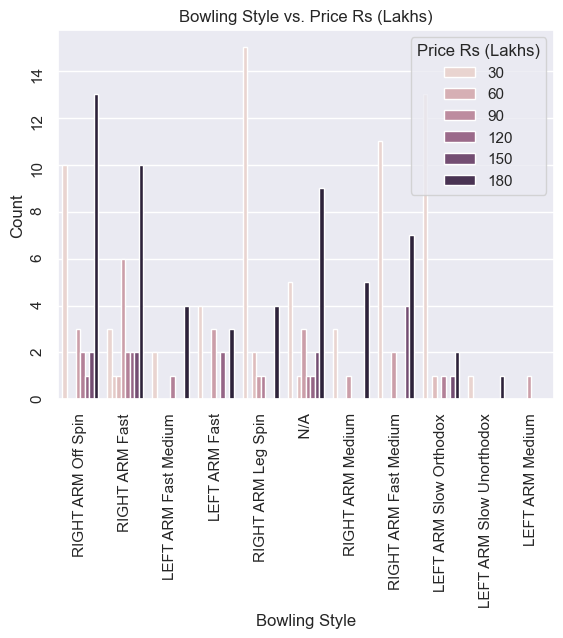

In [153]:
# Count plot
sns.countplot(data=new, x='Bowling Style', hue='Price Rs (Lakhs)')
plt.title('Bowling Style vs. Price Rs (Lakhs)')
plt.xlabel('Bowling Style')
plt.ylabel("Count")
plt.legend(title='Price Rs (Lakhs)', loc='upper right')
plt.tick_params(axis='x', rotation=90)
plt.tick_params(axis='y', rotation=90)
# Adjust layout
plt.show()

In [154]:
# Create a contingency table - Previous IPLTeam(s)
contingency_table = pd.crosstab(new['Previous IPLTeam(s)'], new['Price Rs (Lakhs)'])

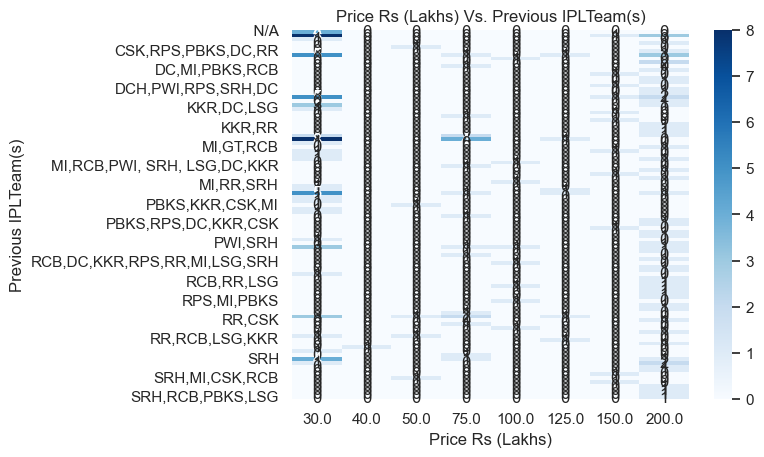

In [155]:
# Heatmap
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Price Rs (Lakhs) Vs. Previous IPLTeam(s)')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Previous IPLTeam(s)')
plt.tick_params(axis='x', rotation=0)
plt.tick_params(axis='y', rotation=0)
plt.show()

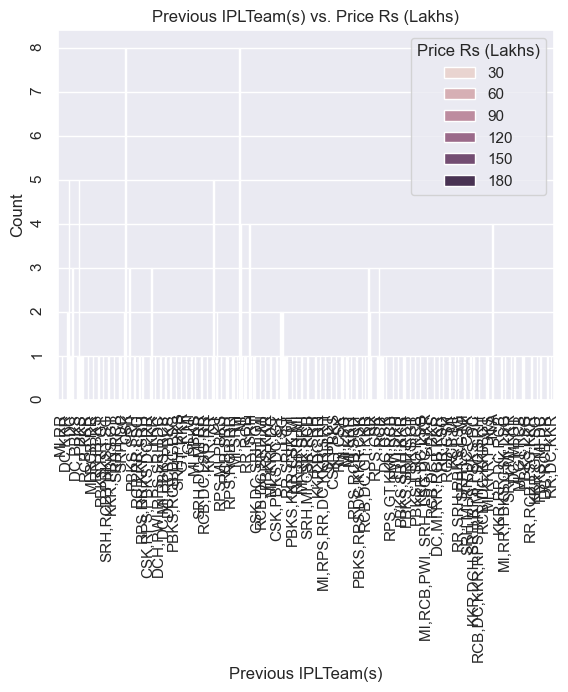

In [156]:
# Count plot
sns.countplot(data=new, x='Previous IPLTeam(s)', hue='Price Rs (Lakhs)')
plt.title('Previous IPLTeam(s) vs. Price Rs (Lakhs)')
plt.xlabel('Previous IPLTeam(s)')
plt.ylabel("Count")
plt.legend(title='Price Rs (Lakhs)', loc='upper right')
plt.tick_params(axis='x', rotation=90)
plt.tick_params(axis='y', rotation=90)
# Adjust layout
plt.show()

In [157]:
# Create a contingency table - Team 2024
contingency_table = pd.crosstab(new['Team 2024'], new['Price Rs (Lakhs)'])

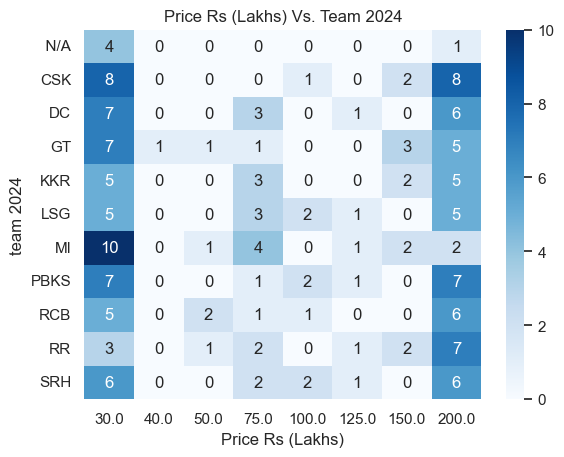

In [158]:
# Heatmap
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Price Rs (Lakhs) Vs. Team 2024')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('team 2024')
plt.tick_params(axis='x', rotation=0)
plt.tick_params(axis='y', rotation=0)
plt.show()

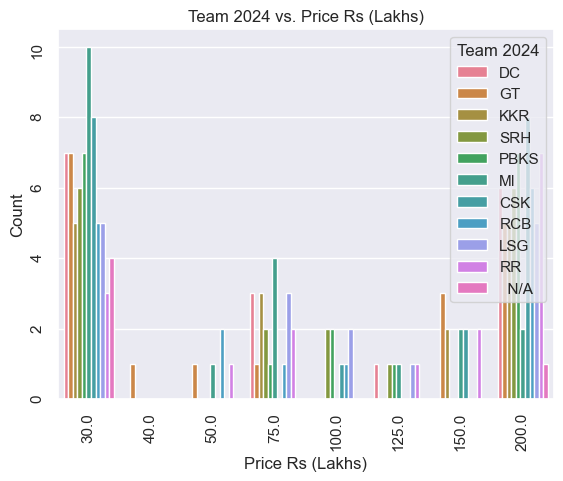

In [159]:
# Count plot
sns.countplot(data=new, x='Price Rs (Lakhs)', hue='Team 2024')
plt.title('Team 2024 vs. Price Rs (Lakhs)')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel("Count")
plt.legend(title='Team 2024', loc='upper right')
plt.tick_params(axis='x', rotation=90)
plt.tick_params(axis='y', rotation=90)
# Adjust layout
plt.show()

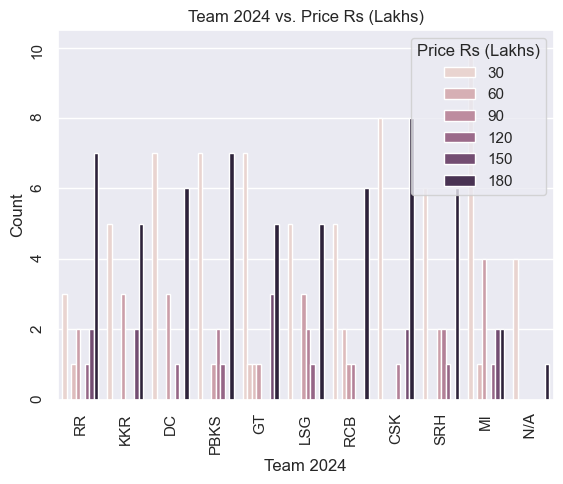

In [160]:
# Count plot
sns.countplot(data=new, x='Team 2024', hue='Price Rs (Lakhs)')
plt.title('Team 2024 vs. Price Rs (Lakhs)')
plt.xlabel('Team 2024')
plt.ylabel("Count")
plt.legend(title='Price Rs (Lakhs)', loc='upper right')
plt.tick_params(axis='x', rotation=90)
plt.tick_params(axis='y', rotation=90)
# Adjust layout
plt.show()

In [161]:
# Create a contingency table - C/U/A
contingency_table = pd.crosstab(new['C/U/A'], new['Price Rs (Lakhs)'])

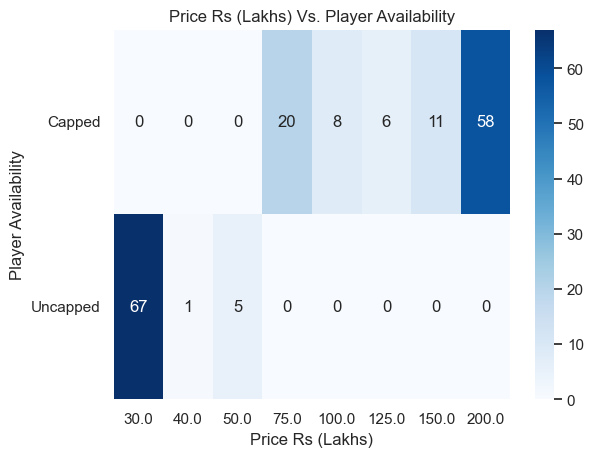

In [162]:
# Heatmap
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Price Rs (Lakhs) Vs. Player Availability')
plt.xlabel('Price Rs (Lakhs)')
plt.ylabel('Player Availability')
plt.tick_params(axis='x', rotation=0)
plt.tick_params(axis='y', rotation=0)
plt.show()

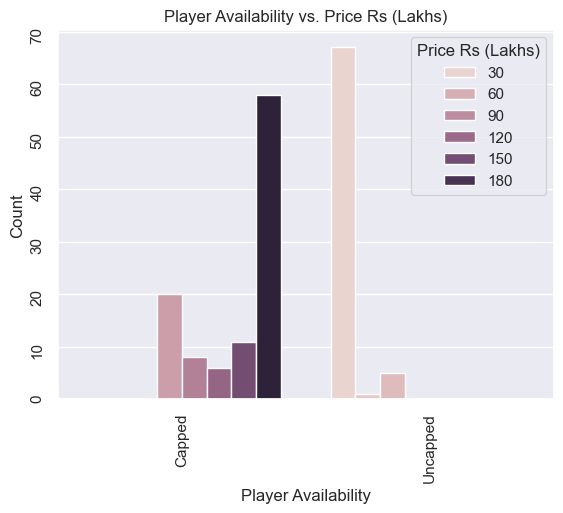

In [163]:
# Count plot
sns.countplot(data=new, x='C/U/A', hue='Price Rs (Lakhs)')
plt.title('Player Availability vs. Price Rs (Lakhs)')
plt.xlabel('Player Availability')
plt.ylabel("Count")
plt.legend(title='Price Rs (Lakhs)', loc='upper right')
plt.tick_params(axis='x', rotation=90)
plt.tick_params(axis='y', rotation=90)
# Adjust layout
plt.show()

# (v) Chi-square tests to understand Association between categorical variables and target variable Price Rs (Lakhs)
The Chi-square test of independence is used to determine if there is a significant association between two categorical variables. When applied to understand the association between categorical variables and a target variable (like Price Rs (Lakhs)), it helps answer whether the distribution of Price Rs (Lakhs) is different across the categories of another variable (e.g., Specialism, Country, etc.).

In [164]:
from scipy.stats import chi2_contingency

In [165]:
# Create a contingency table, passing a single column for the index at a time
chi2_results = []
for col in ['Name', 'Country', 'Specialism',
    'Batting Style', 'Bowling Style', 'Previous IPLTeam(s)',
    'Team 2024',
    'C/U/A']:
    contingency_table = pd.crosstab(new[col], new['Price Rs (Lakhs)'])

    # Perform the Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append((col, chi2, p, dof))

In [166]:
# Print results
for col, chi2, p, dof in chi2_results:
    print(f"Feature: {col}")
    print("Chi-square statistic:", chi2)
    print("P-value:", p)
    print("Degrees of freedom:", dof)
    print("\n")

    # Interpretation of the results
    alpha = 0.05  # significance level
    if p < alpha:
        print(f"There is a significant association between {col} and 'Price Rs (Lakhs)' (reject null hypothesis).")
    else:
        print(f"There is no significant association between {col} and 'Price Rs (Lakhs)' (fail to reject null hypothesis).")

Feature: Name
Chi-square statistic: 1232.0
P-value: 0.4385621440430739
Degrees of freedom: 1225


There is no significant association between Name and 'Price Rs (Lakhs)' (fail to reject null hypothesis).
Feature: Country
Chi-square statistic: 169.1548319073546
P-value: 1.1806800926146235e-11
Degrees of freedom: 63


There is a significant association between Country and 'Price Rs (Lakhs)' (reject null hypothesis).
Feature: Specialism
Chi-square statistic: 16.39587127570597
P-value: 0.7470124475912265
Degrees of freedom: 21


There is no significant association between Specialism and 'Price Rs (Lakhs)' (fail to reject null hypothesis).
Feature: Batting Style
Chi-square statistic: 4.561055342624269
P-value: 0.7133532560029596
Degrees of freedom: 7


There is no significant association between Batting Style and 'Price Rs (Lakhs)' (fail to reject null hypothesis).
Feature: Bowling Style
Chi-square statistic: 77.31283399682643
P-value: 0.25666663254560357
Degrees of freedom: 70


There is n

In [167]:
# Adding value per run feature
new['value_per_run'] = new['Past Price (Crores)'] / (new['Runs_Scored'])  # Avoid division by zero

# Adding leadership impact score
new['leadership_impact'] = new['Captaincy %'] / new['Matches_Batted']

# Inspect the new columns
new[['Name', 'value_per_run', 'leadership_impact']].head(200)

Name  value_per_run  leadership_impact
0                Jos Buttler       0.003401           0.000000
1               Shreyas Iyer       0.005403           0.554118
2               Rishabh Pant       0.004552           0.552020
3              Kagiso Rabada       0.059140           0.000000
4             Arshdeep Singh       0.560000           0.000000
..                       ...            ...                ...
171            Navdeep Saini       0.000000           0.000000
173       Dilshan Madushanka            NaN                NaN
174          Chetan Sakariya       0.000000           0.000000
176  Vishwanath Pratap Singh            NaN                NaN
177             Abid Mushtaq            NaN                NaN

[176 rows x 3 columns]

In [168]:
# Find the top 10 players based on runs scored
top_runs_scorers = new[['Name', 'Runs_Scored', 'Age']].sort_values(by='Runs_Scored', ascending=False).head(10)

# Find the top 10 players based on wickets taken
top_wicket_takers = new[['Name', 'Wickets_Taken','Age']].sort_values(by='Wickets_Taken', ascending=False).head(10)

# Display the results
print("Top 10 Players Based on Runs Scored:")
print(top_runs_scorers)

print("\nTop 10 Players Based on Wickets Taken:")
print(top_wicket_takers)

Top 10 Players Based on Runs Scored:
               Name  Runs_Scored   Age
17     David Warner         6426  38.0
74   Ajinkya Rahane         4439  36.0
9          KL Rahul         4221  32.0
120   Manish Pandey         3808  35.0
0       Jos Buttler         3234  34.0
2      Rishabh Pant         2856  27.0
1      Shreyas Iyer         2776  30.0
8      David Miller         2726  35.0
21    Glenn Maxwell         2722  36.0
81      Nitish Rana         2603  31.0

Top 10 Players Based on Wickets Taken:
                    Name  Wickets_Taken   Age
6       Yuzvendra Chahal            188  34.0
65         Piyush Chawla            180  36.0
18   Ravichandran Ashwin            172  38.0
92     Bhuvneshwar Kumar            170  35.0
139          Umesh Yadav            138  37.0
61          Mohit Sharma            121  36.0
22         Harshal Patel            114  34.0
3          Kagiso Rabada            109  29.0
30           Trent Boult            107  35.0
138       Jaydev Unadkat          

In [169]:
def categorize_performance(row):
    """
    Categorizes players into performance tiers based on their statistics.
    
    Parameters:
    row (pd.Series): A row from the DataFrame containing player statistics.
    
    Returns:
    str: The performance tier of the player.
    """
    if row['Runs_Scored'] >= 5000 and row['Half_Centuries'] >= 20:
        return 'Legend'
    elif row['Runs_Scored'] >= 2000 and row['Half_Centuries'] >= 10:
        return 'Star'
    elif row['Runs_Scored'] >= 500 and row['Half_Centuries'] >= 5:
        return 'Promising'
    else:
        return 'Emerging'

# Assuming the DataFrame is named 'merged_data'
new['performance_tier'] = new.apply(categorize_performance, axis=1)

# Display the updated DataFrame with performance tiers
print(new[['Name', 'Runs_Scored', 'Half_Centuries', 'performance_tier']])

                        Name  Runs_Scored  Half_Centuries performance_tier
0                Jos Buttler         3234              19             Star
1               Shreyas Iyer         2776              19             Star
2               Rishabh Pant         2856              15             Star
3              Kagiso Rabada          186               0         Emerging
4             Arshdeep Singh           25               0         Emerging
..                       ...          ...             ...              ...
171            Navdeep Saini           33               0         Emerging
173       Dilshan Madushanka            0               0         Emerging
174          Chetan Sakariya           20               0         Emerging
176  Vishwanath Pratap Singh            0               0         Emerging
177             Abid Mushtaq            0               0         Emerging

[176 rows x 4 columns]


In [170]:
def categorize_performance(row):
    """
    Categorizes players into performance tiers based on their statistics.
    
    Parameters:
    row (pd.Series): A row from the DataFrame containing player statistics.
    
    Returns:
    str: The performance tier of the player.
    """
    if row['Wickets_Taken'] >= 150 and row['Four_Wicket_Hauls'] >= 10:
        return 'Legend'
    elif row['Wickets_Taken'] >= 100 and row['Four_Wicket_Hauls'] >= 5:
        return 'Star'
    elif row['Wickets_Taken'] >= 50 and row['Four_Wicket_Hauls'] >= 3:
        return 'Promising'
    else:
        return 'Emerging'

# Assuming the DataFrame is named 'merged_data'
new['performance_tier'] = new.apply(categorize_performance, axis=1)

# Display the updated DataFrame with performance tiers
print(new[['Name', 'Wickets_Taken', 'Four_Wicket_Hauls', 'performance_tier']])

                        Name  Wickets_Taken  Four_Wicket_Hauls  \
0                Jos Buttler              0                  0   
1               Shreyas Iyer              0                  0   
2               Rishabh Pant              0                  0   
3              Kagiso Rabada            109                  6   
4             Arshdeep Singh             59                  1   
..                       ...            ...                ...   
171            Navdeep Saini             23                  0   
173       Dilshan Madushanka              0                  0   
174          Chetan Sakariya             20                  0   
176  Vishwanath Pratap Singh              0                  0   
177             Abid Mushtaq              0                  0   

    performance_tier  
0           Emerging  
1           Emerging  
2           Emerging  
3               Star  
4           Emerging  
..               ...  
171         Emerging  
173         Emerging  


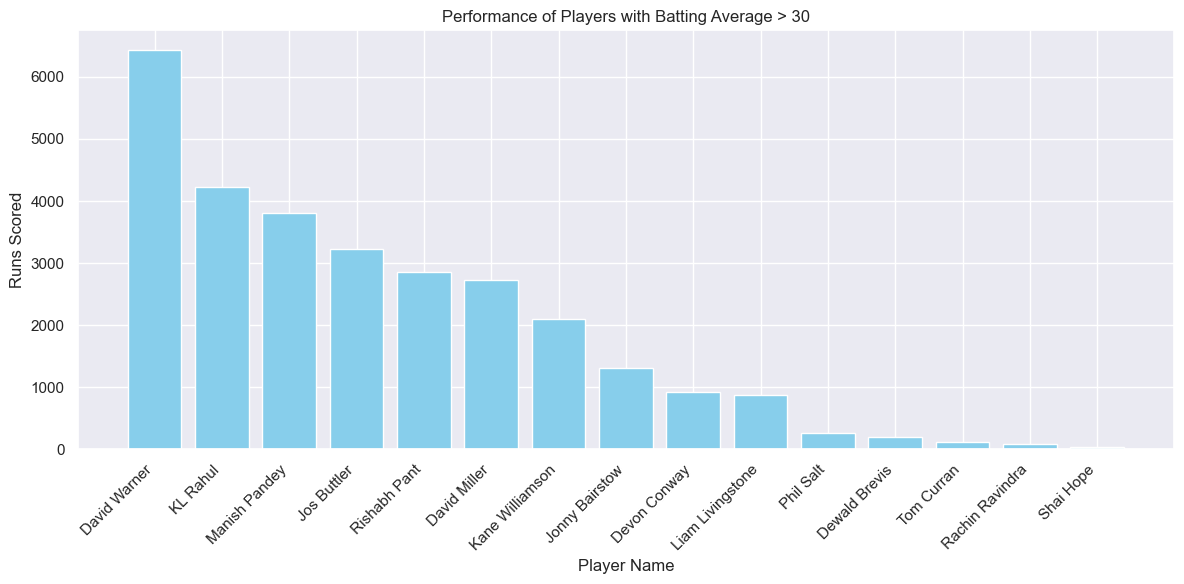

In [171]:
high_average_players = new[new['Batting_Average'] > 30]

# Sort the players by runs scored for better visualization
high_average_players = high_average_players.sort_values(by='Runs_Scored', ascending=False)

# Plotting the performance
plt.figure(figsize=(12, 6))
plt.bar(high_average_players['Name'], high_average_players['Runs_Scored'], color='skyblue')
plt.xlabel('Player Name')
plt.ylabel('Runs Scored')
plt.title('Performance of Players with Batting Average > 30')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

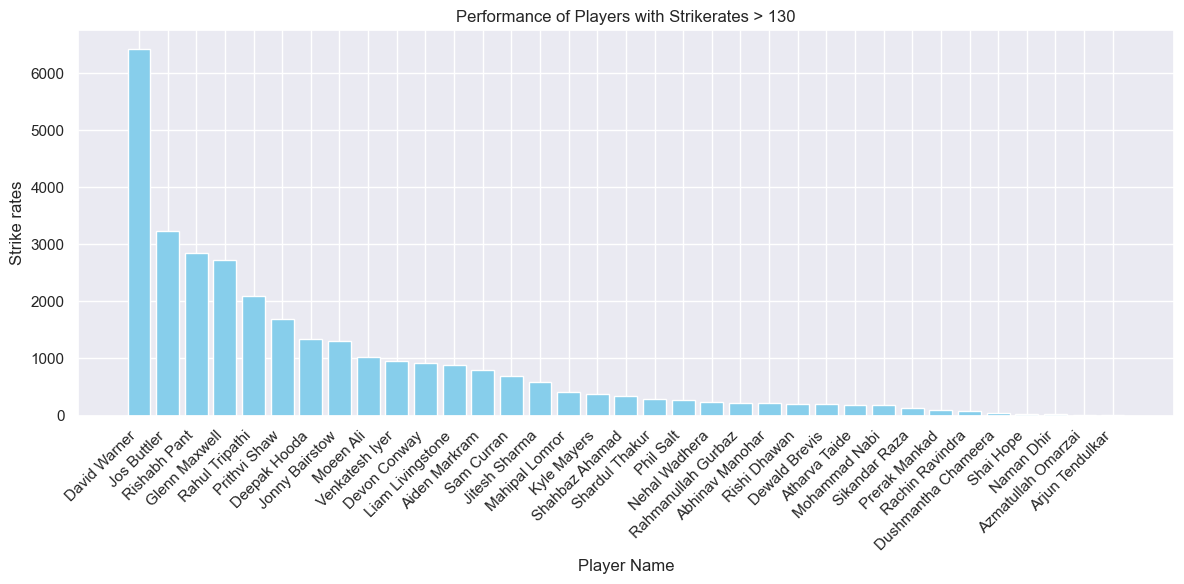

In [172]:
# Filter the dataset for players with a strike rates greater than 130
high_strikerate_players = new[new['Batting_Strike_Rate'] > 130]

# Sort the players by runs scored for better visualization
high_strikerate_players = high_strikerate_players.sort_values(by='Runs_Scored', ascending=False)

# Plotting the performance
plt.figure(figsize=(12, 6))
plt.bar(high_strikerate_players['Name'], high_strikerate_players['Runs_Scored'], color='skyblue')
plt.xlabel('Player Name')
plt.ylabel('Strike rates')
plt.title('Performance of Players with Strikerates > 130')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

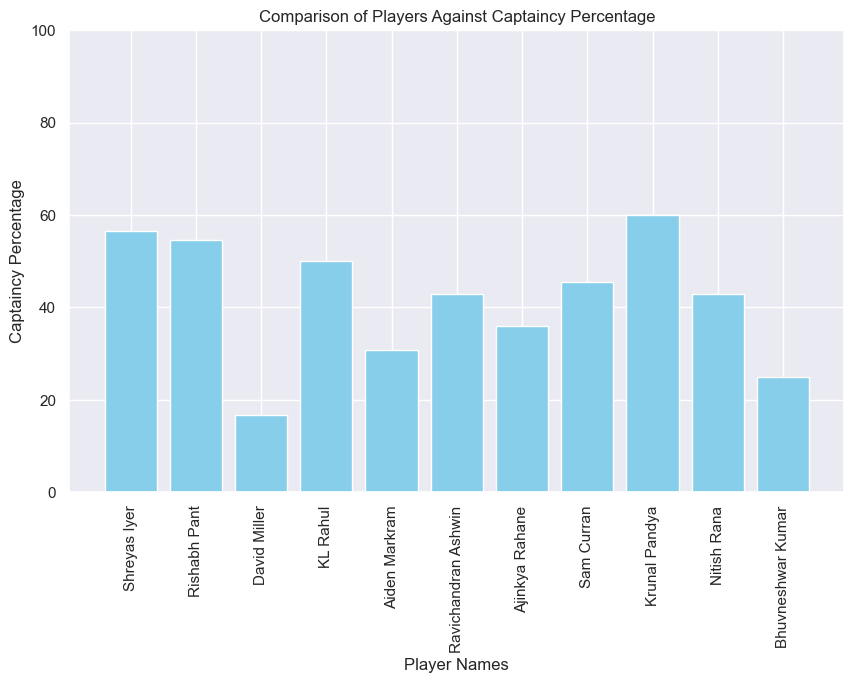

In [173]:
new_df= new[new['Captaincy %'] > 0]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for filtered players
plt.bar(new_df['Name'], new_df['Captaincy %'], color='skyblue')

# Add labels and title
plt.xlabel('Player Names')
plt.ylabel('Captaincy Percentage')
plt.title('Comparison of Players Against Captaincy Percentage')
plt.xticks(rotation=90)  # Rotate player names for better visibility

# Set the y-axis limits to zoom in (adjust these values as needed)
plt.ylim(0, 100)  # Assuming percentage ranges from 0 to 100

# Show the plot
plt.show()

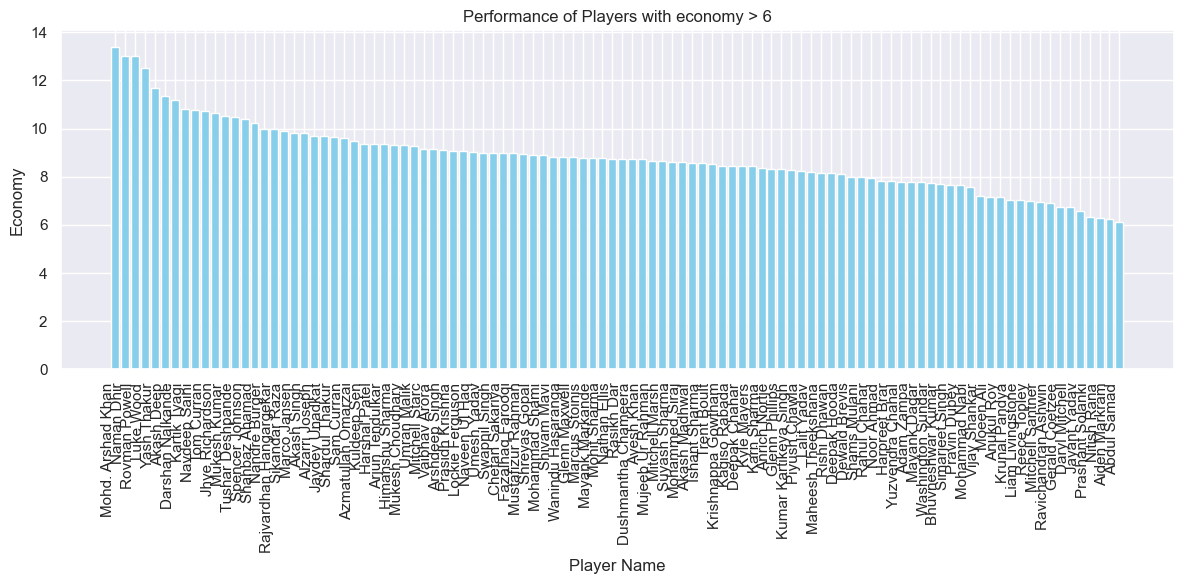

In [174]:
# Filter the dataset for players with an economy greater than 6
economy_rate_players = new[new['Economy_Rate'] > 6]

# Sort the players by runs scored for better visualization
economy_rate_players = economy_rate_players.sort_values(by='Economy_Rate', ascending=False)

# Plotting the performance
plt.figure(figsize=(12, 6))
plt.bar(economy_rate_players['Name'], economy_rate_players['Economy_Rate'], color='skyblue')
plt.xlabel('Player Name')
plt.ylabel('Economy')
plt.title('Performance of Players with economy > 6')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# 7. Data Transformation and Preprocessing
Based on the Exploration of the data along with descriptive statistics we generate, here are the final preprocessing steps we need to do before preparing predictive models. The change will be applied to both training and test sets, based on understanding of Training data we have now from EDA.

The key idea is to use the insights from EDA to define a cleaning and transformation pipeline that can be applied to both the training and test sets. This avoids data leakage and ensures that both sets undergo the same preprocessing steps.

# 7.1 Data wrangling for categorical variables
Here we will first do Cardinality reduction which involves reducing the number of unique values in categorical variables. High cardinality can lead to problems in machine learning models, such as overfitting, high memory usage, and increased computational time.

We will do it for selected few categorical variables depending on the distribution and value count of number of occurrences of each category.

# 7.2 Creation of Dummy Variables
Using One-Hot Encoder to create Dummy Variables to handle Categorical variables

In [175]:
from sklearn.preprocessing import OneHotEncoder

# Separate the target and predictors again
ytrain = new["Price Rs (Lakhs)"].copy()
Xtrain = new.drop("Price Rs (Lakhs)", axis=1)
ytest = new["Price Rs (Lakhs)"].copy()
Xtest = new.drop("Price Rs (Lakhs)", axis=1)

# check the size of the Xtrain and Xtest datasets
print(Xtrain.shape)
print(Xtest.shape)

# Identify categorical columns
categorical_cols = Xtrain.select_dtypes(include=['category', 'object']).columns.tolist()
for col in categorical_cols:
    print(f"{col}: {new[col].nunique()}")

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
Xtrain_encoded = pd.DataFrame(encoder.fit_transform(Xtrain[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
Xtest_encoded = pd.DataFrame(encoder.fit_transform(Xtest[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate the encoded columns
Xtrain = Xtrain.drop(columns=categorical_cols).reset_index(drop=True)
Xtest = Xtest.drop(columns=categorical_cols).reset_index(drop=True)

Xtrain = pd.concat([Xtrain, Xtrain_encoded], axis=1)
Xtest = pd.concat([Xtest, Xtest_encoded], axis=1)

(176, 35)
(176, 35)
Name: 176
Country: 10
Specialism: 4
Batting Style: 2
Bowling Style: 11
Previous IPLTeam(s): 96
Team 2024: 11
C/U/A: 2
performance_tier: 3


In [176]:
# check if the dummies are produced correctly in the trainset
Xtrain_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Columns: 306 entries, Name_Abhinav Manohar to performance_tier_Star
dtypes: float64(306)
memory usage: 420.9 KB


In [177]:
# check if the dummies are produced correctly in the testset
Xtest_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Columns: 306 entries, Name_Abhinav Manohar to performance_tier_Star
dtypes: float64(306)
memory usage: 420.9 KB


In [178]:
#check final Trainig data
Xtrain.info()
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Columns: 332 entries, Player ID_x to performance_tier_Star
dtypes: float64(321), int64(11)
memory usage: 456.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Columns: 332 entries, Player ID_x to performance_tier_Star
dtypes: float64(321), int64(11)
memory usage: 456.6 KB


# 7.4 Handling Outliers for Numerical variables


# Using Isolation Forest Method for detecting outliers and removing them.

In [179]:
print(Xtrain)

     Player ID_x   Age  Test caps  ODI caps  T20 caps    IPL  \
0            1.0  34.0       57.0     181.0     124.0  107.0   
1            2.0  30.0       14.0      62.0      51.0  116.0   
2            3.0  27.0       37.0      31.0      76.0  111.0   
3            4.0  29.0       66.0     101.0      65.0   80.0   
4            5.0  26.0        0.0       8.0      56.0   65.0   
..           ...   ...        ...       ...       ...    ...   
171        320.0  32.0        2.0       8.0      11.0   32.0   
172        367.0  24.0        1.0      23.0      15.0    0.0   
173        371.0  27.0        0.0       1.0       2.0   19.0   
174        456.0  26.0        0.0       0.0       0.0    0.0   
175        460.0  28.0        0.0       0.0       0.0    0.0   

     Past Price (Crores)  Player ID_y  Matches_Batted  Runs_Scored  ...  \
0                   11.0          144              97         3234  ...   
1                   15.0           64             102         2776  ...   
2     

In [180]:
# Check unique country names
unique_countries = new['Country'].unique()
print(unique_countries)

['England' 'India' 'South Africa' 'Australia' 'New Zealand' 'Afghanistan'
 'Sri Lanka' 'West Indies' 'Bangladesh' 'Zimbabwe']


In [181]:
# Example mapping dictionary for countries
country_mapping = {
    'India': 0,
    'Australia': 1,
    'England': 2,
    'New Zealand': 3,
    'South Africa': 4,
    'Sri Lanka': 5,
    'West Indies': 6,
    'Afghanistan': 7,
    'Bangladesh': 8,
    'Zimbabwe': 9
}

# Apply the mapping to the 'country' column
new['Country'] = new['Country'].map(country_mapping)

# Check the unique values assigned to each country
print(new['Country'].unique())

[2 0 4 1 3 7 5 6 8 9]


In [182]:
unique_teams = new['Team 2024'].unique()
print(unique_teams)

['RR' 'KKR' 'DC' 'PBKS' 'GT' 'LSG' 'RCB' 'CSK' 'SRH' 'MI' '  N/A']


In [183]:
# Example mapping dictionary for teams
Team_2024_mapping = {
    'RR': 1,
    'KKR': 2,
    'DC': 3,
    'PBKS': 4,
    'GT': 5,
    'LSG': 6,
    'RCB': 7,
    'SRH': 8,
    'MI': 9,
    'CSK': 10,
    'N/A': 0
}

# Apply the mapping to the 'Team 2024' column
new['Team 2024'] = new['Team 2024'].map(Team_2024_mapping)

# Check the unique values assigned to each team
print(new['Team 2024'].unique())

[ 1.  2.  3.  4.  5.  6.  7. 10.  8.  9. nan]


In [184]:
unique_availability = new['C/U/A'].unique()
print(unique_availability)

['Capped' 'Uncapped']


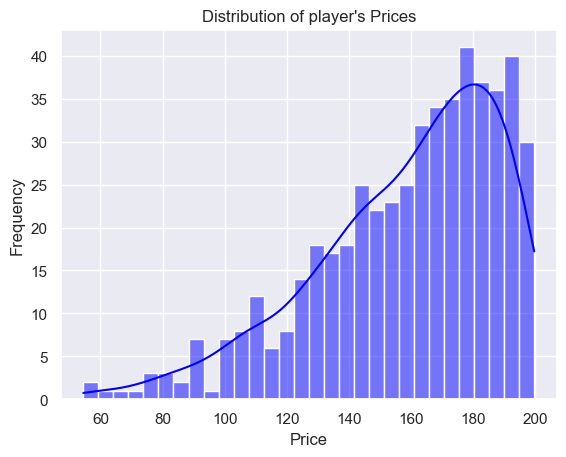

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example dataset 
data = { 'Price Rs (Lakhs)': np.random.normal(loc=200, scale=50, size=1000) }
new = pd.DataFrame(data) 
# Removing outliers 
new = new[(new['Price Rs (Lakhs)'] > 50) & (new['Price Rs (Lakhs)'] < 200)] 
# Plotting 
sns.histplot(new['Price Rs (Lakhs)'], kde=True, bins=30, color='blue') 
plt.xlabel('Price') 
plt.ylabel('Frequency') 
plt.title("Distribution of player's Prices") 
# Corrected title 
plt.show()

In [ ]:
cua_mapping = {
    'Capped': 1,
    'Uncapped': 0,
}
# Apply the mapping to the 'C/U/A' column
new['C/U/A'] = new['C/U/A'].map(cua_mapping)

# Check the unique values assigned to each player availability
print(new['C/U/A'].unique())

In [180]:
unique_performance_tier = new['performance_tier'].unique()
print(unique_performance_tier)

['Emerging' 'Star' 'Promising']


In [181]:
pt_mapping = {
    'Emerging': 1,
    'Star': 3,
    'Promising': 2
}
# Apply the mapping to the 'performance_tier' column
new['performance_tier'] = new['performance_tier'].map(pt_mapping)

# Check the unique values assigned to each player performance
print(new['performance_tier'].unique())

[1 3 2]


In [258]:
sp_mapping = {
    'BATTER':1,
    'BOWLER':2,
    'ALL-ROUNDER':3,
    'WICKETKEEPER':4
}
# Apply the mapping to the specialism column
new['Specialism'] = new['Specialism'].map(sp_mapping)

# Check the unique values assigned to each player performance
print(new['Specialism'].unique())

[nan]


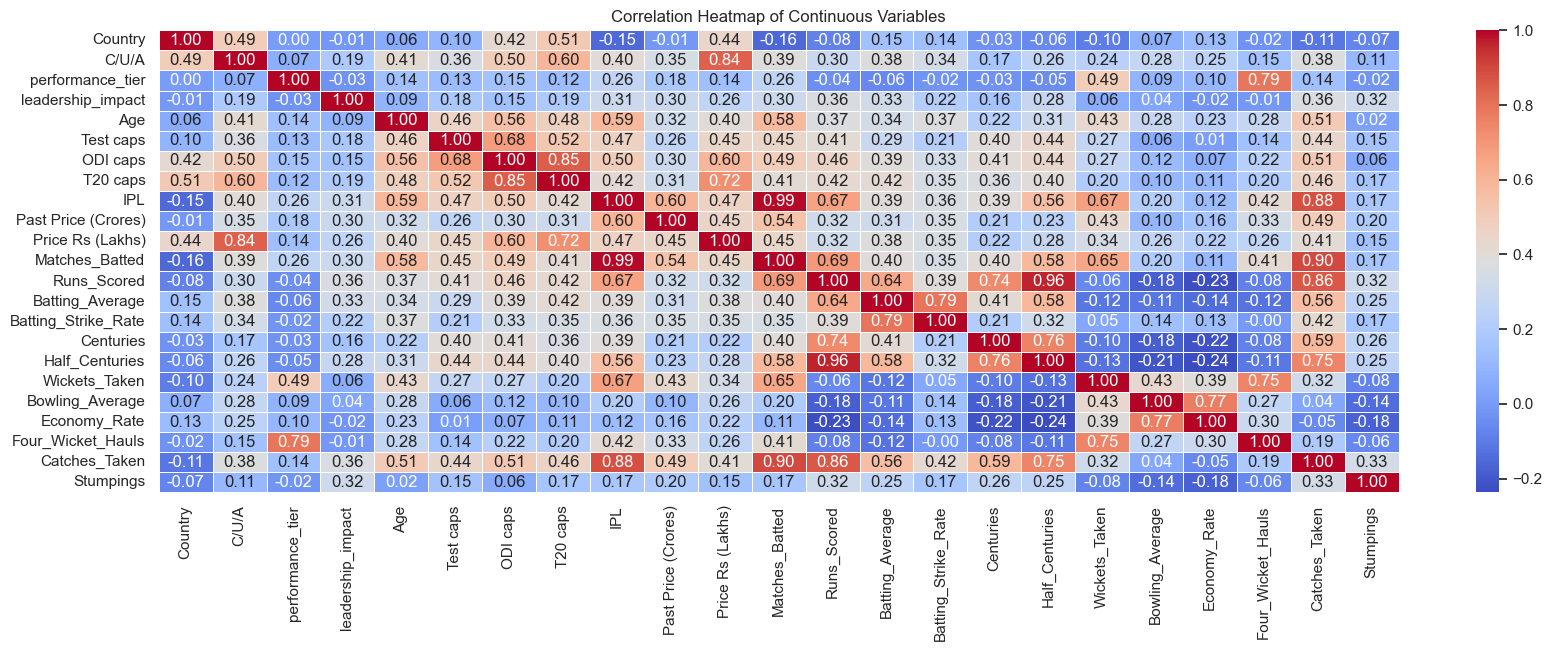

C:\Users\bhara\AppData\Local\Temp\ipykernel_29768\2587516410.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x="Specialism", y="Price Rs (Lakhs)", data=new, palette="Set2")
C:\Users\bhara\AppData\Local\Temp\ipykernel_29768\2587516410.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x="Team 2024", y="Price Rs (Lakhs)", data=new, palette="Set3")
C:\Users\bhara\AppData\Local\Temp\ipykernel_29768\2587516410.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[2], x="C/U/A", y="Price Rs (Lakhs)", data=new,

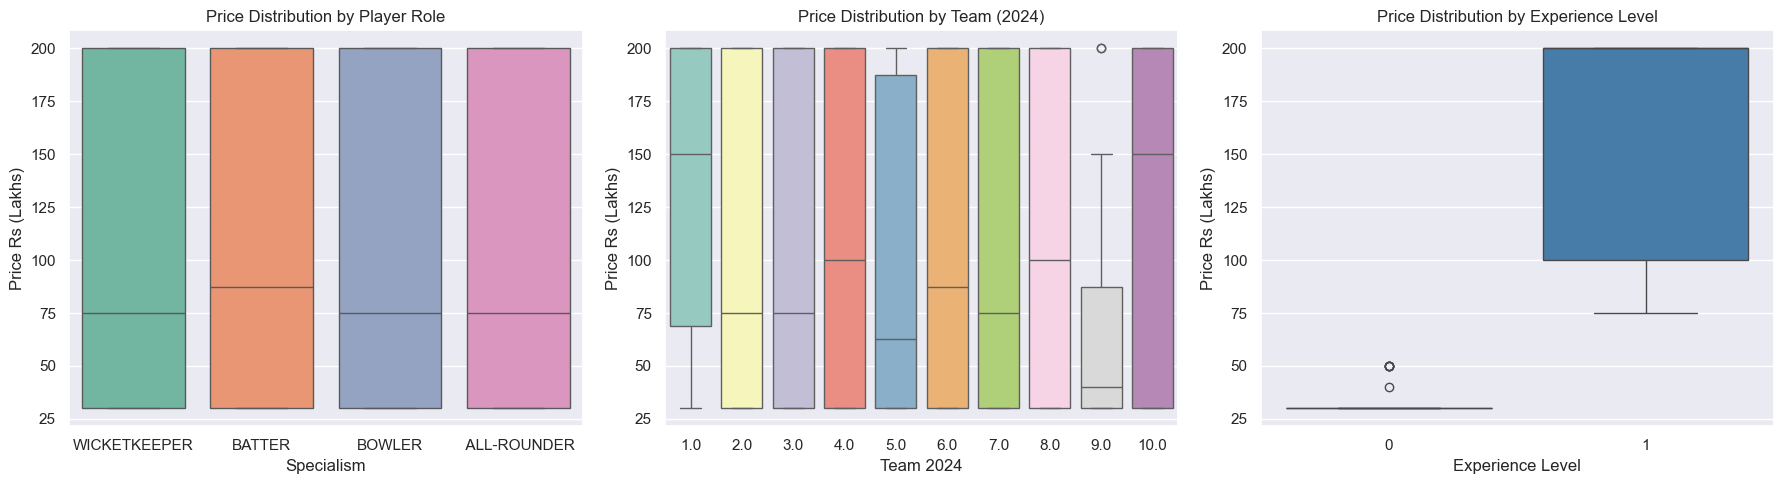

In [255]:
# Calculating correlation for continuous variables
corr = new[['Country', 'C/U/A', 'performance_tier', 'leadership_impact', 'Age', 'Test caps', 'ODI caps', 'T20 caps', 'IPL', 'Past Price (Crores)', 'Price Rs (Lakhs)', 'Matches_Batted', 'Runs_Scored', 'Batting_Average', 'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Wickets_Taken', 'Bowling_Average', 'Economy_Rate', 'Four_Wicket_Hauls', 'Catches_Taken', 'Stumpings']].corr()


# Plotting the correlation heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()

# Creating boxplots for categorical variables vs Price
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot: Player Role vs Price
sns.boxplot(ax=axes[0], x="Specialism", y="Price Rs (Lakhs)", data=new, palette="Set2")
axes[0].set_title("Price Distribution by Player Role")
axes[0].set_ylabel("Price Rs (Lakhs)")
axes[0].set_xlabel("Specialism")

# Boxplot: Team 2024 vs Price
sns.boxplot(ax=axes[1], x="Team 2024", y="Price Rs (Lakhs)", data=new, palette="Set3")
axes[1].set_title("Price Distribution by Team (2024)")
axes[1].set_ylabel("Price Rs (Lakhs)")
axes[1].set_xlabel("Team 2024")

# Boxplot: Experience Level vs Price
sns.boxplot(ax=axes[2], x="C/U/A", y="Price Rs (Lakhs)", data=new, palette="Set1")
axes[2].set_title("Price Distribution by Experience Level")
axes[2].set_ylabel("Price Rs (Lakhs)")
axes[2].set_xlabel("Experience Level")

plt.tight_layout()
plt.show()

In [182]:
from scipy.stats import pearsonr 
# One-Hot Encoding 
Xtrain = pd.get_dummies(new, columns=['Country', 'Team 2024', 'C/U/A', 'performance_tier'])

from sklearn.preprocessing import LabelEncoder
# Assuming your data is in a DataFrame 
X_corr = pd.DataFrame(new, columns=['Country', 'Team 2024', 'C/U/A', 'performance_tier', 'leadership_impact', 'Matches_Batted', 'Runs_Scored', 'Batting_Average', 'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Catches_Taken', 'Stumpings', 'Wickets_Taken', 'Bowling_Average', 'Economy_Rate', 'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls', 'Captaincy %', 'Age', 'Test caps', 'ODI caps', 'T20 caps', 'IPL', 'Past Price (Crores)', 'value_per_run']) 
new['Price Rs (Lakhs)'] = ytrain
# Fill missing or infinite values with the mean of the column 
X_corr.replace([np.inf, -np.inf], np.nan, inplace=True) 
X_corr.fillna(X_corr.mean(), inplace=True)
# Calculate Pearson correlation coefficient and p-value for each numerical variable
results = {}
for column in X_corr.columns[:-1]:  # Exclude the target variable
    corr, p_value = pearsonr(X_corr[column], new['Price Rs (Lakhs)'])
    results[column] = {'Correlation': corr, 'P-Value': p_value}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                     Correlation       P-Value
Country                 0.441587  8.523813e-10
Team 2024              -0.088066  2.451269e-01
C/U/A                   0.844429  4.799409e-49
performance_tier        0.135454  7.305762e-02
leadership_impact       0.216361  3.924779e-03
Matches_Batted          0.448966  4.112540e-10
Runs_Scored             0.320091  1.486191e-05
Batting_Average         0.382846  1.571197e-07
Batting_Strike_Rate     0.351423  1.732538e-06
Centuries               0.216493  3.902385e-03
Half_Centuries          0.283691  1.359328e-04
Catches_Taken           0.406395  2.187823e-08
Stumpings               0.145972  5.322299e-02
Wickets_Taken           0.340371  3.798417e-06
Bowling_Average         0.261513  4.551578e-04
Economy_Rate            0.221702  3.105060e-03
Bowling_Strike_Rate     0.271100  2.733658e-04
Four_Wicket_Hauls       0.256695  5.838920e-04
Five_Wicket_Hauls       0.136540  7.076634e-02
Captaincy %             0.279091  1.761392e-04
Age          

In [183]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

# Alternatively, fill NaN values with a placeholder value
new['leadership_impact'].fillna(0, inplace=True)
new['performance_tier'].fillna(0, inplace=True)

# Standardize the numerical features
numerical_features = ['Country', 'C/U/A', 'leadership_impact', 'Age', 'Test caps', 'ODI caps', 'T20 caps', 'IPL', 'Past Price (Crores)', 'Price Rs (Lakhs)', 'Matches_Batted', 'Runs_Scored', 'Batting_Average', 'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Wickets_Taken', 'Bowling_Average', 'Economy_Rate', 'Four_Wicket_Hauls', 'Catches_Taken', 'Stumpings']

# Apply outlier detection only on the numerical features
Xtrain_numerical = new[numerical_features]
Xtest_numerical = new[numerical_features]

Xtrain_numerical.info()
Xtest_numerical.info()

# Initialize Isolation Forest
clf = IsolationForest(n_estimators=100, random_state=0, contamination=0.20)

# Fit on training data
clf.fit(Xtrain_numerical)

# Predict outliers in the training data
yhat_train = clf.predict(Xtrain_numerical)

# Filter training data based on the prediction
Xtrain_filtered = new[yhat_train == 1].reset_index(drop=True)
ytrain_filtered = new[yhat_train == 1].reset_index(drop=True)

# Impute missing values for all numerical features
imputer = SimpleImputer(strategy='mean')
# Fit the imputer on the TRAINING data
imputer.fit(Xtrain_numerical)

# Transform BOTH training and test data using the fitted imputer
Xtrain_imputed = pd.DataFrame(imputer.transform(Xtrain_numerical), columns=Xtrain_numerical.columns)
Xtest_imputed = pd.DataFrame(imputer.transform(Xtest_numerical), columns=Xtest_numerical.columns)

# Predict outliers in the test data
yhat_test = clf.predict(Xtest_imputed)

# Filter test data based on the prediction
Xtest_filtered = new[yhat_test == 1].reset_index(drop=True)
ytest_filtered = new[yhat_test == 1].reset_index(drop=True)

# Check the shape of the filtered datasets
print("Filtered Xtrain shape:", Xtrain_filtered.shape)
print("Filtered Xtest shape:", Xtest_filtered.shape)

C:\Users\bhara\AppData\Local\Temp\ipykernel_29768\2195091522.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new['leadership_impact'].fillna(0, inplace=True)
C:\Users\bhara\AppData\Local\Temp\ipykernel_29768\2195091522.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, 0 to 177
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              176 non-null    int64  
 1   C/U/A                176 non-null    int64  
 2   leadership_impact    176 non-null    float64
 3   Age                  176 non-null    float64
 4   Test caps            176 non-null    float64
 5   ODI caps             176 non-null    float64
 6   T20 caps             176 non-null    float64
 7   IPL                  176 non-null    float64
 8   Past Price (Crores)  176 non-null    float64
 9   Price Rs (Lakhs)     176 non-null    float64
 10  Matches_Batted       176 non-null    int64  
 11  Runs_Scored          176 non-null    int64  
 12  Batting_Average      176 non-null    float64
 13  Batting_Strike_Rate  176 non-null    float64
 14  Centuries            176 non-null    int64  
 15  Half_Centuries       176 non-null    int64  


In [184]:
Xtrain_filtered.info()
Xtest_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player ID_x          141 non-null    float64
 1   Name                 141 non-null    object 
 2   Country              141 non-null    int64  
 3   Specialism           141 non-null    object 
 4   Age                  141 non-null    float64
 5   Batting Style        141 non-null    object 
 6   Bowling Style        141 non-null    object 
 7   Test caps            141 non-null    float64
 8   ODI caps             141 non-null    float64
 9   T20 caps             141 non-null    float64
 10  IPL                  141 non-null    float64
 11  Previous IPLTeam(s)  141 non-null    object 
 12  Past Price (Crores)  141 non-null    float64
 13  Price Rs (Lakhs)     141 non-null    float64
 14  Team 2024            136 non-null    float64
 15  C/U/A                141 non-null    int

In [185]:
ytrain_filtered.info()
ytest_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player ID_x          141 non-null    float64
 1   Name                 141 non-null    object 
 2   Country              141 non-null    int64  
 3   Specialism           141 non-null    object 
 4   Age                  141 non-null    float64
 5   Batting Style        141 non-null    object 
 6   Bowling Style        141 non-null    object 
 7   Test caps            141 non-null    float64
 8   ODI caps             141 non-null    float64
 9   T20 caps             141 non-null    float64
 10  IPL                  141 non-null    float64
 11  Previous IPLTeam(s)  141 non-null    object 
 12  Past Price (Crores)  141 non-null    float64
 13  Price Rs (Lakhs)     141 non-null    float64
 14  Team 2024            136 non-null    float64
 15  C/U/A                141 non-null    int

In [186]:
Xtrain_filtered.head()

Player ID_x              Name  Country    Specialism   Age Batting Style  \
0          5.0    Arshdeep Singh        0        BOWLER  26.0           LHB   
1          6.0    Mitchell Starc        1        BOWLER  35.0           LHB   
2          8.0  Liam Livingstone        2   ALL-ROUNDER  31.0           RHB   
3         11.0    Mohammad Shami        0        BOWLER  34.0           RHB   
4         12.0    Mohammed Siraj        0        BOWLER  31.0           RHB   

          Bowling Style  Test caps  ODI caps  T20 caps  ...  Economy_Rate  \
0  LEFT ARM Fast Medium        0.0       8.0      56.0  ...      9.101667   
1         LEFT ARM Fast       89.0     125.0      65.0  ...      9.166667   
2    RIGHT ARM Leg Spin        1.0      31.0      50.0  ...      7.042000   
3        RIGHT ARM Fast       64.0     101.0      23.0  ...      8.902500   
4        RIGHT ARM Fast       30.0      44.0      16.0  ...      8.596250   

  Bowling_Strike_Rate  Four_Wicket_Hauls  Five_Wicket_Hauls  Captaincy %  \
0           20.043333                  1                  1          0.0   
1           11.966667                  1                  0          0.0   
2            8.800000                  0                  0          0.0   
3           28.818750                  0                  0          0.0   
4           22.157500                  2                  0          0.0   

   Catches_Taken  Stumpings  value_per_run  leadership_impact  \
0             11          0       0.560000                0.0   
1             16          0       0.137255                0.0   
2             17          0       0.007928                0.0   
3             11          0       0.000000                0.0   
4             26          0       0.144330                0.0   

   performance_tier  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

[5 rows x 36 columns]

In [187]:
Xtest_filtered.head()

Player ID_x              Name  Country    Specialism   Age Batting Style  \
0          5.0    Arshdeep Singh        0        BOWLER  26.0           LHB   
1          6.0    Mitchell Starc        1        BOWLER  35.0           LHB   
2          8.0  Liam Livingstone        2   ALL-ROUNDER  31.0           RHB   
3         11.0    Mohammad Shami        0        BOWLER  34.0           RHB   
4         12.0    Mohammed Siraj        0        BOWLER  31.0           RHB   

          Bowling Style  Test caps  ODI caps  T20 caps  ...  Economy_Rate  \
0  LEFT ARM Fast Medium        0.0       8.0      56.0  ...      9.101667   
1         LEFT ARM Fast       89.0     125.0      65.0  ...      9.166667   
2    RIGHT ARM Leg Spin        1.0      31.0      50.0  ...      7.042000   
3        RIGHT ARM Fast       64.0     101.0      23.0  ...      8.902500   
4        RIGHT ARM Fast       30.0      44.0      16.0  ...      8.596250   

  Bowling_Strike_Rate  Four_Wicket_Hauls  Five_Wicket_Hauls  Captaincy %  \
0           20.043333                  1                  1          0.0   
1           11.966667                  1                  0          0.0   
2            8.800000                  0                  0          0.0   
3           28.818750                  0                  0          0.0   
4           22.157500                  2                  0          0.0   

   Catches_Taken  Stumpings  value_per_run  leadership_impact  \
0             11          0       0.560000                0.0   
1             16          0       0.137255                0.0   
2             17          0       0.007928                0.0   
3             11          0       0.000000                0.0   
4             26          0       0.144330                0.0   

   performance_tier  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

[5 rows x 36 columns]

In [188]:
ytrain_filtered.head()

Player ID_x              Name  Country    Specialism   Age Batting Style  \
0          5.0    Arshdeep Singh        0        BOWLER  26.0           LHB   
1          6.0    Mitchell Starc        1        BOWLER  35.0           LHB   
2          8.0  Liam Livingstone        2   ALL-ROUNDER  31.0           RHB   
3         11.0    Mohammad Shami        0        BOWLER  34.0           RHB   
4         12.0    Mohammed Siraj        0        BOWLER  31.0           RHB   

          Bowling Style  Test caps  ODI caps  T20 caps  ...  Economy_Rate  \
0  LEFT ARM Fast Medium        0.0       8.0      56.0  ...      9.101667   
1         LEFT ARM Fast       89.0     125.0      65.0  ...      9.166667   
2    RIGHT ARM Leg Spin        1.0      31.0      50.0  ...      7.042000   
3        RIGHT ARM Fast       64.0     101.0      23.0  ...      8.902500   
4        RIGHT ARM Fast       30.0      44.0      16.0  ...      8.596250   

  Bowling_Strike_Rate  Four_Wicket_Hauls  Five_Wicket_Hauls  Captaincy %  \
0           20.043333                  1                  1          0.0   
1           11.966667                  1                  0          0.0   
2            8.800000                  0                  0          0.0   
3           28.818750                  0                  0          0.0   
4           22.157500                  2                  0          0.0   

   Catches_Taken  Stumpings  value_per_run  leadership_impact  \
0             11          0       0.560000                0.0   
1             16          0       0.137255                0.0   
2             17          0       0.007928                0.0   
3             11          0       0.000000                0.0   
4             26          0       0.144330                0.0   

   performance_tier  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

[5 rows x 36 columns]

In [189]:
ytest_filtered.head()

Player ID_x              Name  Country    Specialism   Age Batting Style  \
0          5.0    Arshdeep Singh        0        BOWLER  26.0           LHB   
1          6.0    Mitchell Starc        1        BOWLER  35.0           LHB   
2          8.0  Liam Livingstone        2   ALL-ROUNDER  31.0           RHB   
3         11.0    Mohammad Shami        0        BOWLER  34.0           RHB   
4         12.0    Mohammed Siraj        0        BOWLER  31.0           RHB   

          Bowling Style  Test caps  ODI caps  T20 caps  ...  Economy_Rate  \
0  LEFT ARM Fast Medium        0.0       8.0      56.0  ...      9.101667   
1         LEFT ARM Fast       89.0     125.0      65.0  ...      9.166667   
2    RIGHT ARM Leg Spin        1.0      31.0      50.0  ...      7.042000   
3        RIGHT ARM Fast       64.0     101.0      23.0  ...      8.902500   
4        RIGHT ARM Fast       30.0      44.0      16.0  ...      8.596250   

  Bowling_Strike_Rate  Four_Wicket_Hauls  Five_Wicket_Hauls  Captaincy %  \
0           20.043333                  1                  1          0.0   
1           11.966667                  1                  0          0.0   
2            8.800000                  0                  0          0.0   
3           28.818750                  0                  0          0.0   
4           22.157500                  2                  0          0.0   

   Catches_Taken  Stumpings  value_per_run  leadership_impact  \
0             11          0       0.560000                0.0   
1             16          0       0.137255                0.0   
2             17          0       0.007928                0.0   
3             11          0       0.000000                0.0   
4             26          0       0.144330                0.0   

   performance_tier  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

[5 rows x 36 columns]

In [190]:
Xtrain_filtered['Country']

0      0
1      1
2      2
3      0
4      0
      ..
136    0
137    5
138    0
139    0
140    0
Name: Country, Length: 141, dtype: int64

In [191]:
Xtrain_filtered['Team 2024']

0      4.0
1      2.0
2      4.0
3      5.0
4      7.0
      ... 
136    1.0
137    9.0
138    2.0
139    NaN
140    NaN
Name: Team 2024, Length: 141, dtype: float64

In [192]:
Xtrain_filtered['C/U/A']

0      1
1      1
2      1
3      1
4      1
      ..
136    1
137    1
138    1
139    0
140    0
Name: C/U/A, Length: 141, dtype: int64

In [193]:
Xtrain_filtered['performance_tier']

0      1
1      1
2      1
3      1
4      1
      ..
136    1
137    1
138    1
139    1
140    1
Name: performance_tier, Length: 141, dtype: int64

# Table of Contents
1. Introduction: business context and objective; modelling task
2. Baseline method;
3. Feature selection (optional);
4. Hyperparameter tuning;
5. Model evaluation;
6. Conclusion: key findings, possible future improvements.

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

sns.set(style="darkgrid")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# INTRODUCTION:
# 1. Business Objective
The primary objective is to develop a predictive model that accurately forecasts the future auction prices of IPL players. This model will assist IPL team managements in making informed decisions during player auctions, optimizing their team composition, and managing their budgets effectively.

# Importance
Strategic Team Building: By predicting player prices, team managements can strategically plan their bids, ensuring they acquire key players without exceeding their budget.

Budget Management: Accurate price predictions help teams allocate their financial resources more efficiently, avoiding overspending on players and ensuring a balanced team composition.

Competitive Advantage: Teams with access to reliable price predictions can gain a competitive edge by identifying undervalued players and making smarter investment decisions.

Market Analysis: The data generated from price predictions can support various research initiatives aimed at understanding market dynamics, player performance, and the impact of different factors on player valuations.

# Stakeholders
IPL Team Managements: Utilize the predictive model to make data-driven decisions during player auctions.

Sponsors and Investors: Gain insights into player valuations and make informed investment decisions.

Researchers and Analysts: Access the data to study market trends, player performance, and the effectiveness of different auction strategies.

Fans and Media: Understand the factors influencing player prices and engage more deeply with the auction process.


# Expected Results
Optimized Team Composition: Teams can build stronger, more balanced squads by making informed decisions based on accurate price predictions.

Cost Savings: Efficient budget management and strategic bidding can lead to significant cost savings for teams.

Enhanced Market Understanding: The model provides valuable insights into the factors driving player prices, helping stakeholders understand market dynamics better.

Improved Decision-Making: Data-driven decisions lead to better outcomes for teams, sponsors, and investors, enhancing the overall competitiveness of the IPL.

# Business-Specific Problem:
Predicting and forecasting IPL Player Prices to Optimize Team Composition and Budget Management for Various Stakeholders

The aim is to develop a predictive model that can accurately forecast the auction prices of IPL players by considering various factors such as player performance metrics, historical auction prices, player characteristics, and team dynamics. This model is intended to assist IPL team managements in optimizing their bidding strategies, managing their budgets effectively, and building competitive teams. Additionally, this prediction can be beneficial for sponsors, investors, and analysts in understanding market trends and making informed decisions.

# Modeling Task:
The modeling task is to develop a predictive model that can accurately forecast the auction prices of IPL players. This is a regression task where the target variable is the player's auction price. The dataset contains various features related to player performance metrics, historical auction prices, player characteristics, and team dynamics, which will be used to train and evaluate the predictive model.

# Features to Consider:
Player Performance Metrics:

Batting Average

Bowling Average

Strike Rates (Batting and Bowling)

Runs Scored

Wickets Taken

Centuries and Half-Centuries

Four and Five Wicket Hauls

Historical Auction Prices:

Past IPL Auction Prices

Base Price Set for Auction

Player Characteristics:

Age

Country (Nationality impacts market demand and team composition)

Specialism (e.g., Batter, Bowler, All-Rounder, Wicketkeeper)

Batting Style

Bowling Style

Team Dynamics:

Team 2024 (to see if retained or likely to attract bids from others)

Player Availability (Capped/Uncapped/Associate)

# Baseline Method
The baseline model in your coursework is defined using a Dummy Classifier with the “most_frequent” strategy. This model predicts the most frequent class in the training data. Here are the key points:

Model Initialization: DummyClassifier(strategy="most_frequent")

Training: The model is trained on the training dataset.

Evaluation: MAE and RMSE are calculated to assess the model’s performance.

This baseline provides a reference point to compare the performance of more complex models.

# I. Relevance of Different Predictive Modelling Techniques to Specific Business Objectives
## Predictive Modelling Techniques:

### Linear Regression:

__Objective__: Identify key factors affecting IPL player prices and predict the auction prices.

__Relevance__: Provides insights into which features most influence player prices. This information is useful for team managements and stakeholders to understand the relationship between player attributes and their auction prices.

### Decision Trees and Random Forests:

__Objective__: Develop more accurate predictive models to improve the predictability of IPL player prices.

__Relevance__: Handle both numerical and categorical data well, provide feature importance, and can model complex interactions. Random Forests help reduce overfitting and improve prediction accuracy, making them suitable for predicting player prices based on various attributes.

### Support Vector Machines (SVM):

__Objective__: High-accuracy classification of player price ranges.

__Relevance__: Effective for cases with high-dimensional data and can handle non-linear relationships. It is useful when the error range is critical, ensuring precise classification of player price ranges.

### Neural Networks:

__Objective__: Capture complex patterns and interactions in data to predict IPL player prices.

__Relevance__: Suitable for large datasets with many features. Can model non-linear relationships and interactions between features, making them ideal for predicting player prices based on a wide range of player attributes and historical data. However, they may require significant computational resources.

### K-Nearest Neighbors (KNN):

__Objective__: Simple and interpretable model for predicting IPL player price ranges.

__Relevance__: Easy to implement and understand. Suitable for small to medium-sized datasets. Less effective with large datasets due to computational complexity, but can still provide valuable insights for predicting player prices based on similar players' attributes.

### Artificial Neural Networks (ANN):

__Objective__: Artificial Neural Networks (ANNs) are designed to recognize patterns and relationships in data through a process that mimics the way the human brain operates. In the context of predicting IPL player prices, ANNs can be used to model complex relationships between various player attributes and their auction prices.

__Relevance__: ANNs are highly relevant for predicting IPL player prices because they can handle large and complex datasets, capturing non-linear relationships and interactions between features. This makes them suitable for tasks that require deep learning and high accuracy, such as forecasting player prices based on performance metrics, historical auction prices, and player characteristics.

### Forecasting
__Objective__: Forecasting involves predicting future values based on historical data. The objective is to provide accurate and reliable predictions that can inform decision-making processes.

__Relevance__: In the context of IPL player prices, forecasting is crucial for team managements to plan their bidding strategies and budget allocations. Accurate price forecasts help teams anticipate market trends, identify undervalued players, and make informed decisions during player auctions. This can lead to optimized team composition and cost savings.

### Clustering
__Objective__: Clustering aims to group similar data points together based on their characteristics. The objective is to identify natural groupings within the data without prior knowledge of the categories.

__Relevance__: Clustering is relevant for analyzing IPL player prices as it can help identify distinct segments of players based on their performance metrics, playing styles, and other attributes. This can assist team managements in understanding player market segments, tailoring their bidding strategies, and identifying potential targets for their teams. For example, clustering can reveal groups of players who are consistently undervalued or those who perform well in specific conditions, providing valuable insights for strategic decision-making.

### K-Means Clustering
__Objective__: Partition players into distinct clusters based on their attributes. 

__Relevance__: Helps identify player segments for strategic bidding and market analysis.

### Hierarchical Clustering
__Objective__: Build a hierarchy of clusters to understand player relationships. 

__Relevance__: Provides detailed insights into player groupings and aids in targeted analysis.

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [196]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
# Step 2: Feature Selection
# Select features and target variable
features = [
    'Country', 'C/U/A', 'Runs_Scored', 'Batting_Average', 'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Catches_Taken', 'Wickets_Taken', 'Bowling_Average', 'Economy_Rate', 'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Age', 'Test caps', 'ODI caps', 'T20 caps', 'IPL', 'Past Price (Crores)'
]
target = 'Price Rs (Lakhs)'

X = Xtrain_filtered[features]
y = ytrain_filtered[target]

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle infinite and large values 
X_train.replace([np.inf, -np.inf], np.nan, inplace=True) 
X_test.replace([np.inf, -np.inf], np.nan, inplace=True) 
# Replace NaN values with 0 
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Initialize the Linear Regression model
model = LinearRegression() 
# Train the model 
model.fit(X_train, y_train)
# Predict on the test set 
y_pred_lr = model.predict(X_test) 
# Evaluate the model 
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr)) 
mae_lr = mean_absolute_error(y_test, y_pred_lr) 
r2_lr = r2_score(y_test, y_pred_lr) 
print("Linear Regression Model:") 
print(f"RMSE: {rmse_lr:.3f}") 
print(f"MAE: {mae_lr:.3f}") 
print(f"R²: {r2_lr:.3f}")

Linear Regression Model:
RMSE: 33.662
MAE: 26.380
R²: 0.807


In [197]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 113 to 102
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              112 non-null    int64  
 1   C/U/A                112 non-null    int64  
 2   Runs_Scored          112 non-null    int64  
 3   Batting_Average      112 non-null    float64
 4   Batting_Strike_Rate  112 non-null    float64
 5   Centuries            112 non-null    int64  
 6   Half_Centuries       112 non-null    int64  
 7   Catches_Taken        112 non-null    int64  
 8   Wickets_Taken        112 non-null    int64  
 9   Bowling_Average      112 non-null    float64
 10  Economy_Rate         112 non-null    float64
 11  Bowling_Strike_Rate  112 non-null    float64
 12  Four_Wicket_Hauls    112 non-null    int64  
 13  Age                  112 non-null    float64
 14  Test caps            112 non-null    float64
 15  ODI caps             112 non-null    float6

In [198]:
from sklearn.tree import DecisionTreeRegressor
# Initialize the Decision Tree Regressor model 
dtree_model = DecisionTreeRegressor(random_state=42) 
# Train the model 
dtree_model.fit(X_train, y_train) 
# Predict on the validation set 
y_pred_tree = dtree_model.predict(X_test) 
#Evaluate the model 
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_tree)) 
mae_dt = mean_absolute_error(y_test, y_pred_tree)
r2_dt = r2_score(y_test, y_pred_tree) 
print("Decision Tree Regressor Model:") 
print(f"RMSE: {rmse_dt:.3f}") 
print(f"MAE: {mae_dt:.3f}") 
print(f"R²: {r2_dt:.3f}")
print

Decision Tree Regressor Model:
RMSE: 38.885
MAE: 22.759
R²: 0.742


In [199]:
# Model Selection
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 5: Cross-Validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = (-cv_scores) ** 0.5  # Convert to RMSE

print(f'Cross-Validated RMSE: {cv_rmse.mean()} ± {cv_rmse.std()}')

# Step 6: Model Training
model.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)

# Calculate performance metrics
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_rf}')
print(f'R^2 Score: {r2_rf}')

Cross-Validated RMSE: 32.22354405321113 ± 3.210097562909922
Mean Squared Error: 1133.121061750659
R^2 Score: 0.806892851265529


In [200]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import mean_squared_error

# Convert y_train and y_test to NumPy arrays
y_train = np.array(y_train) 
y_test = np.array(y_test)

X_train = X_train.values
# Define the ANN model
def create_model(optimizer='adam', init='uniform'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(64, kernel_initializer=init, activation='relu'))
    model.add(Dense(32, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Hyperparameter tuning
batch_sizes = [10, 20, 40]
epochs_list = [50, 100, 200]
optimizers = ['adam', 'rmsprop']
initializers = ['uniform', 'normal']

best_score = float('inf')
best_params = {}

# Perform manual grid search
for batch_size in batch_sizes:
    for epochs in epochs_list:
        for optimizer in optimizers:
            for init in initializers:
                kfold = KFold(n_splits=5, shuffle=True, random_state=42)
                fold_scores = []
                
                for train_idx, val_idx in kfold.split(X_train): 
                    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx] 
                    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
                    
                    model = create_model(optimizer=optimizer, init=init)
                    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)
                    
                    y_val_pred = model.predict(X_val_fold)
                    fold_score = mean_squared_error(y_val_fold, y_val_pred)
                    fold_scores.append(fold_score)
                
                mean_score = np.mean(fold_scores)
                
                if mean_score < best_score:
                    best_score = mean_score
                    best_params = {
                        'batch_size': batch_size,
                        'epochs': epochs,
                        'optimizer': optimizer,
                        'init': init
                    }

print("Best parameters for ANN Regressor:", best_params)
print("Best cross-validation score: {:.2f}".format(best_score))

# Train the final model with the best parameters
final_model = create_model(optimizer=best_params['optimizer'], init=best_params['init'])
final_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

# Predict on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set:", mse)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [201]:
# Define the ANN model
def create_model(optimizer='adam', init='uniform'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(64, kernel_initializer=init, activation='relu'))
    model.add(Dense(32, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model
ann_model = create_model() 
ann_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1) 
# Predict on the test set 
y_pred_ann = ann_model.predict(X_test) 
# Calculate mean squared error and R2 score for ANN 
mse_ann = mean_squared_error(y_test, y_pred_ann) 
r2_ann = r2_score(y_test, y_pred_ann) 
# Print results for ANN
print("ANN Regressor:") 
print(f"Mean Squared Error: {mse_ann:.3f}")
print(f"R2 Score: {r2_ann:.3f}") 
print()

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 12542.8457
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11432.5469
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8771.0967 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8531.0615  
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6402.5952
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5470.7764  
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3354.9377 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3551.5408 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2886.8467 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2741.2168
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1846.6057
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1932.5148
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1714.1971
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1648.8569
Epoch 15/100
12/

C:\Users\bhara\coding\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 478ms/step - loss: 0.2631 - val_loss: 0.2175
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.2364 - val_loss: 0.1967
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.2200 - val_loss: 0.1766
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.2038 - val_loss: 0.1572
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.1914 - val_loss: 0.1385
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.1687 - val_loss: 0.1204
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.1431 - val_loss: 0.1031
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.1302 - val_loss: 0.0874
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.1058 - val_loss: 0.0748
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0888 - val_loss: 0.0680
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0765 - val_loss: 0.0719
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0737 - val

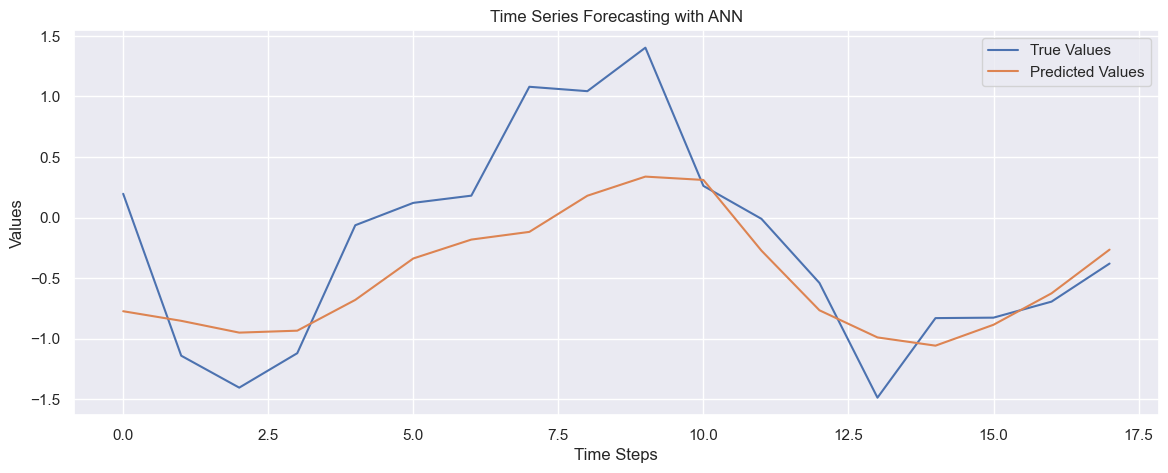

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Generate sample time series data
np.random.seed(42)
time_steps = 100
data = np.sin(np.linspace(0, 50, time_steps)) + np.random.normal(scale=0.5, size=time_steps)

# Prepare the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(data_scaled, seq_length)

# Split the data into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the ANN model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(y_test_rescaled, label='True Values')
plt.plot(y_pred_rescaled, label='Predicted Values')
plt.title('Time Series Forecasting with ANN')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.show()

Decision Tree Regressor:
Mean aboslute Error: 22.759
R2 Score: 0.742

Random Forest Regressor:
Mean Squared Error: 1133.121
R2 Score: 0.807

KNN Regressor:
Mean Squared Error: 0.015
R2 Score: 0.758

ANN Regressor:
Mean Squared Error: 1728.028
R2 Score: 0.706


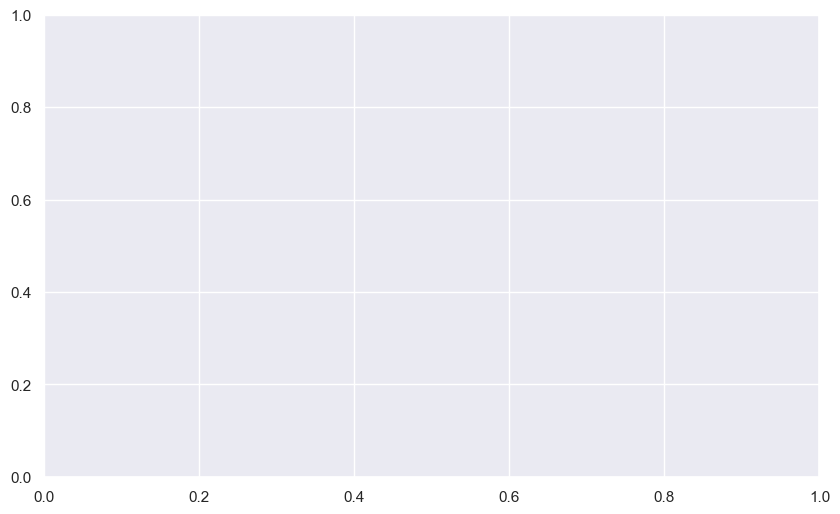

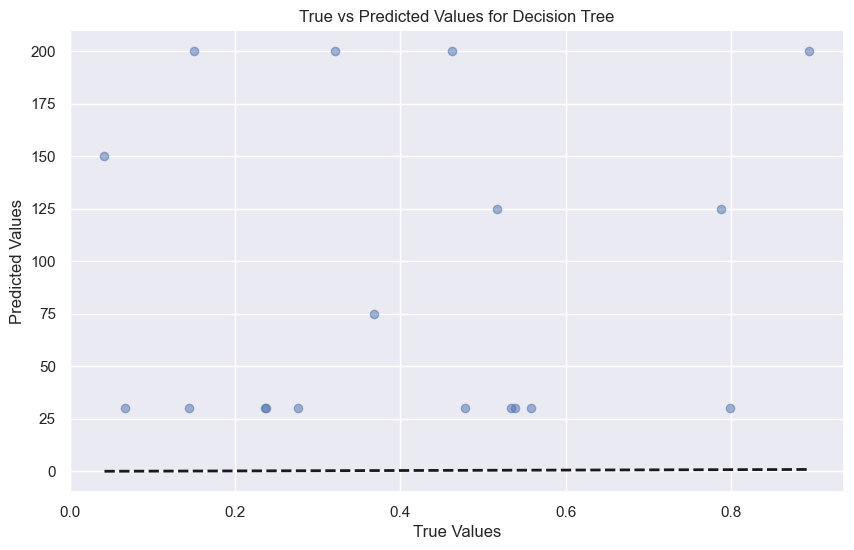

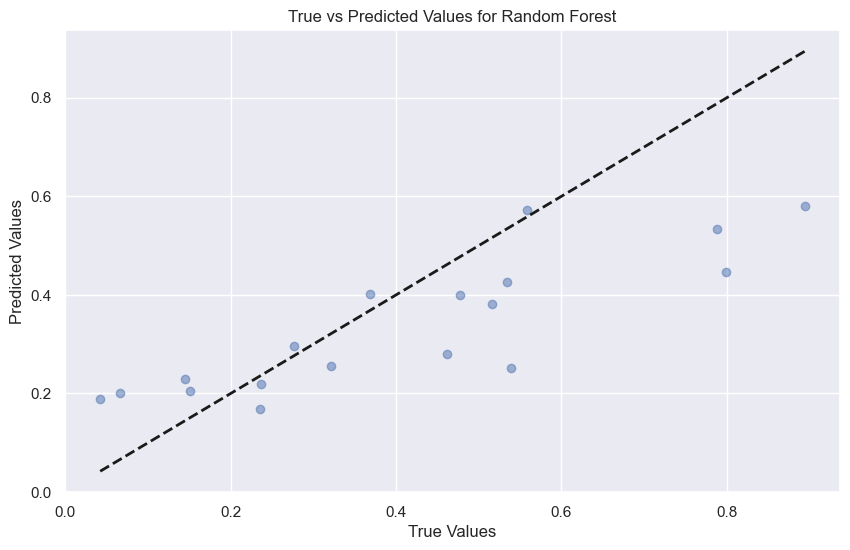

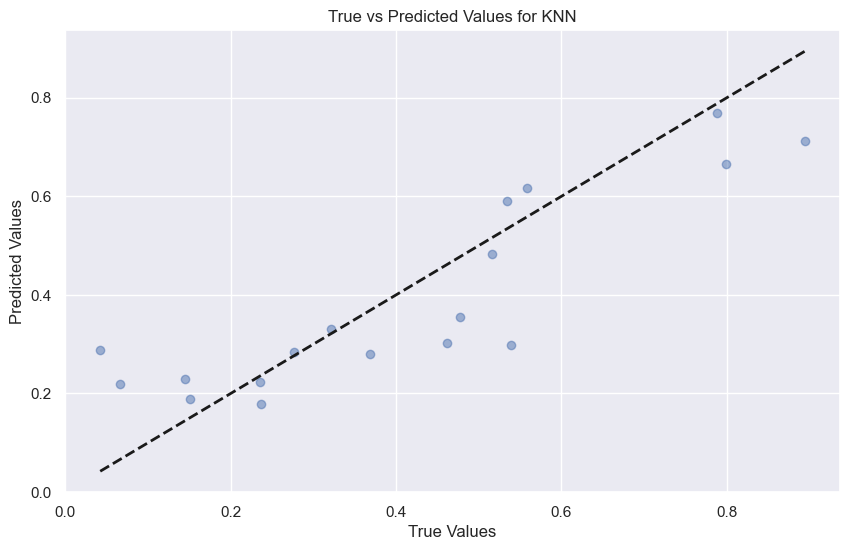

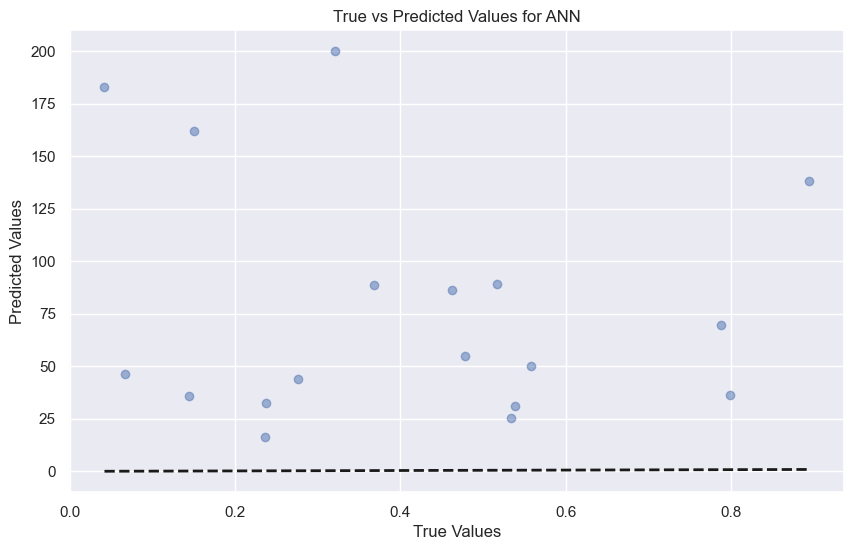

In [214]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Ensure the data is 2D 
X_train = X_train.reshape(X_train.shape[0], -1) 
X_test = X_test.reshape(X_test.shape[0], -1)

# Initialize KNN model 
knn_model = KNeighborsRegressor()
# Fit the model 
knn_model.fit(X_train, y_train)
# Predict on the test set 
y_pred_knn = knn_model.predict(X_test)

# Calculate mean squared error and R2 score for KNN 
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn) 

# Print the results
print("Decision Tree Regressor:")
print(f"Mean aboslute Error: {mae_dt:.3f}")
print(f"R2 Score: {r2_dt:.3f}")
print()
print("Random Forest Regressor:")
print(f"Mean Squared Error: {mse_rf:.3f}")
print(f"R2 Score: {r2_rf:.3f}")
print()
print("KNN Regressor:")
print(f"Mean Squared Error: {mse_knn:.3f}")
print(f"R2 Score: {r2_knn:.3f}")
print()
print("ANN Regressor:")
print(f"Mean Squared Error: {mse_ann:.3f}")
print(f"R2 Score: {r2_ann:.3f}")

# Ensure y_test and y_pred_tree have the same size
if len(y_test) != len(y_pred_tree):
    min_length = min(len(y_test), len(y_pred_tree))
    y_test_tree = y_test[:min_length]
    y_pred_tree = y_pred_tree[:min_length]
else:
    y_test_tree = y_test

# Plot true vs predicted values for Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test_tree, y_pred_tree, alpha=0.5)
plt.plot([y_test_tree.min(), y_test_tree.max()], [y_test_tree.min(), y_test_tree.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values for Decision Tree')
plt.show()

# Ensure y_test and y_pred have the same size
if len(y_test) != len(y_pred):
    min_length = min(len(y_test), len(y_pred))
    y_test_rf = y_test[:min_length]
    y_pred = y_pred[:min_length]
else:
    y_test_rf = y_test

# Plot true vs predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rf, y_pred, alpha=0.5)
plt.plot([y_test_rf.min(), y_test_rf.max()], [y_test_rf.min(), y_test_rf.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values for Random Forest')
plt.show()

# Ensure y_test and y_pred_knn have the same size
if len(y_test) != len(y_pred_knn):
    min_length = min(len(y_test), len(y_pred_knn))
    y_test_knn = y_test[:min_length]
    y_pred_knn = y_pred_knn[:min_length]
else:
    y_test_knn = y_test

# Plot true vs predicted values for KNN
plt.figure(figsize=(10, 6))
plt.scatter(y_test_knn, y_pred_knn, alpha=0.5)
plt.plot([y_test_knn.min(), y_test_knn.max()], [y_test_knn.min(), y_test_knn.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values for KNN')
plt.show()

# Ensure y_test and y_pred_ann have the same size
if len(y_test) != len(y_pred_ann):
    min_length = min(len(y_test), len(y_pred_ann))
    y_test_ann = y_test[:min_length]
    y_pred_ann = y_pred_ann[:min_length]
else:
    y_test_ann = y_test

# Plot true vs predicted values for ANN
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ann, y_pred_ann, alpha=0.5)
plt.plot([y_test_ann.min(), y_test_ann.max()], [y_test_ann.min(), y_test_ann.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values for ANN')
plt.show()

In [222]:
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error, r2_score 

# Check the shape of X_train
print("Original shape of X_train:", X_train.shape)

# Reshape X_train if it has 3 dimensions
if len(X_train.shape) == 3:
    n_samples, n_features, n_channels = X_train.shape
    X_train = X_train.reshape(n_samples, n_features * n_channels)
    print("Reshaped X_train:", X_train.shape)
# Check the shape of X_test
print("Original shape of X_test:", X_test.shape)

# Reshape X_test if it has 3 dimensions
if len(X_test.shape) == 3:
    n_samples, n_features, n_channels = X_test.shape
    X_test = X_test.reshape(n_samples, n_features * n_channels)
    print("Reshaped X_test:", X_test.shape)

# Initialize the SVR model 
svr = SVR() 
# Fit the model 
svr.fit(X_train, y_train) 
# Predict on the test set 
y_pred_svr = svr.predict(X_test) 
# Evaluate the model 
mse_svr = mean_squared_error(y_test, y_pred) 
r2_svr = r2_score(y_test, y_pred) 
# Print the results 
print("Support Vector Regressor:") 
print(f"Mean Squared Error: {mse_svr:.3f}") 
print(f"R2 Score: {r2_svr:.3f}")

Original shape of X_train: (72, 10)
Original shape of X_test: (18, 10)
Support Vector Regressor:
Mean Squared Error: 0.016
R2 Score: 0.740
